# **Import libraries and functions**

In [38]:
# import libraries
import pandas as pd #for data manipulation and analysis
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


# **1. Case One: Customer Segmentation**

**K-Means Clustering**

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

**Context**
"Analyze all relevant customer data and identify hidden groupings of customers." [IBM Sample Data Sets]

**Content**
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

* Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

**Inspiration**
To identify customer segments.

New version from IBM:
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

## **1.1 Loading and inspecting data**

In [39]:
url='https://raw.githubusercontent.com/VanLan0/MIS710/main/Customers.csv'

In [40]:
#loading data
records = pd.read_csv(url)

records.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

## **1.2 Pre-processing data and EDA**

### **Inspecting and cleansing data**
* Inspect data size and types
* Correct the format
* Drop irrelevant columns
* Correct data types as needed
* Detecting and handling missing data


**Inspect data size and types**

In [41]:
##Write code to inspect columns and data types
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Correct the format as needed**

In [42]:
#totalcharges is wrongly documented as string
records['TotalCharges'] = records['TotalCharges'].apply(pd.to_numeric, errors='coerce')

**Drop irrelevant columns**

In [43]:
# Remove customer IDs from the data set
records = records.drop(['customerID'], axis = 1)

**Detect and handle missing data as needed**

In [44]:
#Inspect missing data
print(records.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


<ipython-input-45-a1e9c8fe90be>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=records, x='TotalCharges', showmeans=True, palette='Set2')


<Axes: xlabel='TotalCharges'>

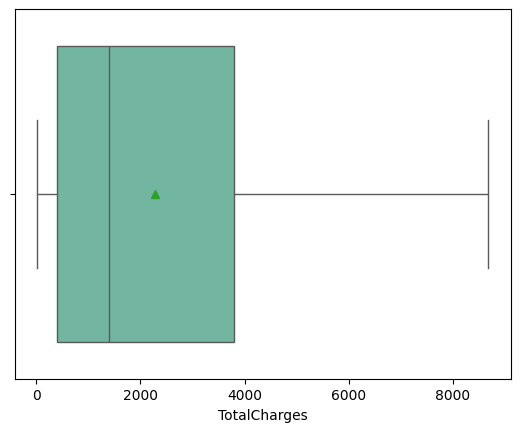

In [45]:
#Check data distribution of variables with missing data
sns.boxplot(data=records, x='TotalCharges', showmeans=True, palette='Set2')

In [46]:
#As the distribution is skewed, replace the missing values with median
records['TotalCharges'].fillna(records['TotalCharges'].median(),inplace=True)



---



### **EDA**


1. Univariate analysis
2. Bivariate analysis
3. Multivariate analysis

Note:
> Numeric variables
*   Summarise data through mean, median (Q2), Q1, Q3, range, Interquartile Range (IQR), outliers, standard deviation, and variance.
*   Explore distributions using histograms, boxplots, kernel density estimates, and QQ plots of continuous variables.

> Categorical variables
*   Summarise data through mode(s), counts and percentages of unique categories.
*   Explore bar charts, pie charts, or frequency tables of categorical variables.

> Explore relationships between two or more variables  
*   Compare two continuous variables using their descriptive statistics (such as means, medians, and Inter Quartile Range (IQR), range) and explore the relationship between them using scatterplots and correlation coefficients.
*   Explore the relationship between two categorical variables using a two-way contingency table (crosstab), clustered bar charts, stacked bar charts or a mosaic plot.
*   Explore the relationship between one numeric and one categorical variable, through using and grouped boxplots, violin plots, and histograms.
*   Explore correlations among multiple (selected) numeric variables using heatmaps of the correlation matrix.

**Explore the relationships between the target variable and other variables, and explore the relationships among the non-target variables as well**

**Univariate analysis**

*Explore the target variable*

<ipython-input-47-229e51c5ca81>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=records, x='Churn', palette='Set2')


<Axes: xlabel='Churn', ylabel='count'>

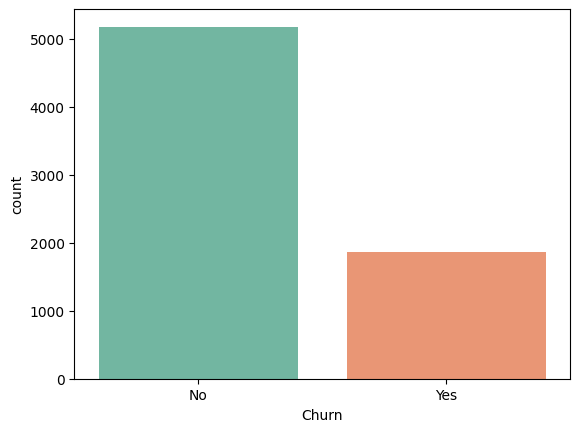

In [47]:
sns.countplot(data=records, x='Churn', palette='Set2')


In [48]:
churn_counts = records.Churn.value_counts()
churn_counts

Churn
No     5174
Yes    1869
Name: count, dtype: int64

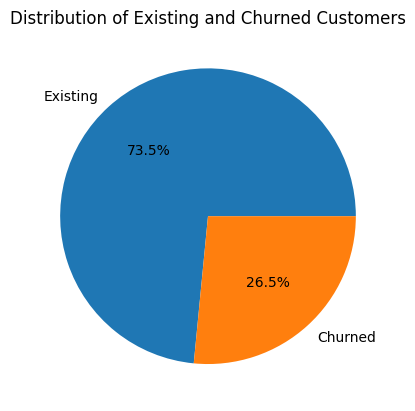

In [49]:
#Let's generate a pie chart with the distribution of churned cases, along with percentage labels.

churn_labels = ['Existing', 'Churned']
plt.pie(churn_counts, labels=churn_labels, autopct='%1.1f%%')
plt.title('Distribution of Existing and Churned Customers')
plt.show()


*Univariate analysis: Explore other categorical variables*

gender :

gender
Male      3555
Female    3488
Name: count, dtype: int64




<ipython-input-50-955d55c8ea77>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=records, x=i, palette='Set2')


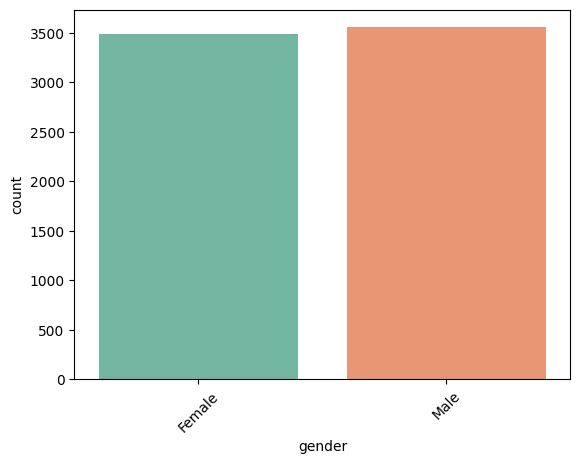

SeniorCitizen :

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64




<ipython-input-50-955d55c8ea77>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=records, x=i, palette='Set2')


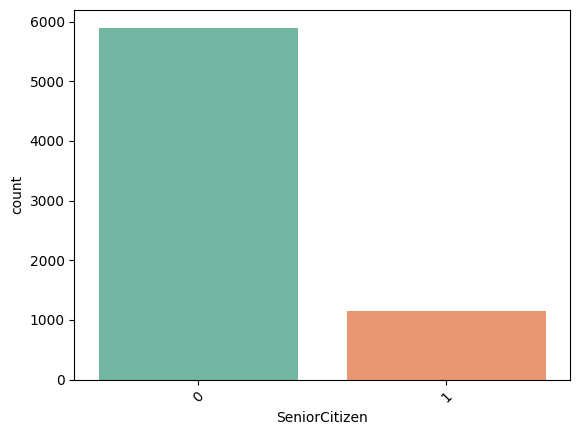

Partner :

Partner
No     3641
Yes    3402
Name: count, dtype: int64




<ipython-input-50-955d55c8ea77>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=records, x=i, palette='Set2')


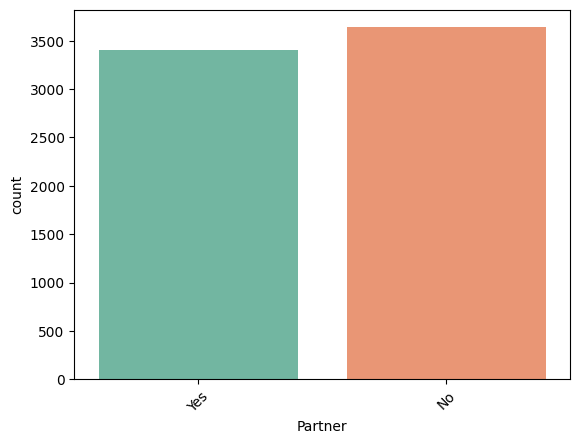

Dependents :

Dependents
No     4933
Yes    2110
Name: count, dtype: int64




<ipython-input-50-955d55c8ea77>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=records, x=i, palette='Set2')


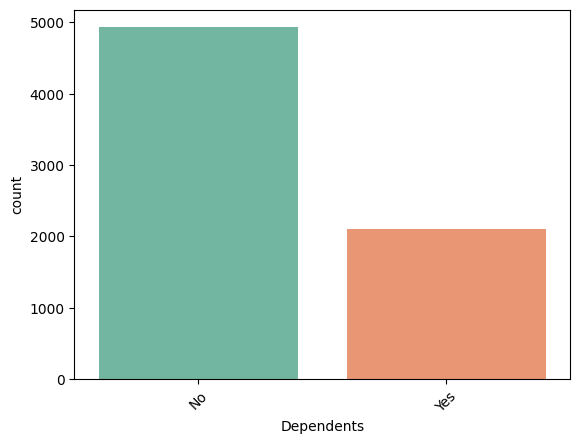

PhoneService :

PhoneService
Yes    6361
No      682
Name: count, dtype: int64




<ipython-input-50-955d55c8ea77>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=records, x=i, palette='Set2')


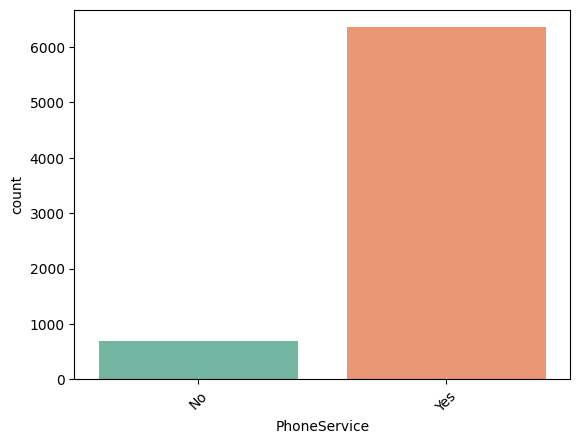

MultipleLines :

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64




<ipython-input-50-955d55c8ea77>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=records, x=i, palette='Set2')


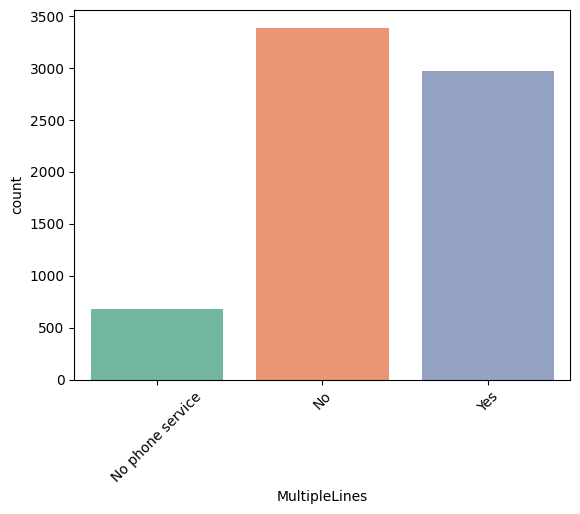

InternetService :

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64




<ipython-input-50-955d55c8ea77>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=records, x=i, palette='Set2')


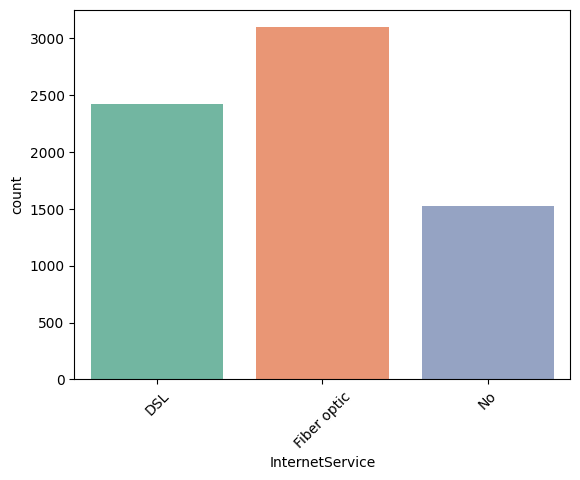

OnlineSecurity :

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64




<ipython-input-50-955d55c8ea77>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=records, x=i, palette='Set2')


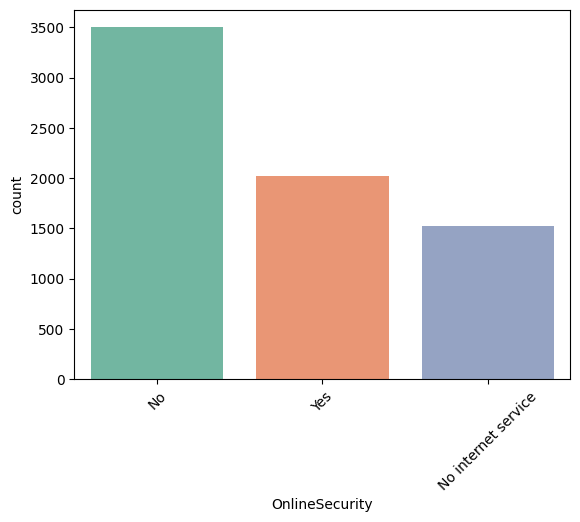

OnlineBackup :

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64




<ipython-input-50-955d55c8ea77>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=records, x=i, palette='Set2')


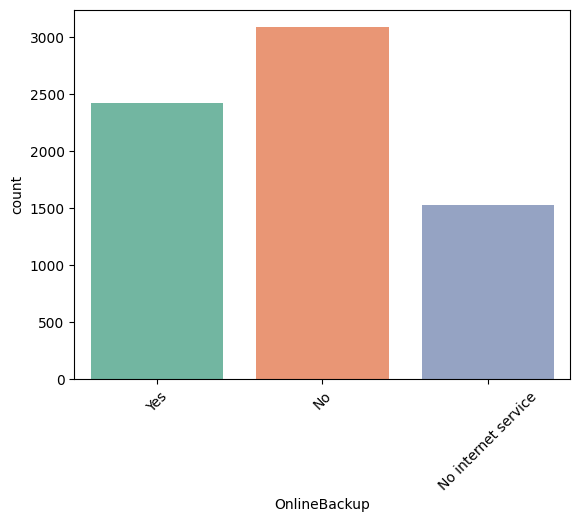

DeviceProtection :

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64




<ipython-input-50-955d55c8ea77>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=records, x=i, palette='Set2')


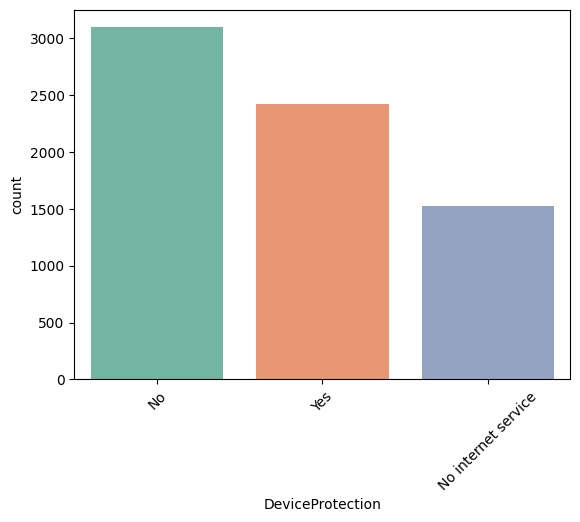

TechSupport :

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64




<ipython-input-50-955d55c8ea77>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=records, x=i, palette='Set2')


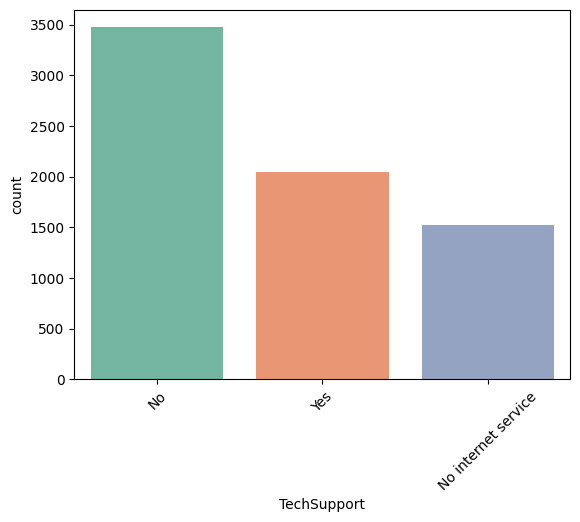

StreamingTV :

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64




<ipython-input-50-955d55c8ea77>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=records, x=i, palette='Set2')


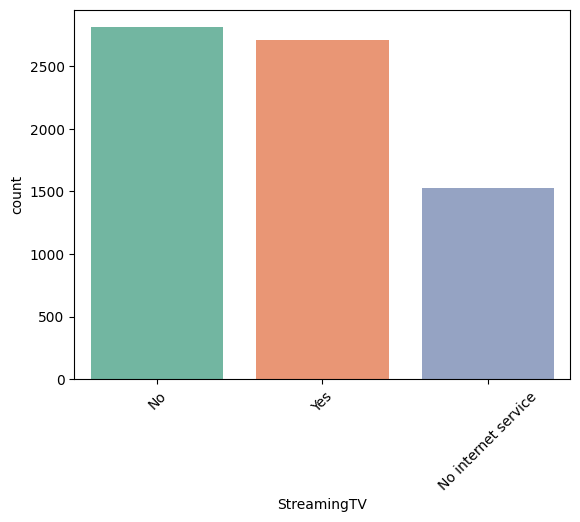

StreamingMovies :

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64




<ipython-input-50-955d55c8ea77>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=records, x=i, palette='Set2')


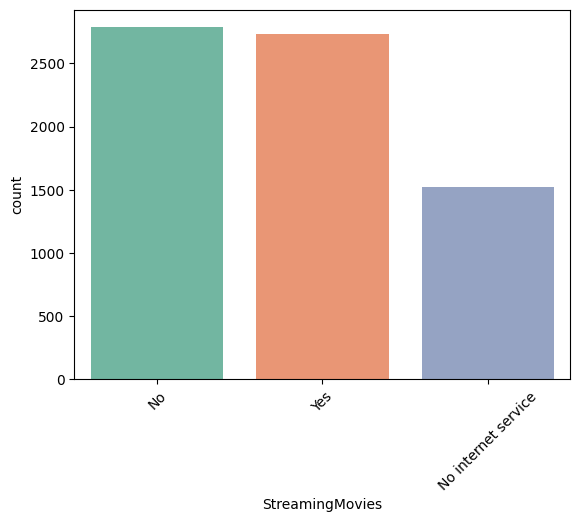

Contract :

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64




<ipython-input-50-955d55c8ea77>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=records, x=i, palette='Set2')


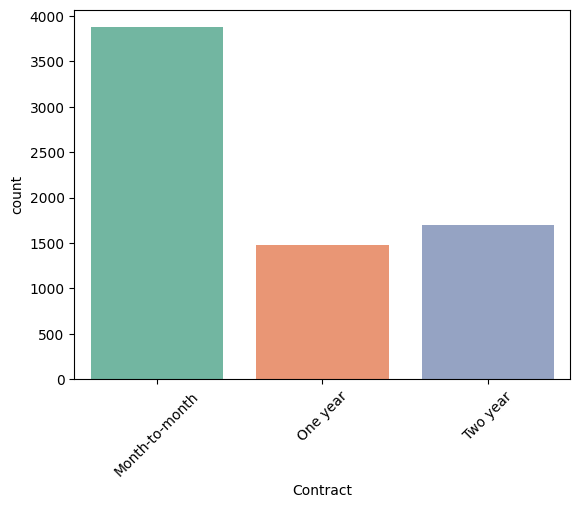

PaperlessBilling :

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64




<ipython-input-50-955d55c8ea77>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=records, x=i, palette='Set2')


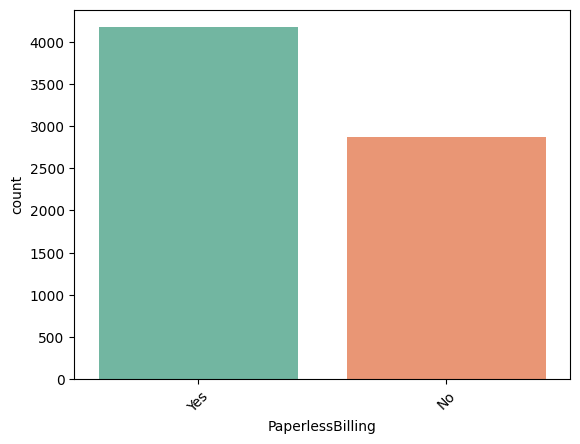

PaymentMethod :

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64




<ipython-input-50-955d55c8ea77>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=records, x=i, palette='Set2')


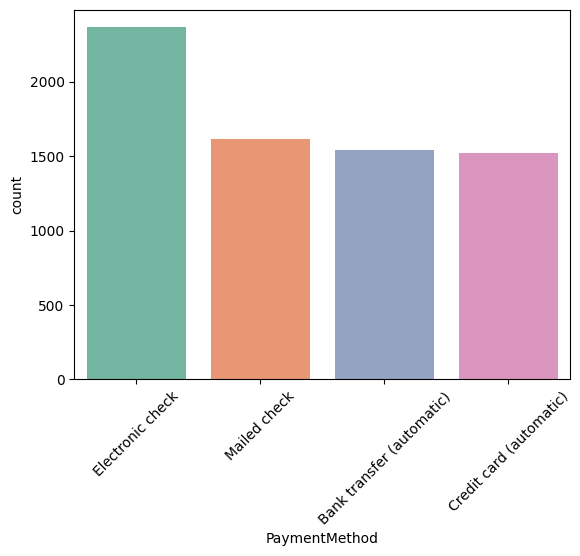

In [50]:
cats=['gender','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
for i in cats:
   print(i, ':\n')
   print(records[i].value_counts())
   print('\n')
   sns.countplot(data=records, x=i, palette='Set2')
   # Rotate labels on the x-axis
   plt.xticks(rotation=45)
   plt.show()

*Univariate analysis: Explore numeric variables*

In [51]:
##Write code to have an overview of descriptive stats of numeric variables; hint: use describe()
records.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2281.916928
std         0.368612    24.559481       30.090047   2265.270398
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

See the above outcome: note the range across variables;
note mean and std, note mean and median, IQR.. for each numeric variable,

tenure :

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64




<ipython-input-52-c82ecb3d1e68>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=records, x=i, bins=50, kde=True, palette='Set2')


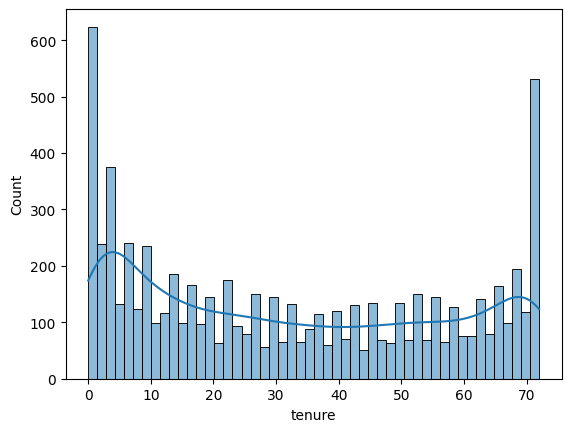

MonthlyCharges :

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64




<ipython-input-52-c82ecb3d1e68>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=records, x=i, bins=50, kde=True, palette='Set2')


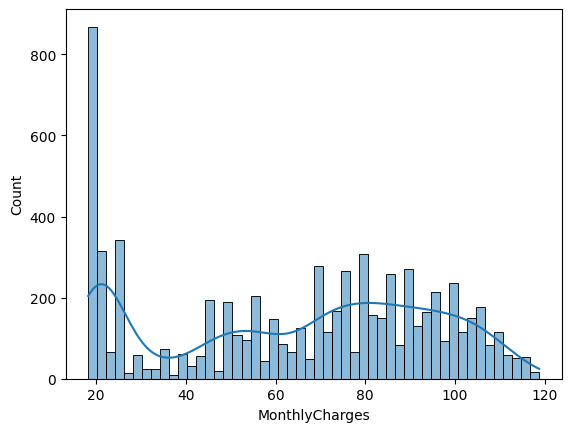

TotalCharges :

count    7043.000000
mean     2281.916928
std      2265.270398
min        18.800000
25%       402.225000
50%      1397.475000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64




<ipython-input-52-c82ecb3d1e68>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=records, x=i, bins=50, kde=True, palette='Set2')


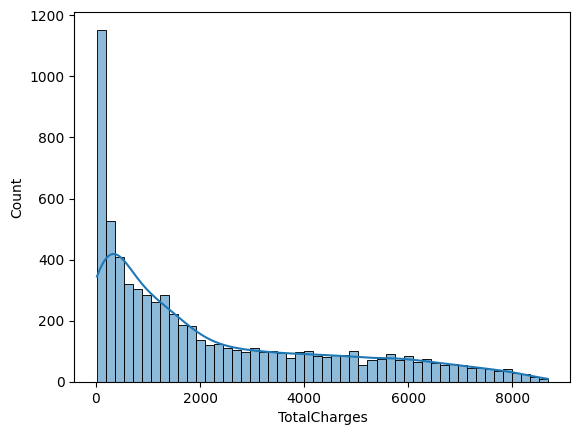

In [52]:
nums=['tenure','MonthlyCharges', 'TotalCharges']
for i in nums:
   print(i, ':\n')
   print(records[i].describe())
   print('\n')
   sns.histplot(data=records, x=i, bins=50, kde=True, palette='Set2')
   plt.show()

<ipython-input-53-a99ae9667f1a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=records, x=i, showmeans=True, palette='Set2')
<ipython-input-53-a99ae9667f1a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=records, x=i, showmeans=True, palette='Set2')
<ipython-input-53-a99ae9667f1a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=records, x=i, showmeans=True, palette='Set2')


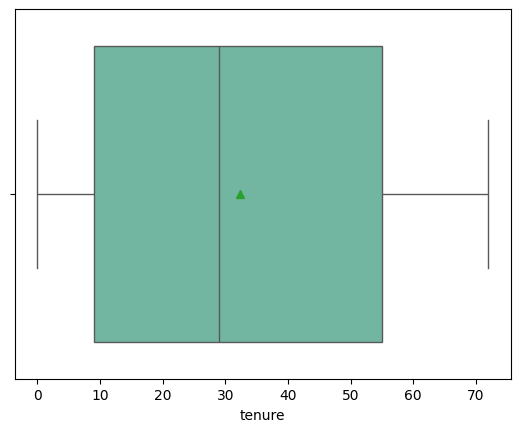

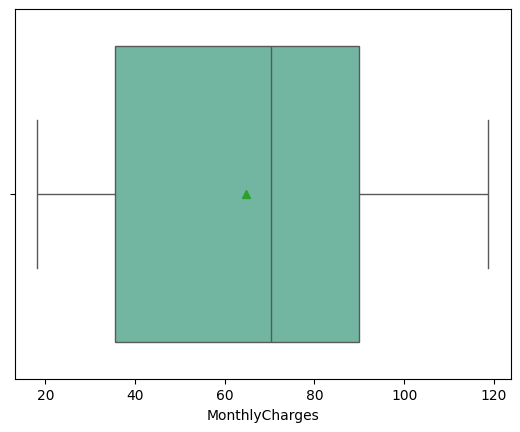

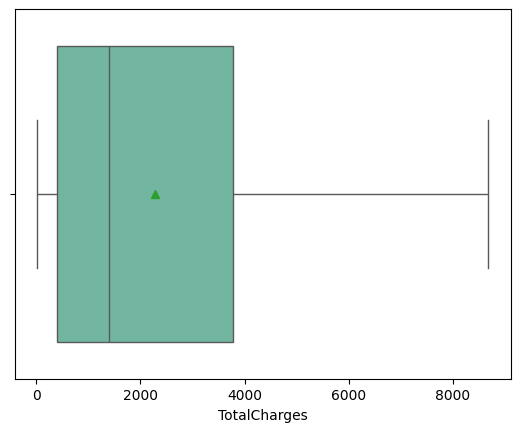

In [53]:
##Write code to create boxplots, hint: data=records, x=i, showmeans=True, palette='Set2'
for i in nums:
  plt.figure()
  sns.boxplot(data=records, x=i, showmeans=True, palette='Set2')

Note the distributions, are they normal distributions? which one is skewed? What would be your interpretations?

**Bivariabe analysis**

*Between numeric variables*

<ipython-input-54-013b500fd8ff>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=records, x='tenure', y='TotalCharges', palette='Set2')


<Axes: xlabel='tenure', ylabel='TotalCharges'>

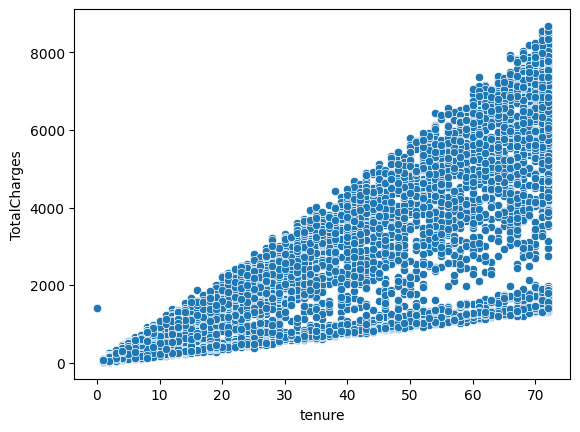

In [54]:
sns.scatterplot(data=records, x='tenure', y='TotalCharges', palette='Set2')

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

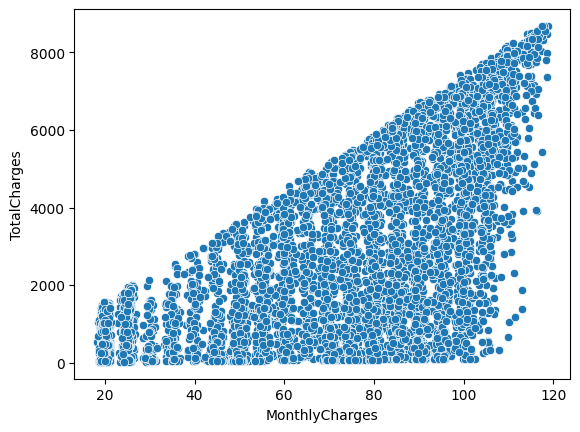

In [55]:
sns.scatterplot(data=records, x='MonthlyCharges', y='TotalCharges')

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

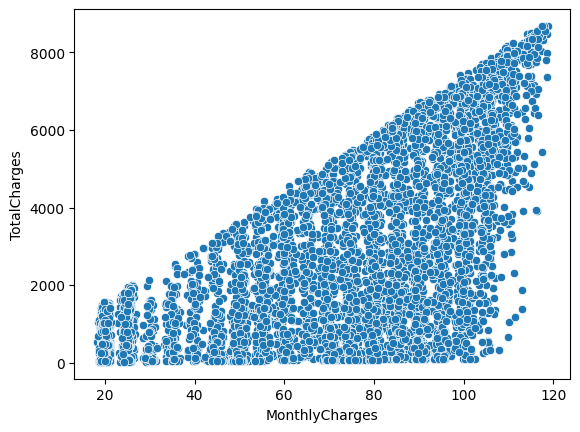

In [56]:
sns.scatterplot(data=records, x='MonthlyCharges', y='TotalCharges')

*Explore relationships between each categorical variable and the target variable*

gender :

gender
Male      3555
Female    3488
Name: count, dtype: int64




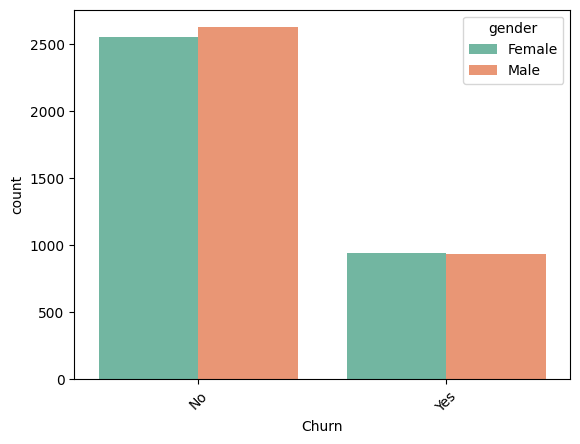

SeniorCitizen :

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64




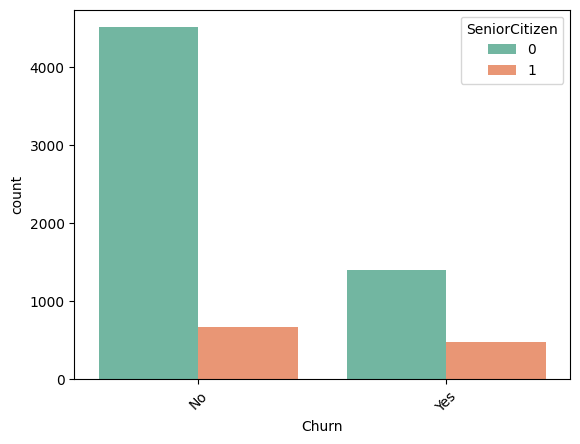

Partner :

Partner
No     3641
Yes    3402
Name: count, dtype: int64




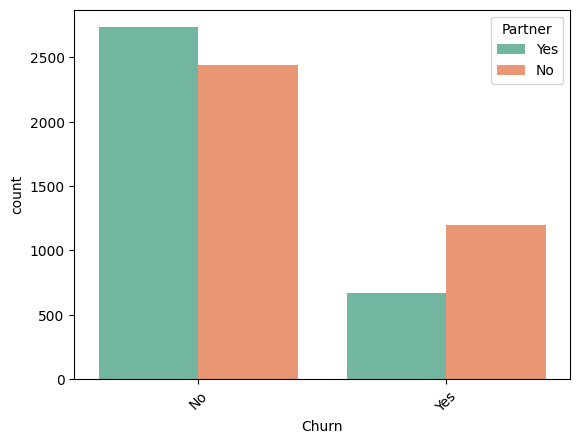

Dependents :

Dependents
No     4933
Yes    2110
Name: count, dtype: int64




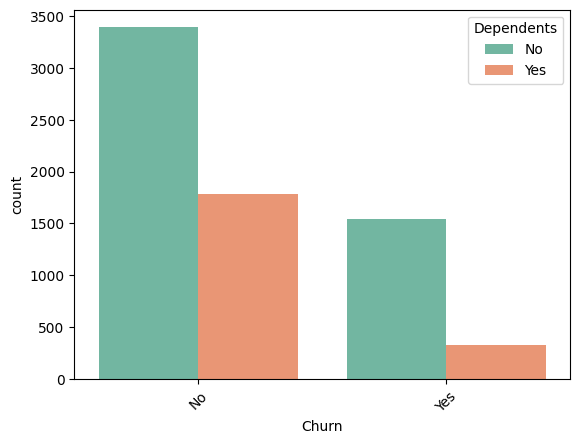

PhoneService :

PhoneService
Yes    6361
No      682
Name: count, dtype: int64




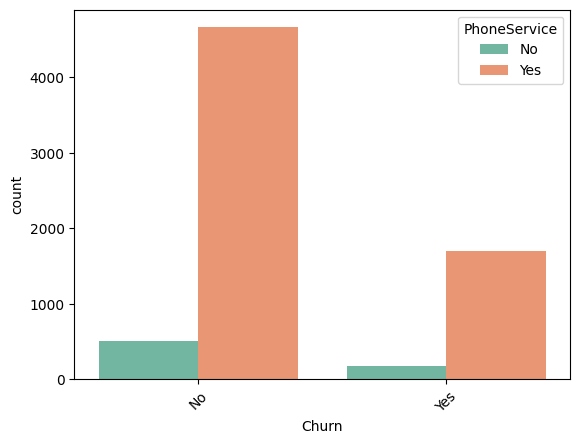

MultipleLines :

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64




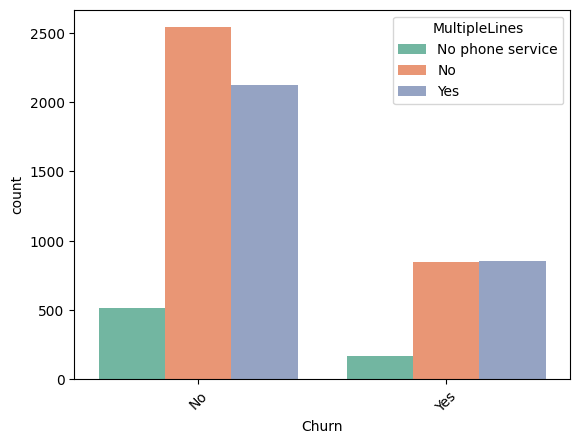

InternetService :

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64




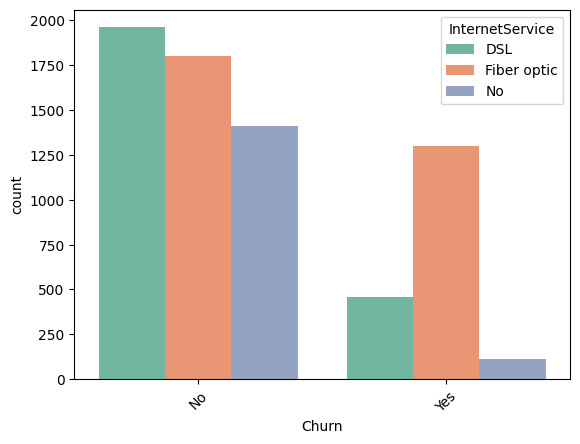

OnlineSecurity :

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64




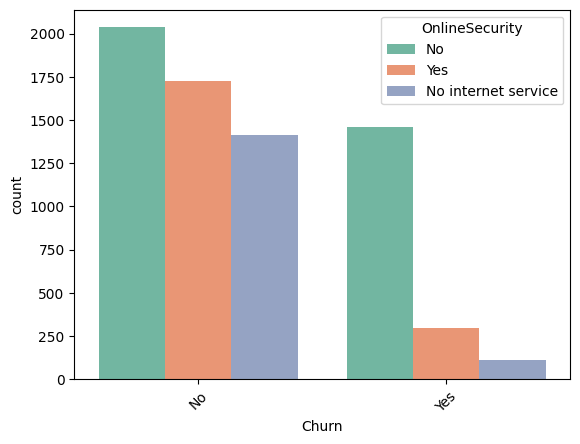

OnlineBackup :

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64




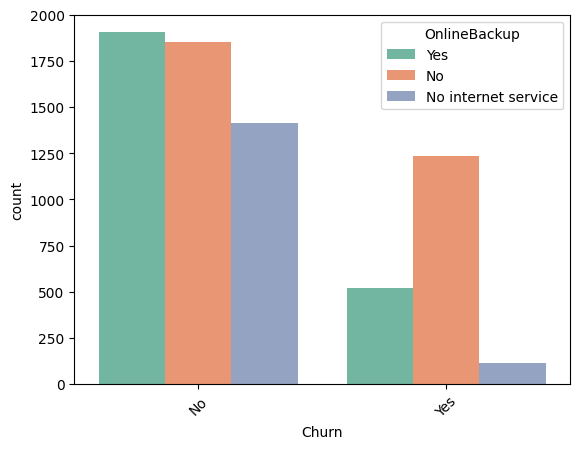

DeviceProtection :

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64




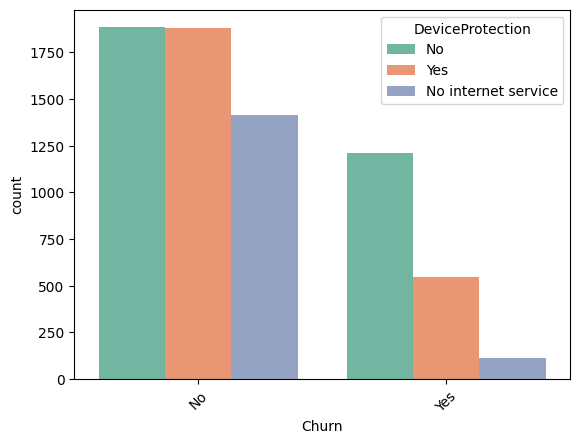

TechSupport :

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64




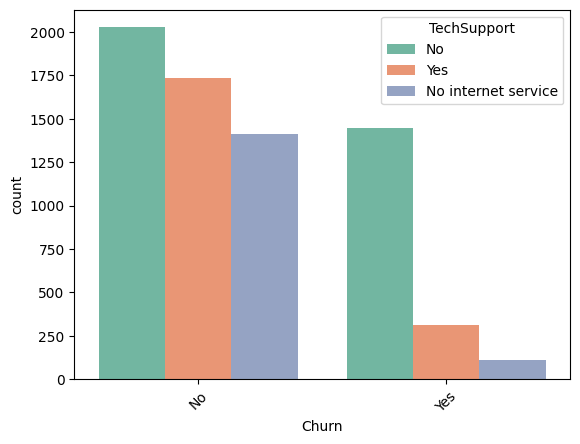

StreamingTV :

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64




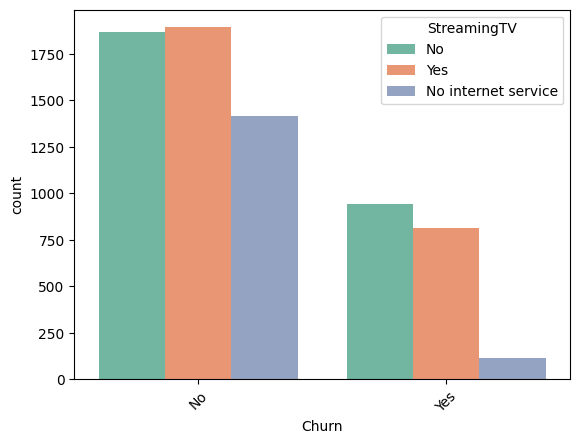

StreamingMovies :

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64




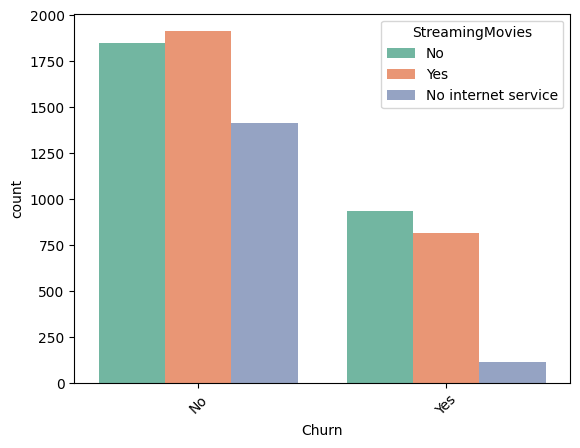

Contract :

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64




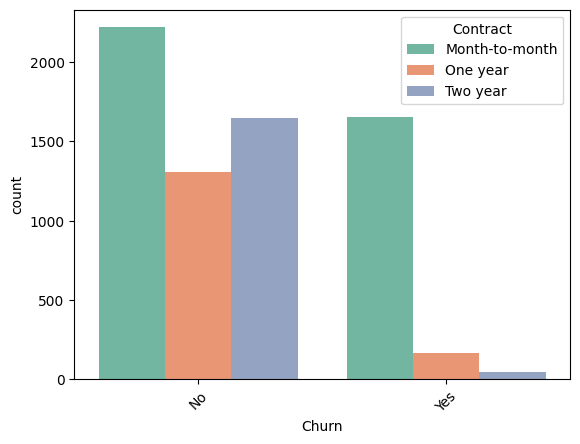

PaperlessBilling :

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64




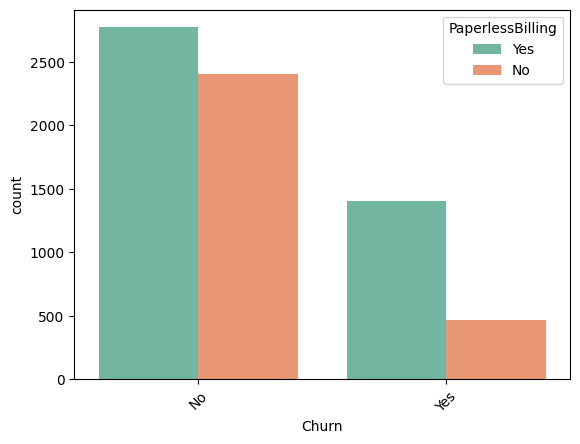

PaymentMethod :

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64




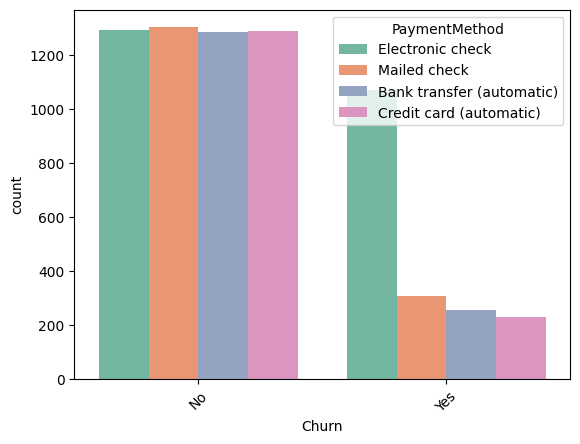

In [57]:
##Write code to explore relationships
for i in cats:
   print(i, ':\n')
   print(records[i].value_counts())
   print('\n')
   sns.countplot(data=records, hue=i, x=records['Churn'], palette='Set2')
   # Rotate labels on the x-axis
   plt.xticks(rotation=45)
   plt.show()



gender :

gender
Male      3555
Female    3488
Name: count, dtype: int64




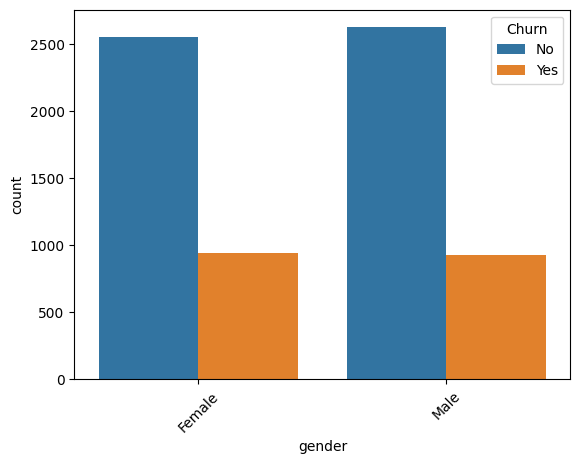

SeniorCitizen :

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64




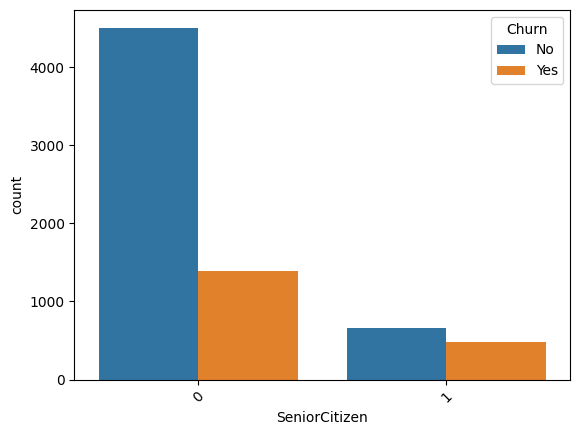

Partner :

Partner
No     3641
Yes    3402
Name: count, dtype: int64




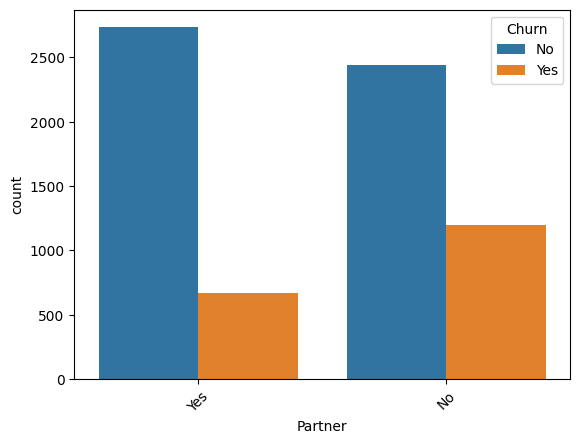

Dependents :

Dependents
No     4933
Yes    2110
Name: count, dtype: int64




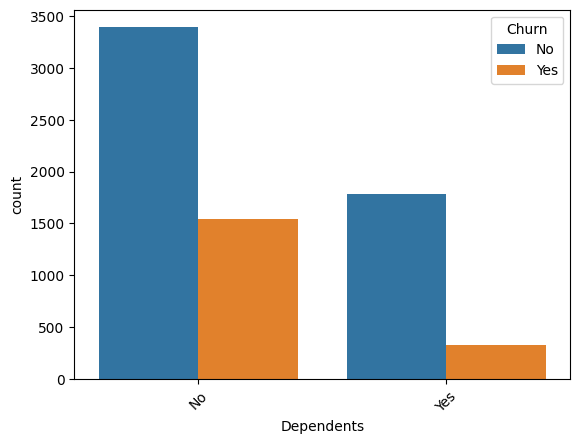

PhoneService :

PhoneService
Yes    6361
No      682
Name: count, dtype: int64




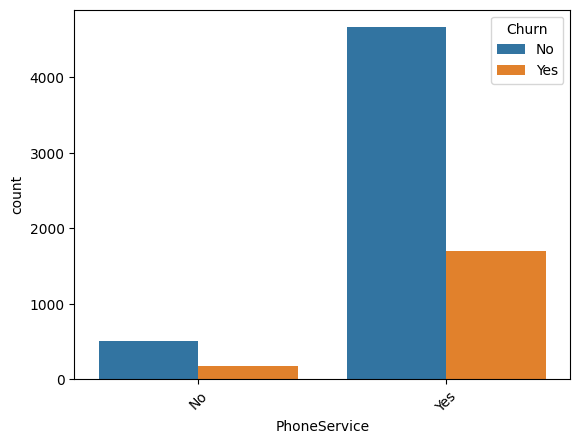

MultipleLines :

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64




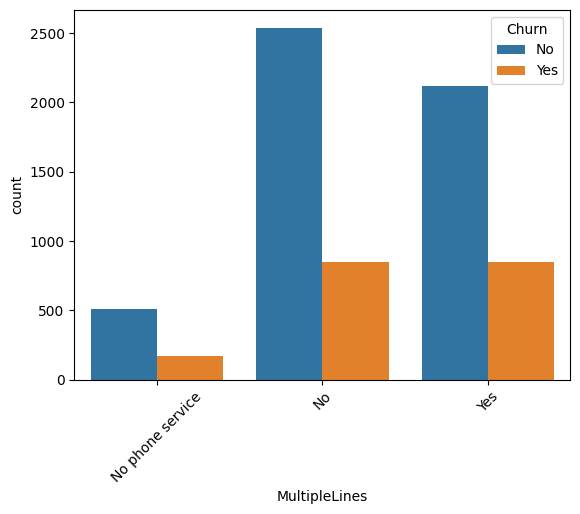

InternetService :

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64




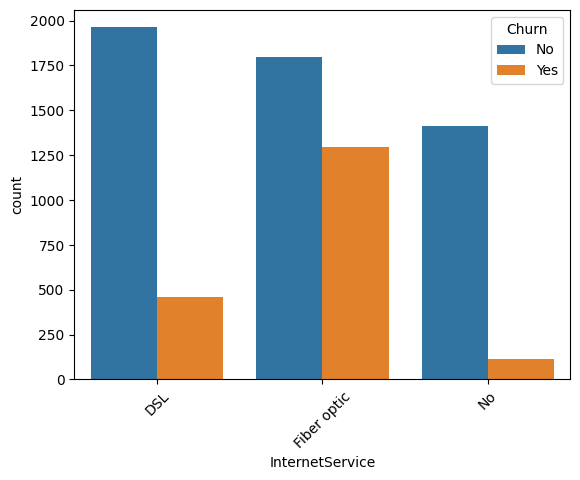

OnlineSecurity :

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64




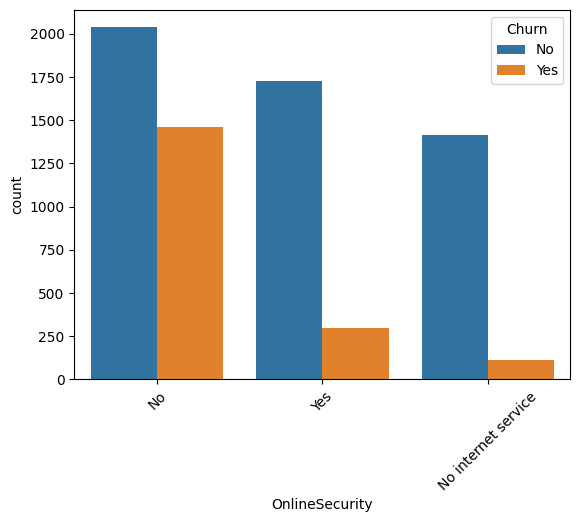

OnlineBackup :

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64




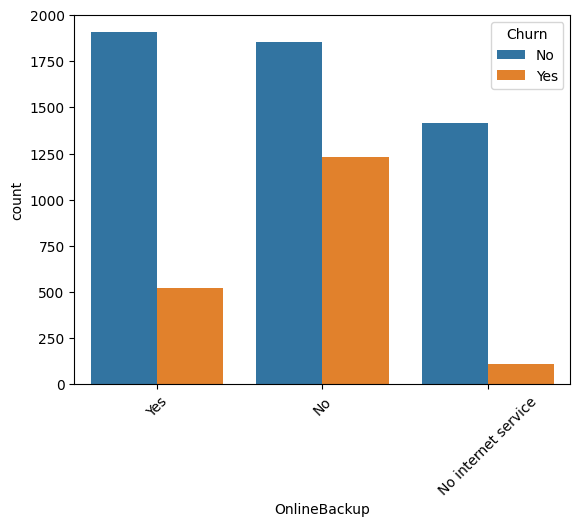

DeviceProtection :

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64




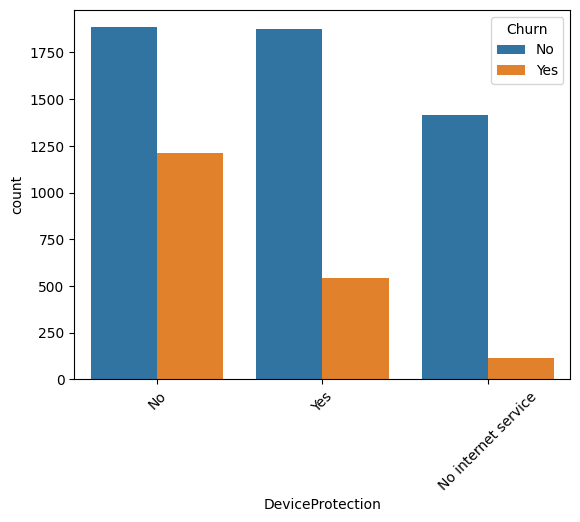

TechSupport :

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64




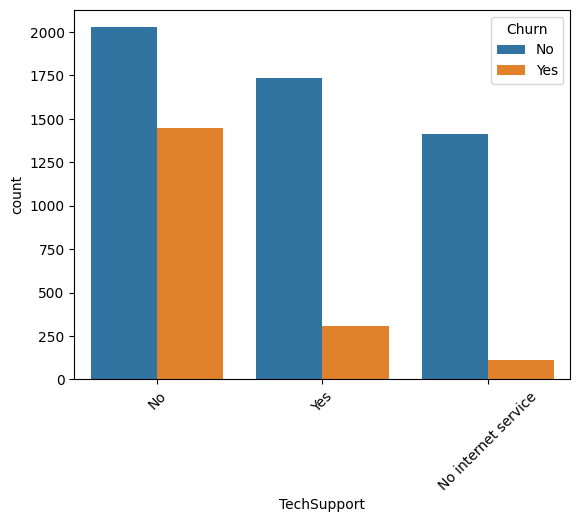

StreamingTV :

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64




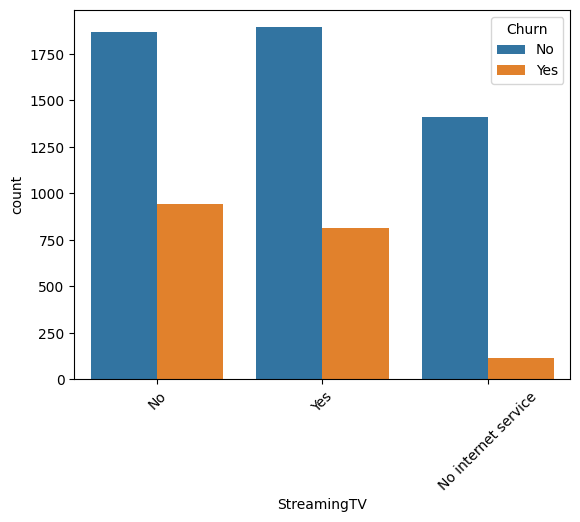

StreamingMovies :

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64




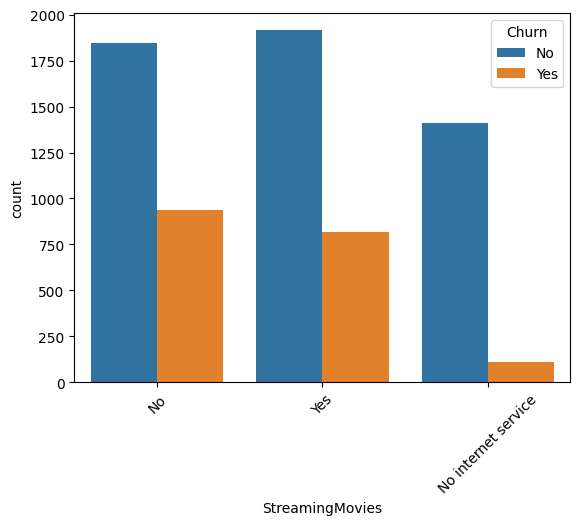

Contract :

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64




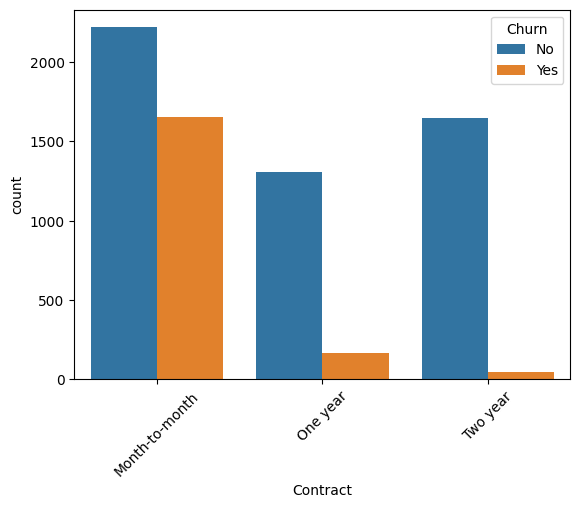

PaperlessBilling :

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64




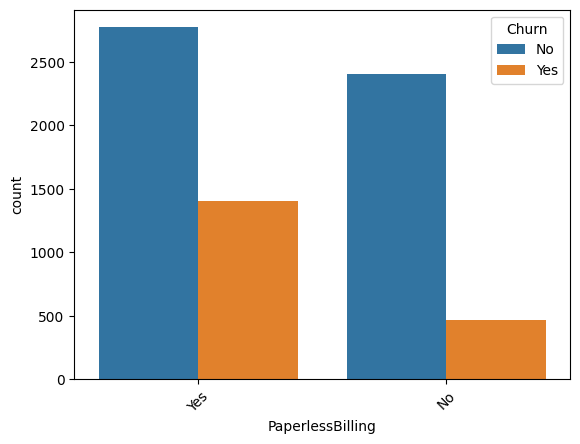

PaymentMethod :

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64




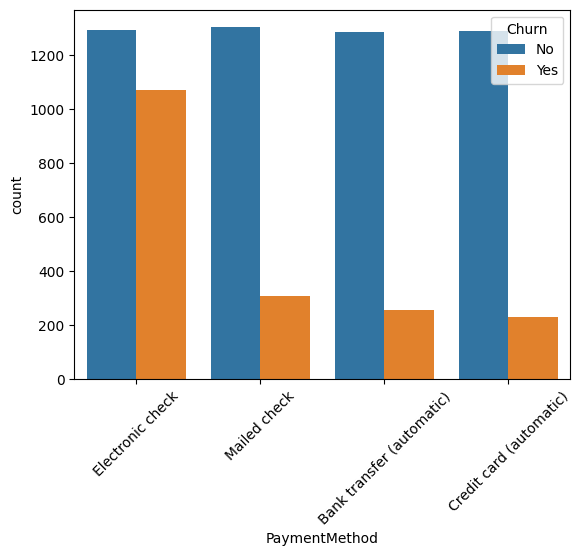

In [58]:
##Write code to explore relationships
for i in cats:
   print(i, ':\n')
   print(records[i].value_counts())
   print('\n')
   sns.countplot(x=records[i], hue=records['Churn'])
   # Rotate labels on the x-axis
   plt.xticks(rotation=45)
   plt.show()


Observe the impact if we break the bars by Churn or break Churn by another variable

#### **Check mutual information score**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mutual_info_score.html

the mutual_info_score function from sklearn measures the mutual information (MI) between two categorical variables, indicating how much knowing the value of one variable reduces the uncertainty about the other.

In [59]:
cats_withoutChurn=['gender','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

In [60]:
from sklearn.metrics import mutual_info_score

In [61]:
mi_scores = {}

# Loop through each categorical feature and calculate MI score
for cat in cats_withoutChurn:
    mi_scores[cat] = mutual_info_score(records[cat], records['Churn'])

# Sort features by their MI scores
sorted_scores = sorted(mi_scores.items(), key=lambda x: x[1], reverse=True)

# Display the scores
for feature, score in sorted_scores:
    print(f"{feature}: {score:.3f}")


Contract: 0.098
OnlineSecurity: 0.065
TechSupport: 0.063
InternetService: 0.056
OnlineBackup: 0.047
PaymentMethod: 0.045
DeviceProtection: 0.044
StreamingMovies: 0.032
StreamingTV: 0.032
PaperlessBilling: 0.019
Dependents: 0.014
Partner: 0.011
SeniorCitizen: 0.011
MultipleLines: 0.001
PhoneService: 0.000
gender: 0.000


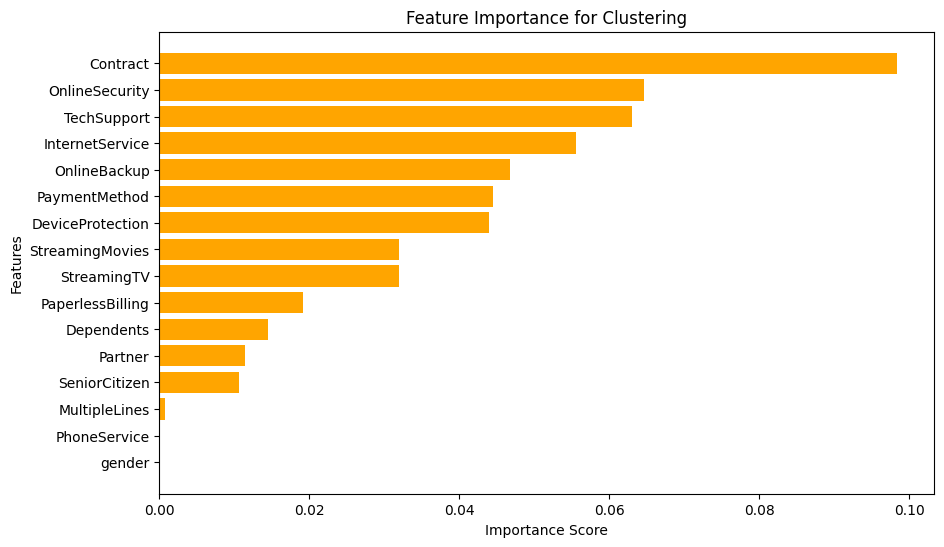

In [62]:
features, scores = zip(*sorted_scores)
plt.figure(figsize=(10, 6))
plt.barh(features, scores, color='orange')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Clustering')
plt.gca().invert_yaxis()
plt.show()

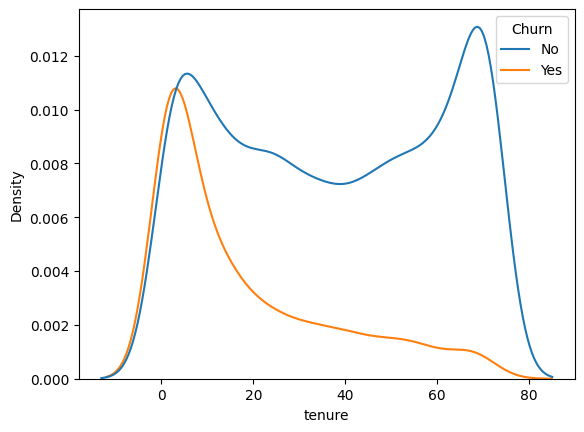

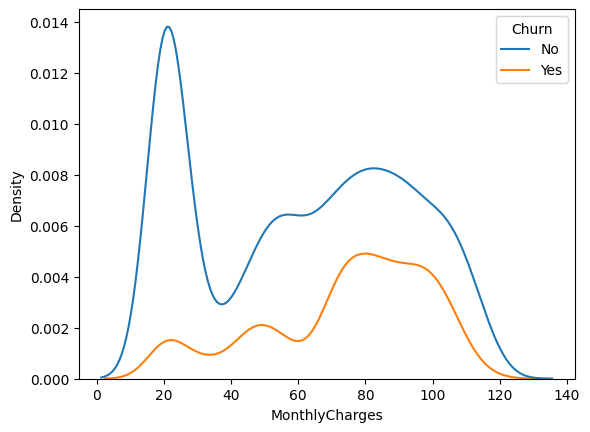

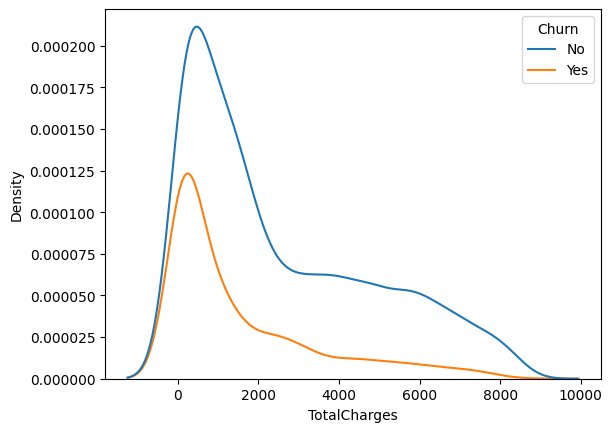

In [63]:
for i in nums:
  plt.figure()
  sns.kdeplot(data=records, x=i, hue='Churn')

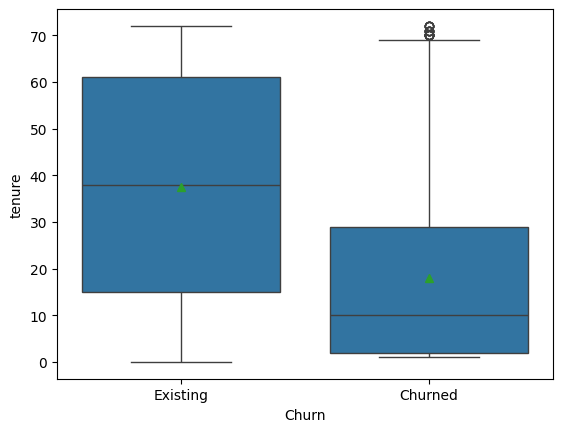

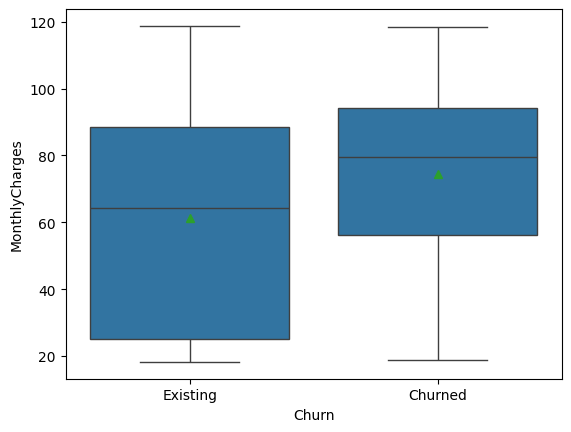

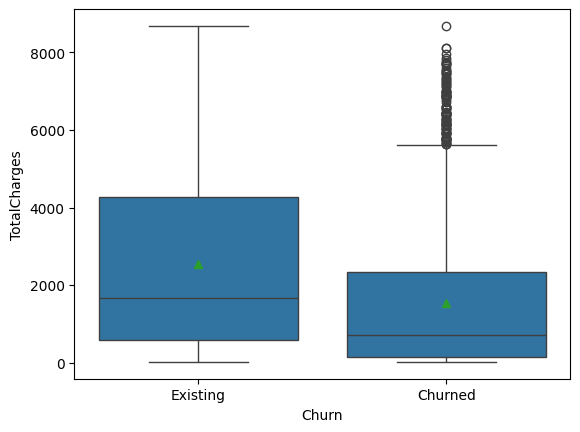

In [64]:
##Write code: reuse the code above and break the distribution by the target
for i in nums:
   sns.boxplot(data=records, y=i, showmeans=True, x='Churn')
   # Label x-ticks
   plt.xticks([0, 1], ['Existing', 'Churned'])
   plt.show()

**Multivariate analysis**

*You can visualise more than 2 dimensions*

<Axes: xlabel='tenure', ylabel='TotalCharges'>

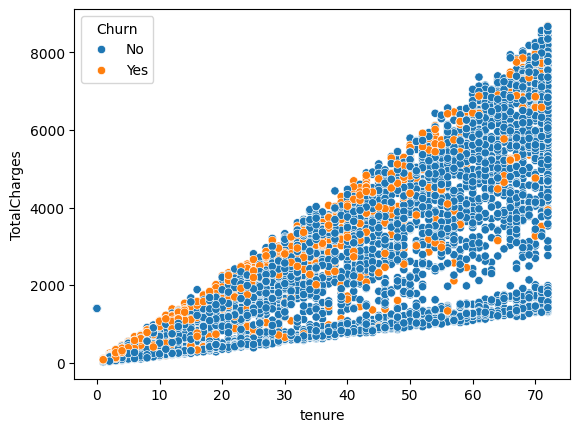

In [65]:
sns.scatterplot(data=records, x='tenure', y='TotalCharges', hue='Churn')

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

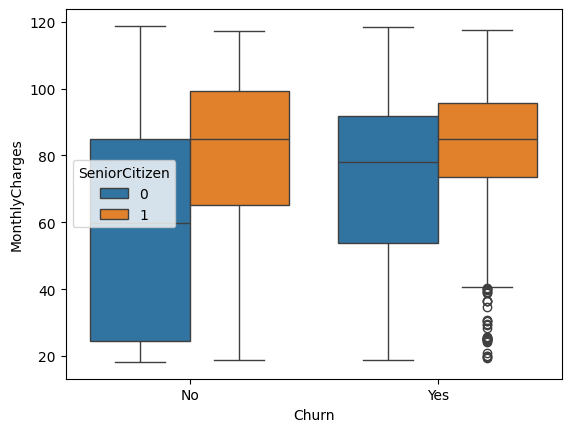

In [66]:
sns.boxplot(data=records, y='MonthlyCharges', x='Churn', hue='SeniorCitizen')

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

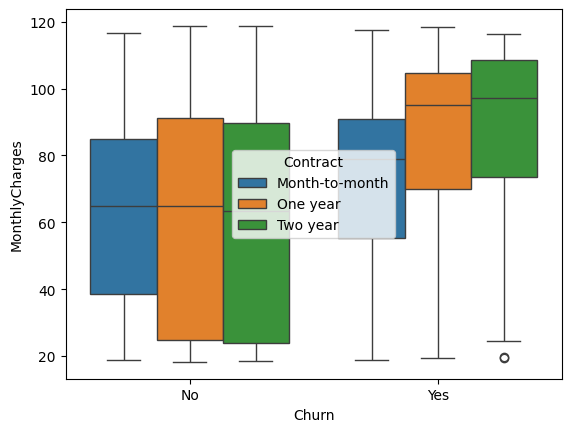

In [67]:
sns.boxplot(data=records, y='MonthlyCharges', x='Churn', hue='Contract')

<Axes: xlabel='Contract', ylabel='MonthlyCharges'>

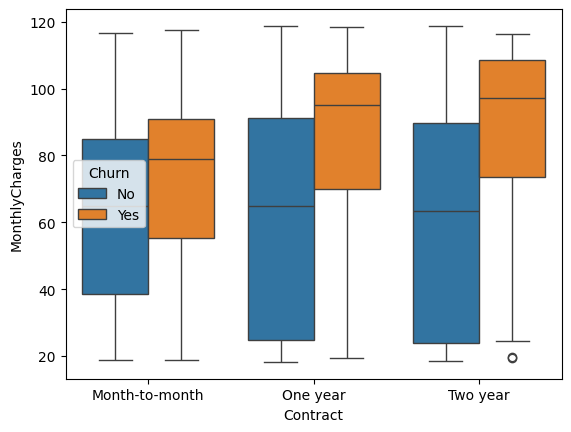

In [68]:
sns.boxplot(data=records, y='MonthlyCharges', x='Contract', hue='Churn')

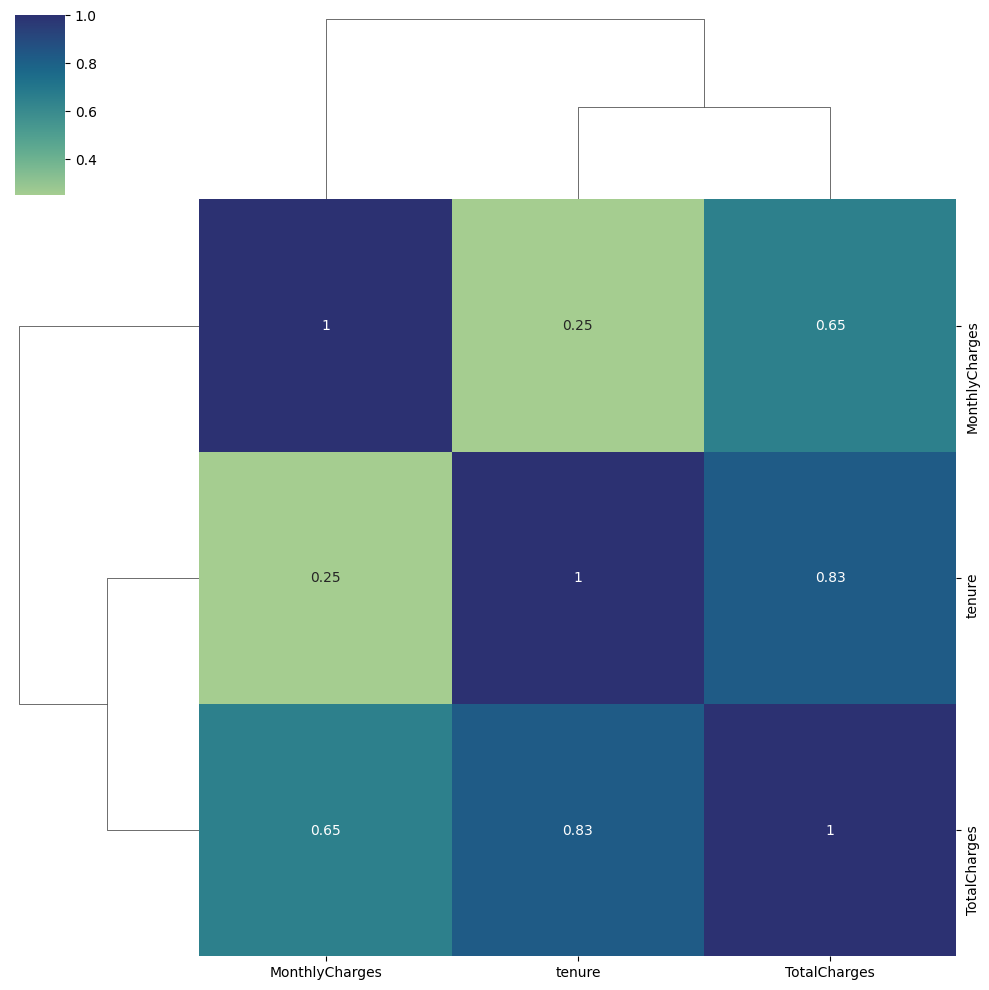

In [69]:
sns.clustermap(data=records[nums].corr(), annot=True, cmap='crest')



*   You may need to perform more bivariate and multivariable analyses depending on the datasets given to you, and domain expertise available.
*   You may need to read previous reports/papers to inform your EDA.



---



### **Data preparation**
* Data conversion
* Feature selection: X
* Scale data


**Feature selection**

**Include Churn if:**
Our aim is to understand the characteristics of churned and retained customers. By including Churn, we can directly identify patterns or clusters where churn is more prevalent. If we want to develop different retention or upsell strategies for different kinds of customers who have churned or are at risk of churning.

**Do Not Include Churn if:** If we want to create segments that can be later used for predictive modeling, or to understand the underlying structure of your data without any predisposition toward the Churn variable.

**Hybrid Approach:** We can do clustering twice, once with Churn and once without, and then compare the characteristics of the resulting clusters.

So, the choice to include or exclude the Churn variable should align with the specific analytical objectives.

In [70]:
#convert ordinal target data to numerical
def coding_churn(x):
    if x=='Yes': return 1
    if x=='No': return 0

records['Churn'] = records['Churn'].apply(coding_churn)

In [71]:
#Convert nominal variables to numerical using get dummies
#Note we should code gender with individual vairables to avoid binary categorisation of gender
records=pd.get_dummies(records, columns=['gender'], drop_first=True)

In [72]:
records.Contract.value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [73]:
#convert ordinal target data to numerical
def coding_Contract(x):
    if x=='Month-to-month': return 1
    if x=='One year': return 2
    if x=='Two year': return 3

records['Contract_N'] = records['Contract'].apply(coding_Contract)

In [74]:
records

SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines  \
0                 0     Yes         No       1           No  No phone service   
1                 0      No         No      34          Yes                No   
2                 0      No         No       2          Yes                No   
3                 0      No         No      45           No  No phone service   
4                 0      No         No       2          Yes                No   
...             ...     ...        ...     ...          ...               ...   
7038              0     Yes        Yes      24          Yes               Yes   
7039              0     Yes        Yes      72          Yes               Yes   
7040              0     Yes        Yes      11           No  No phone service   
7041              1     Yes         No       4          Yes               Yes   
7042              0      No         No      66          Yes                No   

     InternetService OnlineSecurity OnlineBackup DeviceProtection  ...  \
0                DSL             No          Yes               No  ...   
1                DSL            Yes           No              Yes  ...   
2                DSL            Yes          Yes               No  ...   
3                DSL            Yes           No              Yes  ...   
4        Fiber optic             No           No               No  ...   
...              ...            ...          ...              ...  ...   
7038             DSL            Yes           No              Yes  ...   
7039     Fiber optic             No          Yes              Yes  ...   
7040             DSL            Yes           No               No  ...   
7041     Fiber optic             No           No               No  ...   
7042     Fiber optic            Yes           No              Yes  ...   

     StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No              No  Month-to-month              Yes   
1             No              No        One year               No   
2             No              No  Month-to-month              Yes   
3             No              No        One year               No   
4             No              No  Month-to-month              Yes   
...          ...             ...             ...              ...   
7038         Yes             Yes        One year              Yes   
7039         Yes             Yes        One year              Yes   
7040          No              No  Month-to-month              Yes   
7041          No              No  Month-to-month              Yes   
7042         Yes             Yes        Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  \
0              Electronic check          29.85         29.85      0   
1                  Mailed check          56.95       1889.50      0   
2                  Mailed check          53.85        108.15      1   
3     Bank transfer (automatic)          42.30       1840.75      0   
4              Electronic check          70.70        151.65      1   
...                         ...            ...           ...    ...   
7038               Mailed check          84.80       1990.50      0   
7039    Credit card (automatic)         103.20       7362.90      0   
7040           Electronic check          29.60        346.45      0   
7041               Mailed check          74.40        306.60      1   
7042  Bank transfer (automatic)         105.65       6844.50      0   

      gender_Male  Contract_N  
0           False           1  
1            True           2  
2            True           1  
3            True           2  
4           False           1  
...           ...         ...  
7038         True           2  
7039        False           2  
7040        False           1  
7041         True           1  
7042         True           3  

[7043 rows x 21 columns]

In [75]:
# Select relevant features for clustering; # you can edit this list
#Option 1, for simplicity let's start with two features
features=['MonthlyCharges', 'tenure']

#Option 2
#features=['SeniorCitizen','Contract_N','TotalCharges','MonthlyCharges', 'tenure']

X = records[features]

In [76]:
X.describe()

MonthlyCharges       tenure
count     7043.000000  7043.000000
mean        64.761692    32.371149
std         30.090047    24.559481
min         18.250000     0.000000
25%         35.500000     9.000000
50%         70.350000    29.000000
75%         89.850000    55.000000
max        118.750000    72.000000

In [77]:
#import scaler
from sklearn.preprocessing import MinMaxScaler

In [78]:
# Scale the features using Min-Max Scaling
scaler = MinMaxScaler()


In [79]:
#Option 1

# Features to scale
features_to_scale = ['MonthlyCharges', 'tenure' ]

# Fit and transform the features to scale on the training data
X_scaled_values = scaler.fit_transform(X)

# Create DataFrames from the scaled values
X_features_scaled = pd.DataFrame(X_scaled_values, columns=features_to_scale)
X_scaled = X_features_scaled



In [80]:
# Option 2
# Features to scale
#features_to_scale = ['TotalCharges','MonthlyCharges', 'tenure' ]

# Features to keep
#features_to_keep = ['SeniorCitizen', 'Contract_N']

# Fit and transform the features to scale on the training data
#X_scaled_values = scaler.fit_transform(X[features_to_scale])

# Create DataFrames from the scaled values
#X_features_scaled = pd.DataFrame(X_scaled_values, columns=features_to_scale)

# Concatenate the unscaled features back into the scaled DataFrames
#X_scaled = pd.concat([X_features_scaled, X[features_to_keep].reset_index(drop=True)], axis=1)

In [81]:
X_scaled.describe()

MonthlyCharges       tenure
count     7043.000000  7043.000000
mean         0.462803     0.449599
std          0.299403     0.341104
min          0.000000     0.000000
25%          0.171642     0.125000
50%          0.518408     0.402778
75%          0.712438     0.763889
max          1.000000     1.000000


---



## **1.3. K-Means clustering**

### **Model building**

In [82]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [83]:
# Fit K-means clustering model with a 'guessed' number of clusters
k=5
kmeans = KMeans(n_clusters=k, n_init='auto',max_iter=300, random_state=2024)

#fit kmeans with X_scaled
kmeans.fit(X_scaled)

# Add cluster labels to original dataset
records['Cluster'] = kmeans.labels_

## **1.4. Clustering Evaluation**
* Within-Cluster Sum of Squares
* Silhouette score


###**Within-Cluster Sum of Squares**
Within-Cluster Sum of Squares (WCSS) is the sum of the squared distance (Sum of Squared Errors SSE) between each data point and its assigned cluster center.

WCSS measures the compactness of the clusters, with lower values indicating tighter and more compact clusters.

Note: WCSS will always decrease as the number of clusters k increases, because a high k will make each cluster smaller and thus closer to its centroid. However, this doesn't mean that a high k is always better.

In [84]:
# Evaluate the model using within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", '%.3f' % wcss)


Within-Cluster Sum of Squares (WCSS): 232.917


### **The Davies-Bouldin Index (DBI)**  

Davies-Bouldin index measures the ratio of the within-cluster compactness to the between-cluster separation (with the closest cluster). Lower values of the index indicate better clustering.


In [85]:
from sklearn.metrics import davies_bouldin_score

# Compute the Davies-Bouldin index
dbs = davies_bouldin_score(X_scaled, kmeans.labels_)
print("Davies Bouldin index:", '%.3f' % dbs)

Davies Bouldin index: 0.752


### **Silhouette score**

measures how well-separated the clusters are, and how similar the data points are within each cluster.

* The silhouette score ranges from -1 to 1.
* A score of 1 means that the data points within a cluster are very similar to each other, and very different from the data points in other clusters.

> *  0.7 or higher: the  clustering is good.
> *  0.5 to 0.7: the clustering is fair.
> *  below 0.5: clustering is poor.

* A score of 0 means that the data points are equally similar to neighboring clusters.
* A negative score means that the data points may have been assigned to the wrong cluster, there may be noise or outliers. clustering is sensitive to initiatlisation. Try it gain.

In [86]:
# Compute the Silhouette score for the clustering model
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)

print('Silhouette score:', '%.3f' % silhouette_avg)

Silhouette score: 0.442


In [87]:
#Import funtions to visualise silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.cm as cm

In [88]:
#fit kmeans with X_scaled to get labels
cluster_labels = kmeans.fit_predict(X_scaled)

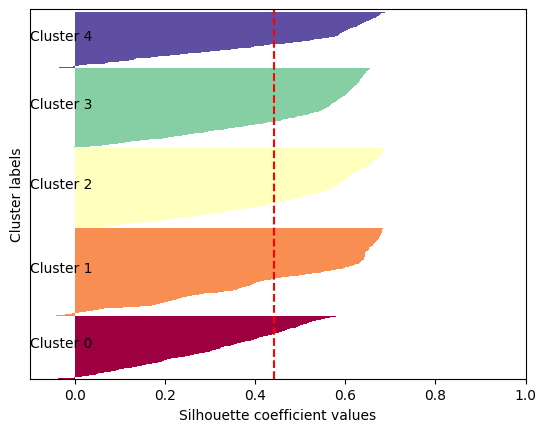

In [89]:
# Compute silhouette scores
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

# Plot silhouette diagram
n_clusters = 5
fig, ax = plt.subplots()
y_lower, y_upper = 0, 0

# Define the colormap, options include: autumn, Spectral, viridis, plasma, cool, jet
cmap = cm.Spectral

# Create a list of evenly spaced values in the range [0, 1]
values = np.linspace(0, 1, n_clusters)

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper += size_cluster_i
    color = cmap(values[i])
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1.0,
            edgecolor='none', color=color)
    ax.text(-0.1, (y_lower + y_upper) / 2, 'Cluster ' + str(i), color='black', fontsize=10)
    y_lower += size_cluster_i

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster labels")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

plt.show()

## **1.5. Optimising k**


### **Use the elbow method based on the SSE (WCSS) score**





In [90]:
# Determine optimal number of clusters using the SSE metric
sse_scores = []
best_k=2
best_sse_score=4622.613
for i in range(2, 41):
  kmeans = KMeans(n_clusters=i, n_init=2)
  kmeans.fit(X_scaled)
  sse_score_i=kmeans.inertia_
  sse_scores.append(sse_score_i)
  if best_sse_score > sse_score_i:
    best_k = i
    best_sse_score = sse_score_i

print('Best k: ', best_k)
print('Best within cluster sum of squarred error score: ', '%.3f' %best_sse_score)

Best k:  40
Best within cluster sum of squarred error score:  22.430


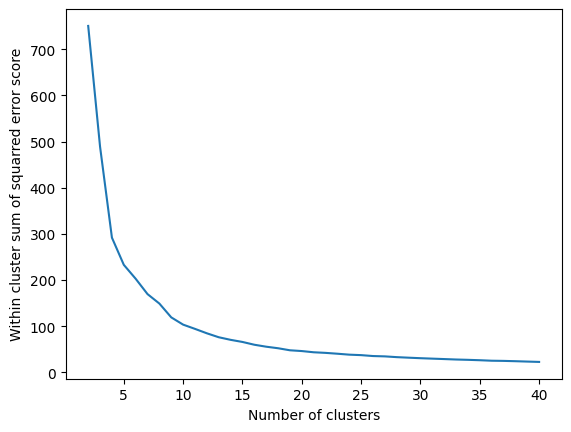

In [91]:
# Plot the silhouette scores to determine optimal number of clusters
plt.plot(range(2,41), sse_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Within cluster sum of squarred error score")
plt.show()

As k increases, clusters become smaller hence WCSS becomes smaller. Thus, WCSS along is not a good metric.

**Optimise the number of clusters based on davies_bouldin_score**

In [92]:
from sklearn.metrics import davies_bouldin_score

In [93]:
# Determine optimal number of clusters using the SSE metric
dbs_scores = []
best_k=3
best_dbs_score=1
for k in range(2, 41):
  kmeans = KMeans(n_clusters=k, n_init='auto', max_iter=300, random_state=2024)
  kmeans.fit(X_scaled)
  dbs_score_k=davies_bouldin_score(X_scaled, kmeans.labels_)
  dbs_scores.append(dbs_score_k)
  if best_dbs_score > dbs_score_k:
    best_k = k
    best_dbs_score = dbs_score_k

print('Best k: ', best_k)
print('Best Davies Bouldin index: ', '%.3f' %best_dbs_score)

Best k:  18
Best Davies Bouldin index:  0.704


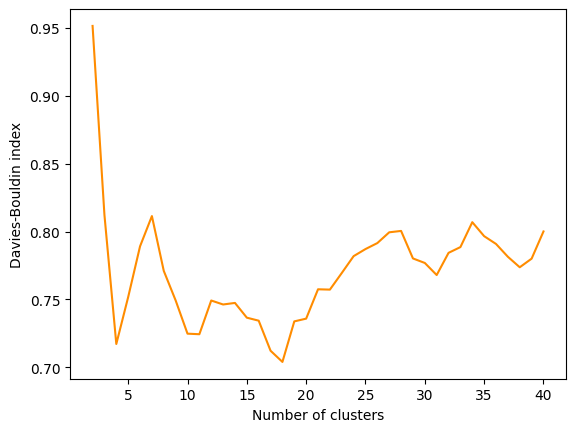

In [94]:
# Plot the Davies-Bouldin indices to determine optimal number of clusters
plt.plot(range(2,41), dbs_scores, color='darkorange', label='Davies Bouldin index')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin index')
plt.show()

### **Optimise the number of clusters based on the silhouette score**

We can also plot the Silhouette Score against k and look for the "elbow" or the point where the Silhouette Score starts to diminish.

The Silhouette Score ranges from -1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. We should look for the number of clusters that gives the highest average Silhouette Score.

In [95]:
# Determine optimal number of clusters using silhouette score
sil_scores = []
best_k=2
best_sil_score=0
for i in range(2, 41):
  kmeans = KMeans(n_clusters=i, n_init=2)
  kmeans.fit(X_scaled)
  sil_score_i=silhouette_score(X_scaled, kmeans.labels_)
  sil_scores.append(sil_score_i)
  if best_sil_score < sil_score_i:
    best_k = i
    best_sil_score = sil_score_i

print('Best k: ', best_k)
print('Best silhouette score: ', '%.3f' %best_sil_score)

Best k:  4
Best silhouette score:  0.473


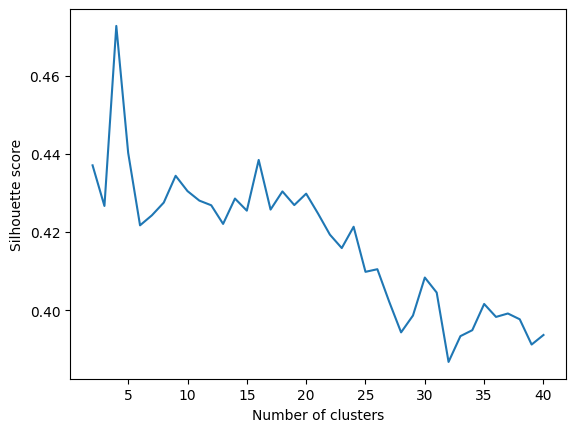

In [96]:
# Plot the silhouette scores to determine optimal number of clusters
plt.plot(range(2,41), sil_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()



**Let's create a graph to observe both metrics**

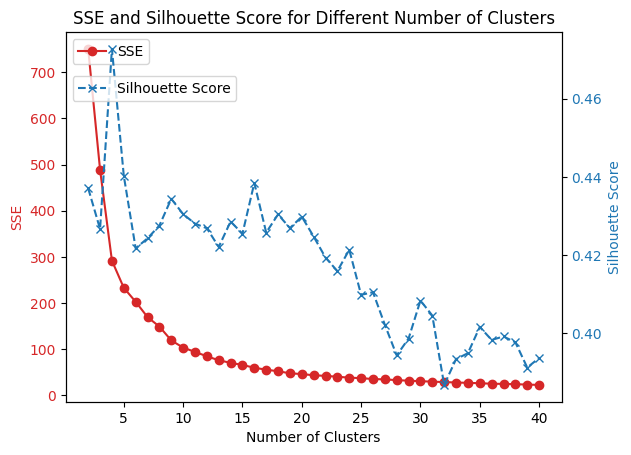

In [97]:
# Create a figure and a set of subplots (two y-axes)
fig, ax1 = plt.subplots()

cluster_range = range(2, 41)

# Plot SSE
color = 'tab:red'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('SSE', color=color)
ax1.plot(cluster_range, sse_scores, marker='o', label='SSE', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create the second y-axis to plot Silhouette Score
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(cluster_range, sil_scores, marker='x', linestyle='--', label='Silhouette Score', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show legend
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0.0, 0.9))

# Show plot
plt.title("SSE and Silhouette Score for Different Number of Clusters")
plt.show()

## **1.6 Model Selection**

'Model' denotes the representation or structure that the algorithm has learned from the data.

In [98]:
# let's go with k=4
n_clusters=4

In [99]:
# initialise the model object
kmeans = KMeans(n_clusters=best_k,n_init='auto', random_state=2024)

#Fit K-means clustering model with the selected number of clusters
kmeans.fit(X_scaled)


KMeans(n_clusters=4, n_init='auto', random_state=2024)

In [100]:
# Add cluster labels to original dataset
records['Cluster'] = kmeans.labels_

In [101]:
# Evaluate the model using within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", '%.3f' % wcss)

# Compute the Davies-Bouldin index
dbs = davies_bouldin_score(X_scaled, kmeans.labels_)
print("Davies Bouldin index:", '%.3f' % dbs)

# Compute the Silhouette score for the clustering model
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)

print('Silhouette score:', '%.3f' % silhouette_avg)


Within-Cluster Sum of Squares (WCSS): 291.786
Davies Bouldin index: 0.717
Silhouette score: 0.473


**Let's create the silhouette plot**

<ipython-input-102-91266c7e9823>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Spectral")


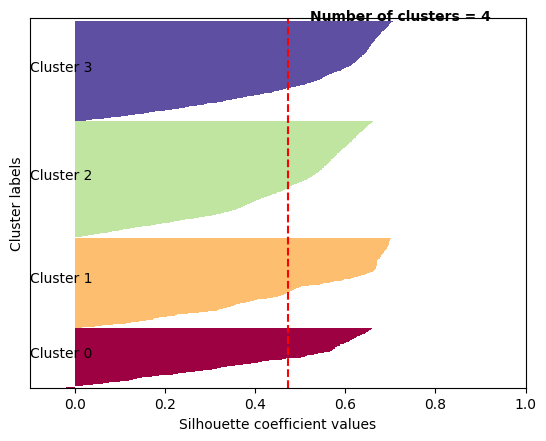

In [102]:
# Compute sample silhouette scores
cluster_labels = kmeans.labels_
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

# Create a color map
cmap = cm.get_cmap("Spectral")

# Create a list of evenly spaced values in the range [0, 1]
values = np.linspace(0, 1, n_clusters)

# Plot silhouette diagram
fig, ax = plt.subplots()
y_lower, y_upper = 0, 0
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper += size_cluster_i
    color = cmap(values[i])
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1.0,
            edgecolor='none', color=color)
    ax.text(-0.1, (y_lower + y_upper) / 2, 'Cluster ' + str(i), color='black', fontsize=10)
    y_lower += size_cluster_i

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster labels")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

ax.text(silhouette_avg + 0.05, len(X_scaled) + 5, "Number of clusters = %d" % n_clusters, fontsize=10, fontweight='bold')

plt.show()

The evaluation and optimisation are mathematically based, we need to post analyse them. In addition, domain expertise is important to make sense if the clusters are meaningful, applicable and ethical.

## **1.7 Post-analysis for Cluster Profiling**

*Examine the Cluster size*

In [103]:
records[['MonthlyCharges', 'tenure', 'SeniorCitizen','Contract', 'Cluster']]

MonthlyCharges  tenure  SeniorCitizen        Contract  Cluster
0              29.85       1              0  Month-to-month        1
1              56.95      34              0        One year        2
2              53.85       2              0  Month-to-month        1
3              42.30      45              0        One year        0
4              70.70       2              0  Month-to-month        2
...              ...     ...            ...             ...      ...
7038           84.80      24              0        One year        2
7039          103.20      72              0        One year        3
7040           29.60      11              0  Month-to-month        1
7041           74.40       4              1  Month-to-month        2
7042          105.65      66              0        Two year        3

[7043 rows x 5 columns]

In [104]:
cluster_count=records.Cluster.value_counts()
cluster_count

Cluster
2    2245
3    1932
1    1710
0    1156
Name: count, dtype: int64

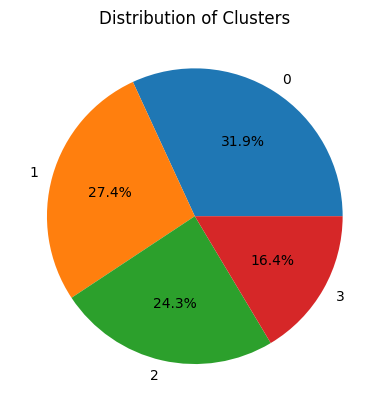

In [105]:
#Let's generate a pie chart with the distribution of churned cases, along with percentage labels.

# Sort the index to ensure the clusters are in order
sorted_cluster_count = cluster_count.sort_index()

colours = sns.color_palette("tab10", n_colors=len(cluster_count))

plt.pie(cluster_count, labels=sorted_cluster_count.index, autopct='%1.1f%%', colors= colours)
plt.title('Distribution of Clusters')
plt.show()

*Let's examine clusters based on the selected features*


KDE plots can be  useful for understanding the shape, size, and orientation of each cluster in a more continuous form as compared to discrete scatter plots.

*   Darker areas indicate higher density, i.e., more data points are packed that region of the feature space. Lighter areas indicate lower density, i.e., fewer data points.
*   Contours encircle regions of varying density, providing topographical maps of data density. The "height" from the center of the circle represents the density of the data at that point.

**If you use Option 2** for feature selection then change index accordingly.


*Get centroids from the kmeans model. It is based on X_scaled:*

> centroids = kmeans.cluster_centers_[:, :3]

*Fetch the centroids for 'MonthlyCharges' and 'tenure' columns from the reversed centroids:*

> monthly_charges_centroids = centroids_original[:, 1]  # 1 is the index for 'MonthlyCharges'

> tenure_centroids = centroids_original[:, 2]          # 2 is the index for 'tenure'

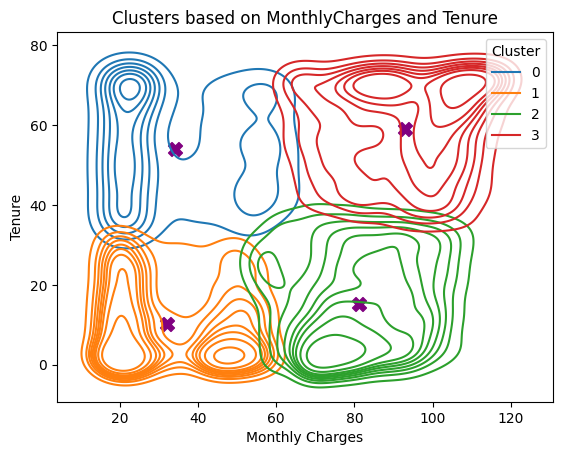

In [106]:
# Get centroids from the kmeans model. It is based on X_scaled.
centroids = kmeans.cluster_centers_[:, :2]

# Reverse the scaling on the centroids. (Remember, we scaled 'MonthlyCharges' and 'tenure' ).
centroids_original = scaler.inverse_transform(centroids)

# Create the KDE plot for the records
sns.kdeplot(data=records, x='MonthlyCharges', y='tenure', hue='Cluster', palette='tab10', legend='full')

# Fetch the centroids for 'MonthlyCharges' and 'tenure' columns from the reversed centroids
monthly_charges_centroids = centroids_original[:, 0]  # 0 is the index for 'MonthlyCharges'
tenure_centroids = centroids_original[:, 1]          # 1 is the index for 'tenure'

# Overlay the centroids on the same plot
plt.scatter(monthly_charges_centroids, tenure_centroids, c='purple', marker='X', s=100, label='Centroids')

# Setting the title and labels
plt.title('Clusters based on MonthlyCharges and Tenure')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')
#plt.legend(loc='upper right')

plt.show()


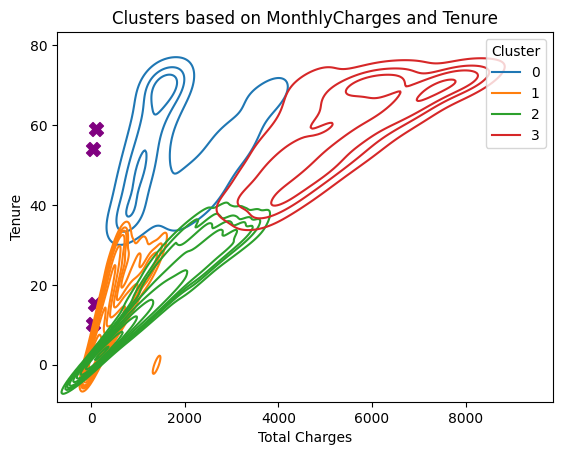

In [107]:
# Get centroids from the kmeans model. It is based on X_scaled.
centroids = kmeans.cluster_centers_

# Reverse the scaling on the centroids. (Remember, we scaled 'MonthlyCharges' and 'tenure' ).
centroids_original = scaler.inverse_transform(centroids)

# Create the KDE plot for the records
sns.kdeplot(data=records, x='TotalCharges', y='tenure', hue='Cluster', palette='tab10', legend='full')

# Fetch the centroids for 'MonthlyCharges' and 'tenure' columns from the reversed centroids
monthly_charges_centroids = centroids_original[:, 0]  # 0 is the index for 'MonthlyCharges'
tenure_centroids = centroids_original[:, 1]          # 1 is the index for 'tenure'

# Overlay the centroids on the same plot
plt.scatter(monthly_charges_centroids, tenure_centroids, c='purple', marker='X', s=100, label='Centroids')

# Setting the title and labels
plt.title('Clusters based on MonthlyCharges and Tenure')
plt.xlabel('Total Charges')
plt.ylabel('Tenure')
#plt.legend(loc='upper right')

plt.show()


In [108]:
records.groupby('Cluster')['tenure'].describe()

count       mean        std   min   25%   50%   75%   max
Cluster                                                            
0        1156.0  54.065744  12.209251  32.0  43.0  54.0  66.0  72.0
1        1710.0  10.303509   9.116548   0.0   2.0   8.0  17.0  32.0
2        2245.0  15.068151  11.165354   0.0   4.0  13.0  25.0  38.0
3        1932.0  59.028468  10.953870  34.0  50.0  61.0  70.0  72.0

In [109]:
records.groupby('Cluster')['MonthlyCharges'].describe()

count       mean        std    min    25%     50%     75%     max
Cluster                                                                    
0        1156.0  34.073270  15.588131  18.40  20.20  25.150   50.25   65.40
1        1710.0  32.182368  13.537866  18.25  20.05  25.075   45.65   57.55
2        2245.0  81.162339  12.650657  54.20  71.00  80.200   90.50  112.95
3        1932.0  92.901967  14.128039  61.20  81.40  94.550  104.80  118.75

In [110]:
# Get centroids of the clusters
centroids = kmeans.cluster_centers_

# Display the centroids
for idx, centroid in enumerate(centroids):
    print(f"Cluster {idx} centroid values:")
    for feature, value in zip(features, centroid):
        print(f"  {feature}: {value:.2f}")
    print("\n")

# To identify importance, you can look at the difference between centroids
for idx, feature in enumerate(features):
    print(f"Range for {feature}: {max(centroid[idx] for centroid in centroids) - min(centroid[idx] for centroid in centroids):.2f}")

Cluster 0 centroid values:
  MonthlyCharges: 0.16
  tenure: 0.75


Cluster 1 centroid values:
  MonthlyCharges: 0.14
  tenure: 0.14


Cluster 2 centroid values:
  MonthlyCharges: 0.63
  tenure: 0.21


Cluster 3 centroid values:
  MonthlyCharges: 0.74
  tenure: 0.82


Range for MonthlyCharges: 0.60
Range for tenure: 0.68


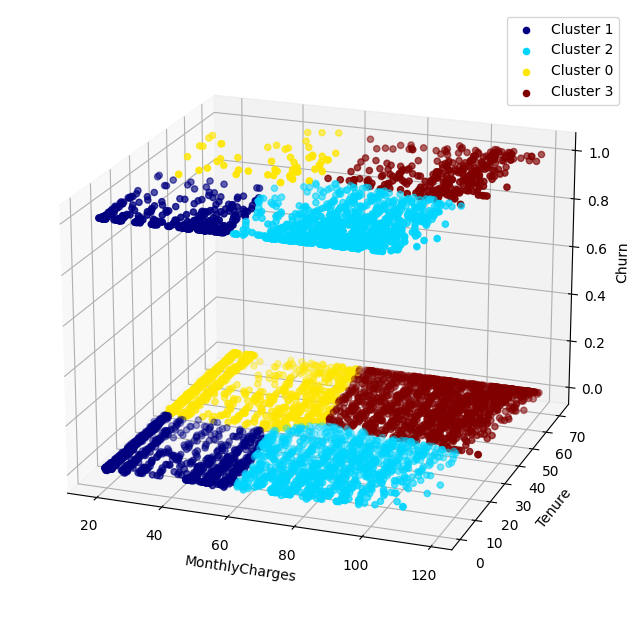

In [111]:
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure
fig = plt.figure(figsize=(12, 8))

# Add 3D subplot
# The '111' means 1x1 grid, first subplot, similar to MATLAB-style
ax = fig.add_subplot(111, projection='3d')

# Unique cluster labels
unique_clusters = records['Cluster'].unique()

# Color map
colors = plt.cm.jet(np.linspace(0, 1, len(unique_clusters)))

# Adjusting the viewing angle for better visibility
ax.view_init(elev=20, azim=-70)  # Modify these values as needed

# Scatter plot for each cluster
for i, cluster in enumerate(unique_clusters):
    cluster_data = records[records['Cluster'] == cluster]
    ax.scatter(cluster_data['MonthlyCharges'], cluster_data['tenure'], cluster_data['Churn'],
               label=f'Cluster {cluster}', c=[colors[i]])

# Legend and labels
ax.set_xlabel('MonthlyCharges')
ax.set_ylabel('Tenure')
ax.set_zlabel('Churn')
ax.legend()

# Show the plot
plt.show()

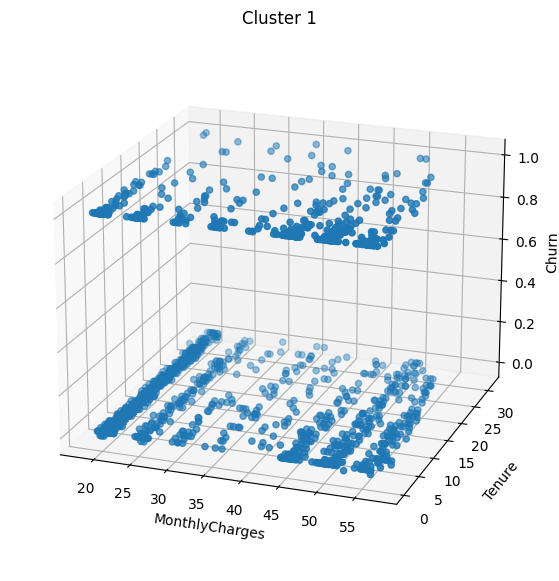

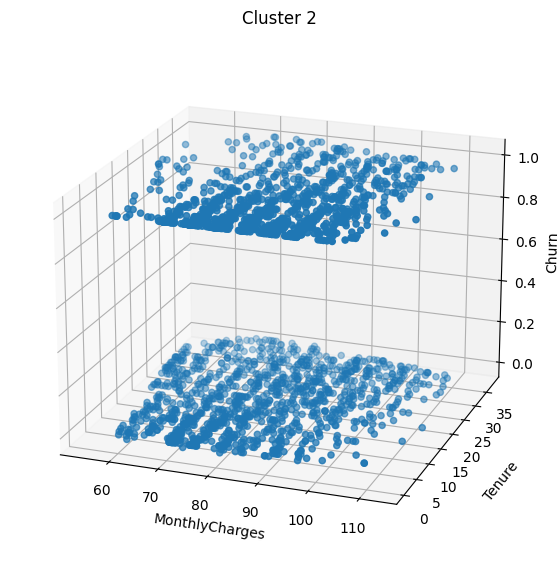

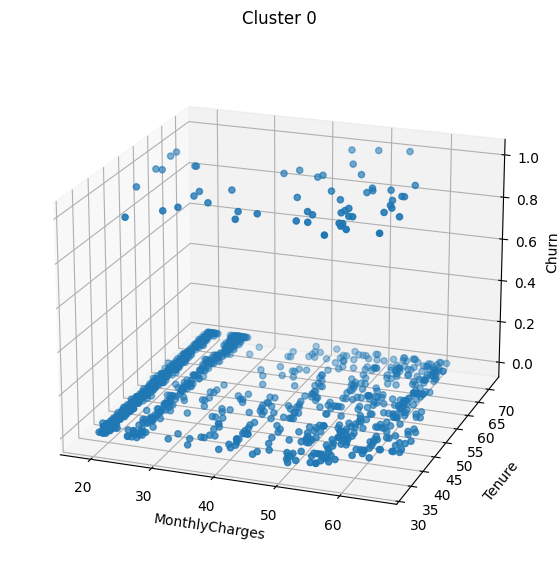

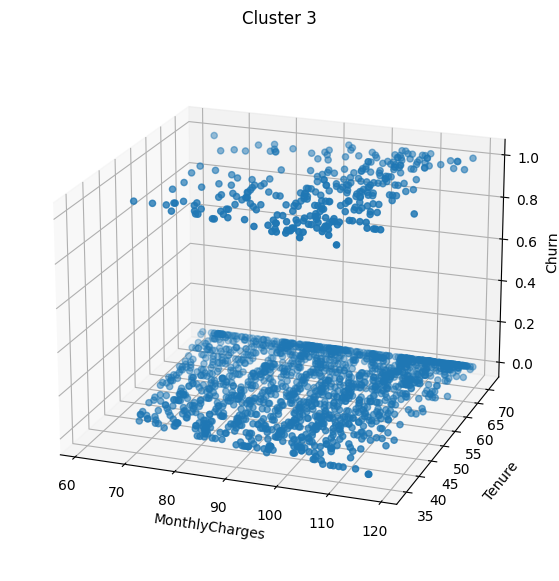

In [112]:
unique_clusters = records['Cluster'].unique()

# Iterate over each unique cluster to create a 3D plot
for cluster in unique_clusters:
    fig = plt.figure(figsize=(12, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Filter data to include only the current cluster
    cluster_data = records[records['Cluster'] == cluster]

    # Create 3D scatter plot
    ax.scatter(cluster_data['MonthlyCharges'], cluster_data['tenure'], cluster_data['Churn'])

    # Adjusting the viewing angle for better visibility
    ax.view_init(elev=20, azim=-70)  # Modify these values as needed

    # Adding title and labels
    ax.set_title(f'Cluster {cluster}')
    ax.set_xlabel('MonthlyCharges')
    ax.set_ylabel('Tenure', labelpad=10)
    ax.set_zlabel('Churn')

    plt.show()

tenure :

          count       mean        std   min   25%   50%   75%   max
Cluster                                                            
0        1156.0  54.065744  12.209251  32.0  43.0  54.0  66.0  72.0
1        1710.0  10.303509   9.116548   0.0   2.0   8.0  17.0  32.0
2        2245.0  15.068151  11.165354   0.0   4.0  13.0  25.0  38.0
3        1932.0  59.028468  10.953870  34.0  50.0  61.0  70.0  72.0




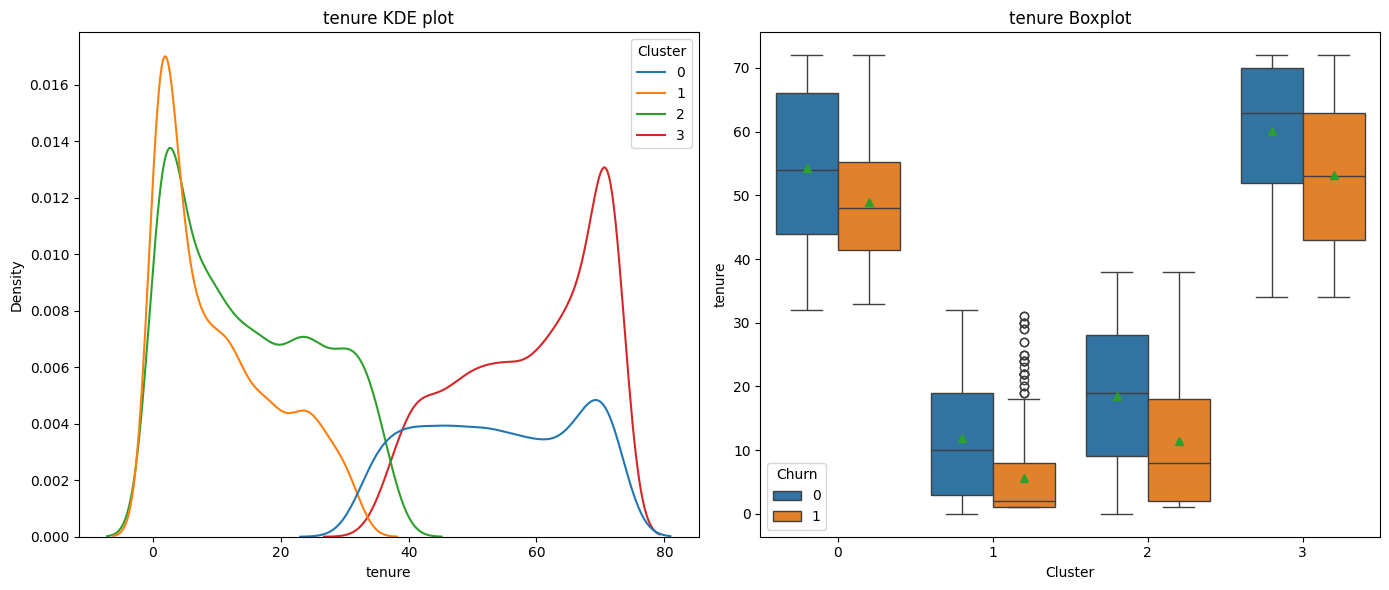

MonthlyCharges :

          count       mean        std    min    25%     50%     75%     max
Cluster                                                                    
0        1156.0  34.073270  15.588131  18.40  20.20  25.150   50.25   65.40
1        1710.0  32.182368  13.537866  18.25  20.05  25.075   45.65   57.55
2        2245.0  81.162339  12.650657  54.20  71.00  80.200   90.50  112.95
3        1932.0  92.901967  14.128039  61.20  81.40  94.550  104.80  118.75




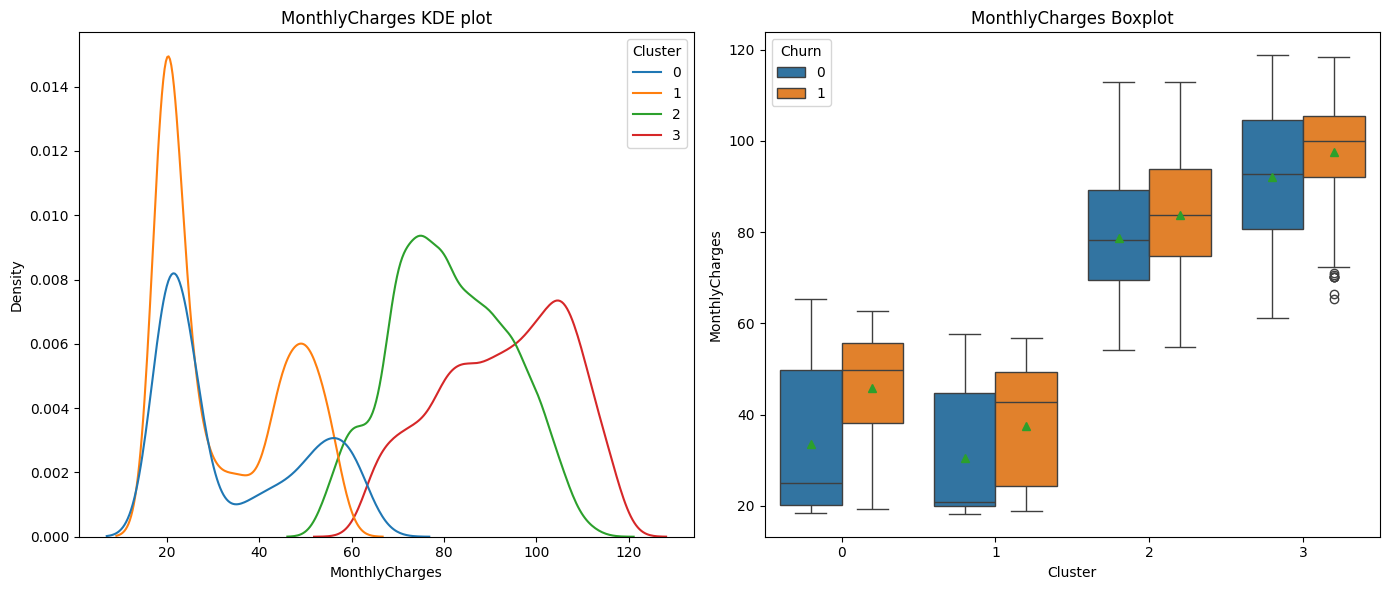

TotalCharges :

          count         mean          std     min        25%       50%  \
Cluster                                                                  
0        1156.0  1832.425173   926.068939   579.4  1108.6500  1539.175   
1        1710.0   326.087193   328.562910    18.8    56.2750   225.025   
2        2245.0  1237.157405   955.170701    59.2   356.6500  1077.050   
3        1932.0  5495.978235  1389.865239  2727.8  4377.7125  5431.650   

               75%      max  
Cluster                      
0        2435.9000  4549.05  
1         474.8000  1580.10  
2        1956.4000  3694.70  
3        6547.9375  8684.80  




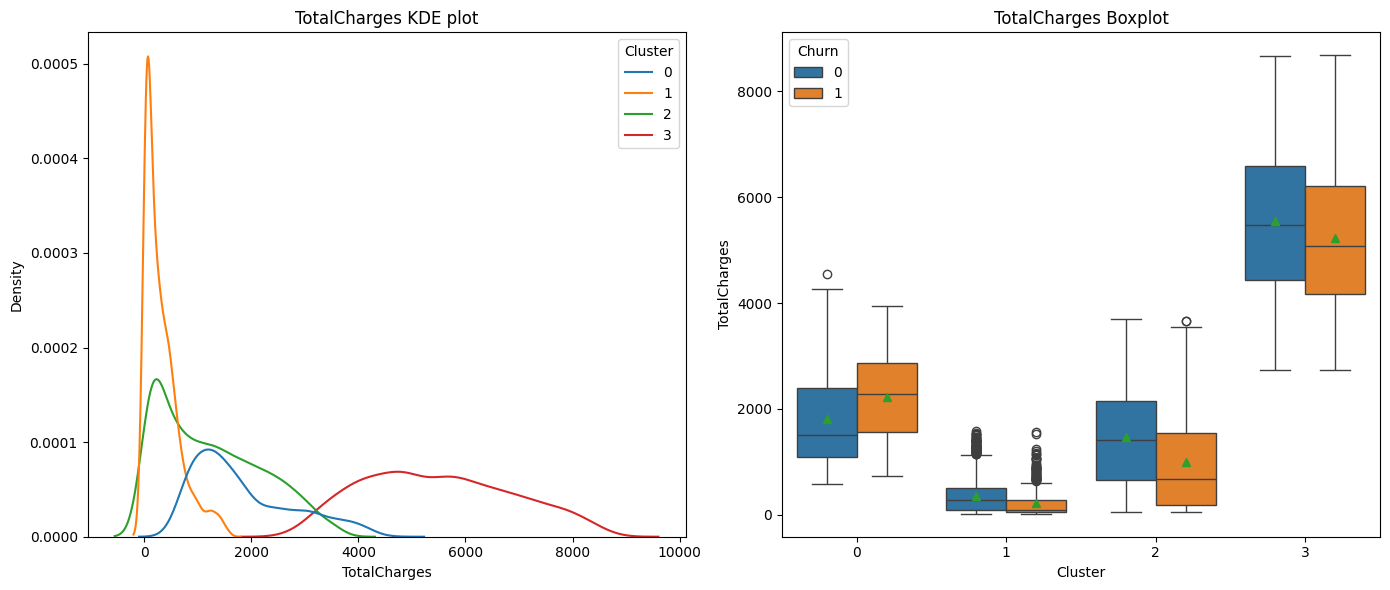

In [113]:
nums=['tenure','MonthlyCharges', 'TotalCharges']
for i in nums:
  print(i, ':\n')
  print(records.groupby('Cluster')[i].describe())
  print('\n')

  # Create subplots
  fig, axes = plt.subplots(1, 2, figsize=(14, 6))

  # Plot KDE on the first subplot
  sns.kdeplot(data=records, x=i, hue='Cluster', palette='tab10', ax=axes[0])
  axes[0].set_title(f'{i} KDE plot')

  # Plot Boxplot on the second subplot
  sns.boxplot(data=records, x='Cluster', y=i, hue='Churn', showmeans=True, ax=axes[1])
  axes[1].set_title(f'{i} Boxplot')

  plt.tight_layout()  # Adjust layout so plots do not overlap
  plt.show()

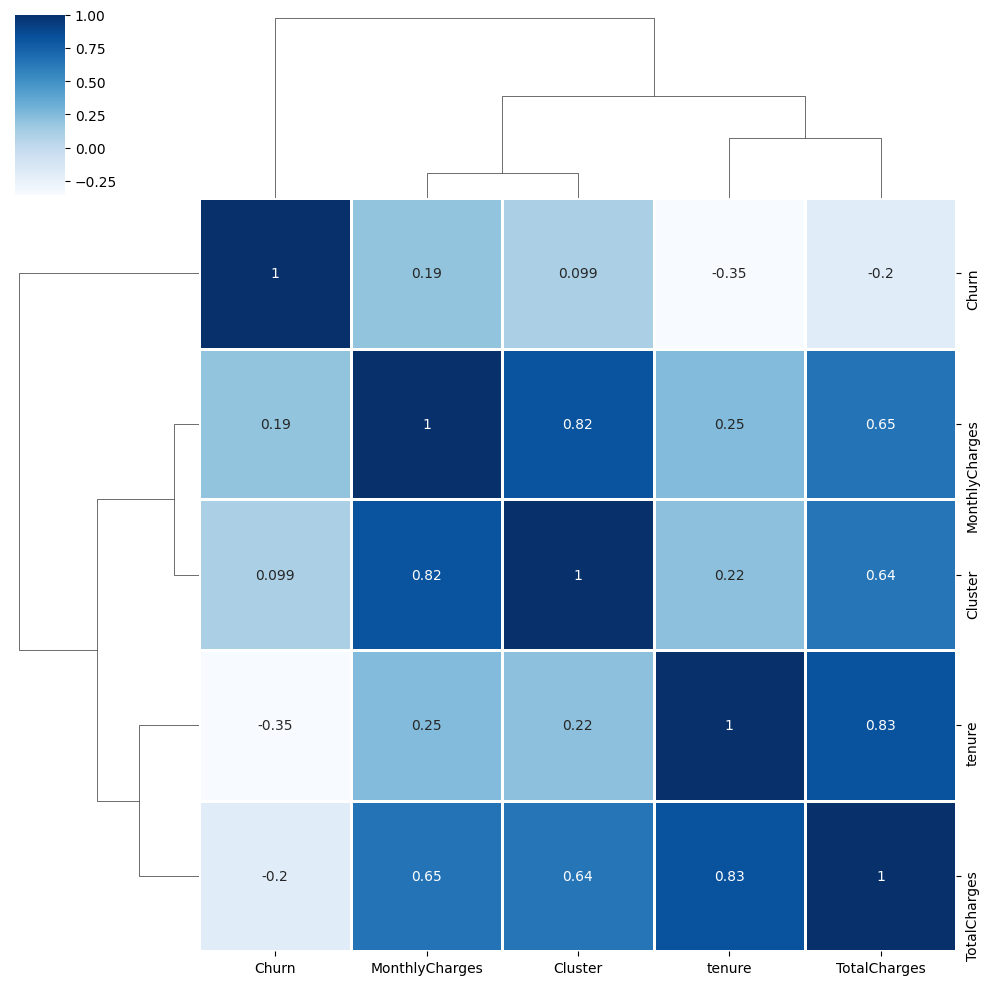

In [114]:
sns.clustermap(data=records[['tenure','MonthlyCharges', 'TotalCharges','Cluster', 'Churn']].corr(), cmap="Blues", linewidths=.9, annot=True)

*Examine Cluster vs each of other variables*

In [115]:
cats_withCluster=['Cluster', 'gender_Male','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

In [116]:
from sklearn.metrics import mutual_info_score

In [117]:
mi_scores = {}

# Loop through each categorical feature and calculate MI score
for cat in cats_withCluster:
    mi_scores[cat] = mutual_info_score(records[cat], records['Churn'])

# Sort features by their MI scores
sorted_scores = sorted(mi_scores.items(), key=lambda x: x[1], reverse=True)

# Display the scores
for feature, score in sorted_scores:
    print(f"{feature}: {score:.3f}")


Contract: 0.098
Cluster: 0.072
OnlineSecurity: 0.065
TechSupport: 0.063
InternetService: 0.056
OnlineBackup: 0.047
PaymentMethod: 0.045
DeviceProtection: 0.044
StreamingMovies: 0.032
StreamingTV: 0.032
PaperlessBilling: 0.019
Dependents: 0.014
Partner: 0.011
SeniorCitizen: 0.011
MultipleLines: 0.001
PhoneService: 0.000
gender_Male: 0.000


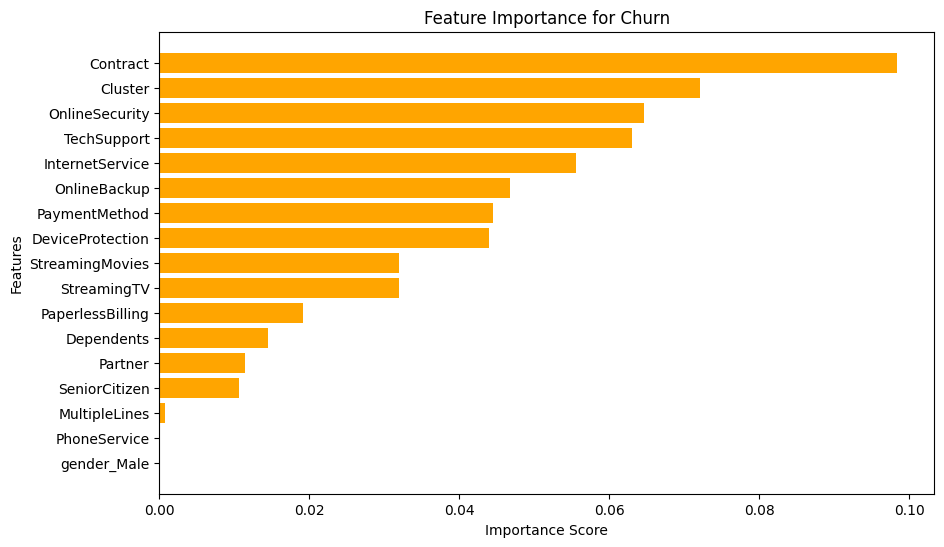

In [118]:
features, scores = zip(*sorted_scores)
plt.figure(figsize=(10, 6))
plt.barh(features, scores, color='orange')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Churn')
plt.gca().invert_yaxis()
plt.show()

Churn :

Cluster  Churn
0        0        1100
         1          56
1        0        1288
         1         422
2        0        1153
         1        1092
3        0        1633
         1         299
Name: count, dtype: int64




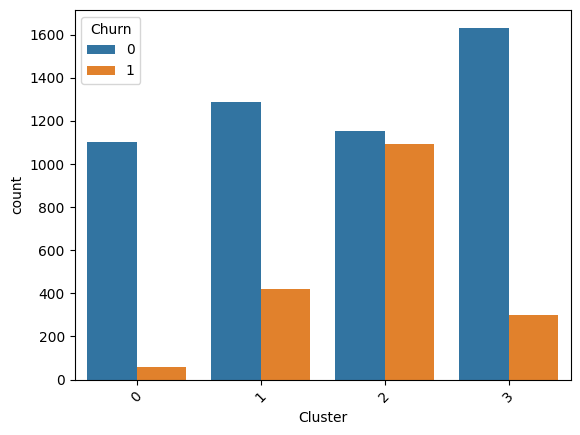

gender_Male :

Cluster  gender_Male
0        True            580
         False           576
1        True            892
         False           818
2        False          1132
         True           1113
3        True            970
         False           962
Name: count, dtype: int64




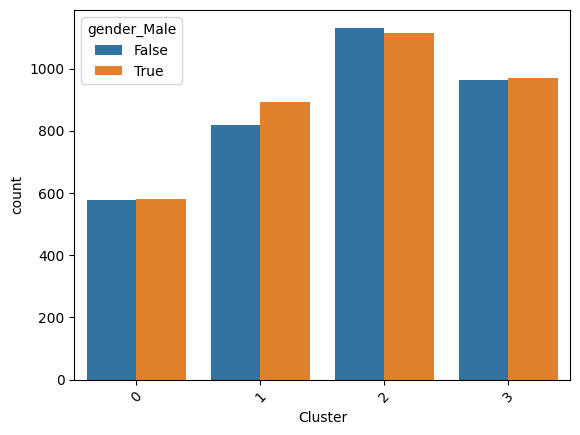

SeniorCitizen :

Cluster  SeniorCitizen
0        0                1067
         1                  89
1        0                1587
         1                 123
2        0                1725
         1                 520
3        0                1522
         1                 410
Name: count, dtype: int64




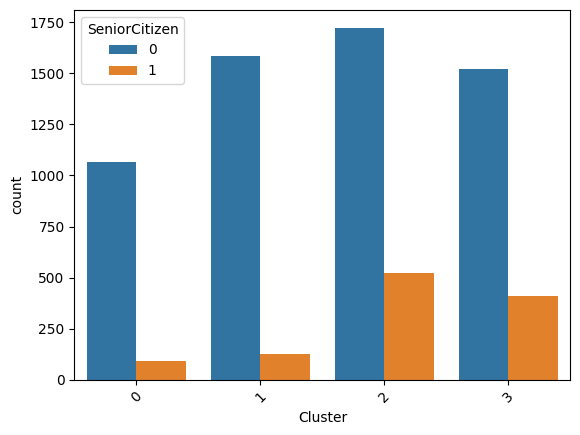

Partner :

Cluster  Partner
0        Yes         725
         No          431
1        No         1170
         Yes         540
2        No         1430
         Yes         815
3        Yes        1322
         No          610
Name: count, dtype: int64




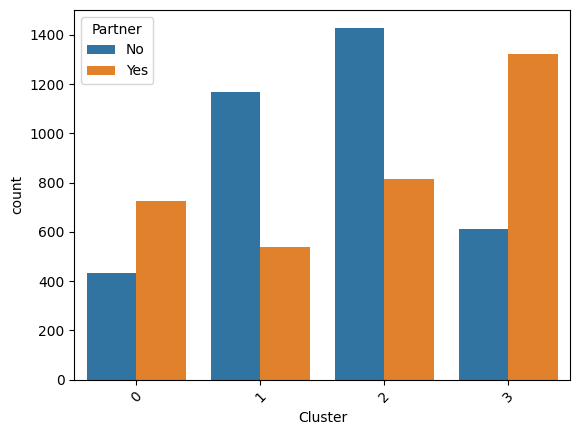

Dependents :

Cluster  Dependents
0        No             650
         Yes            506
1        No            1195
         Yes            515
2        No            1800
         Yes            445
3        No            1288
         Yes            644
Name: count, dtype: int64




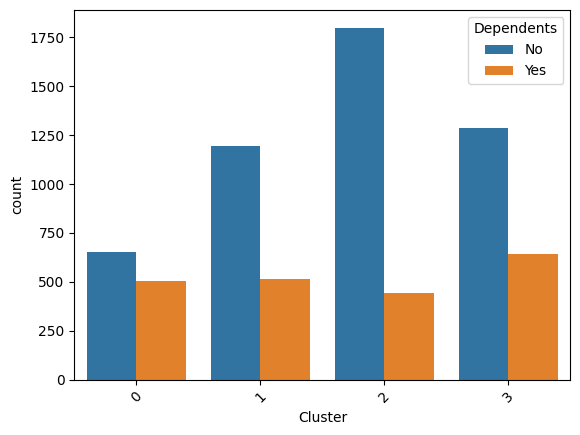

PhoneService :

Cluster  PhoneService
0        Yes              868
         No               288
1        Yes             1359
         No               351
2        Yes             2228
         No                17
3        Yes             1906
         No                26
Name: count, dtype: int64




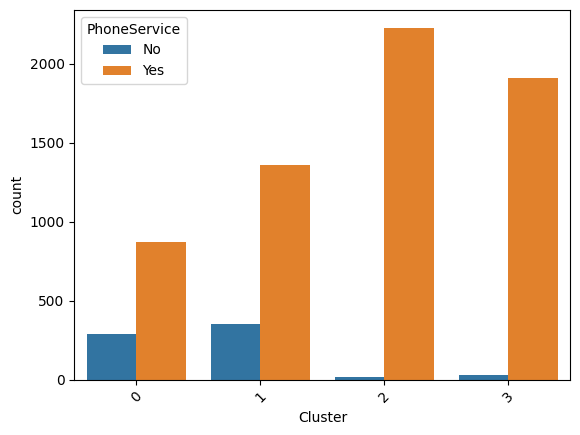

MultipleLines :

Cluster  MultipleLines   
0        No                   569
         Yes                  299
         No phone service     288
1        No                  1199
         No phone service     351
         Yes                  160
2        No                  1176
         Yes                 1052
         No phone service      17
3        Yes                 1460
         No                   446
         No phone service      26
Name: count, dtype: int64




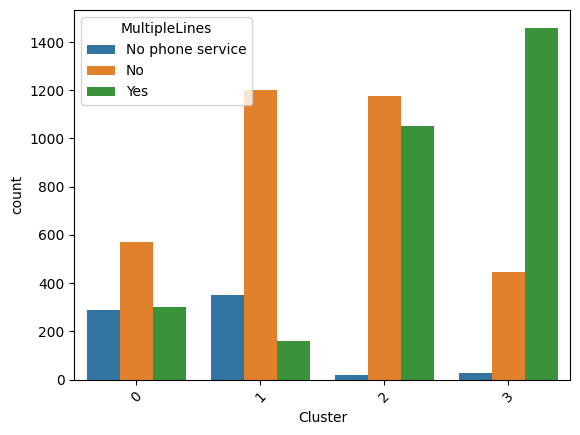

InternetService :

Cluster  InternetService
0        No                  664
         DSL                 492
1        No                  862
         DSL                 848
2        Fiber optic        1747
         DSL                 498
3        Fiber optic        1349
         DSL                 583
Name: count, dtype: int64




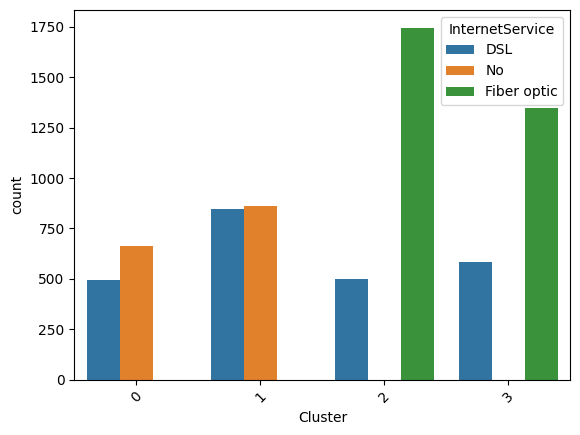

OnlineSecurity :

Cluster  OnlineSecurity     
0        No internet service     664
         Yes                     262
         No                      230
1        No internet service     862
         No                      644
         Yes                     204
2        No                     1737
         Yes                     508
3        Yes                    1045
         No                      887
Name: count, dtype: int64




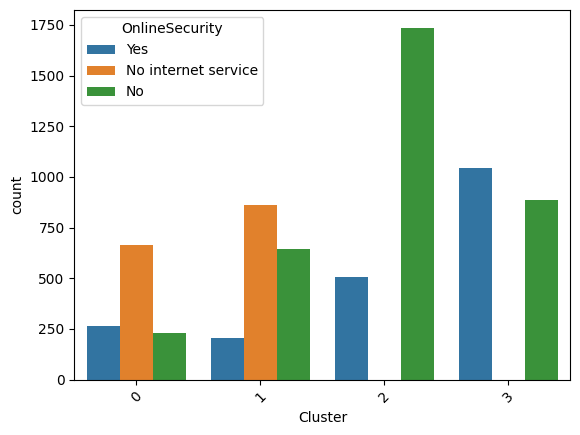

OnlineBackup :

Cluster  OnlineBackup       
0        No internet service     664
         Yes                     250
         No                      242
1        No internet service     862
         No                      666
         Yes                     182
2        No                     1563
         Yes                     682
3        Yes                    1315
         No                      617
Name: count, dtype: int64




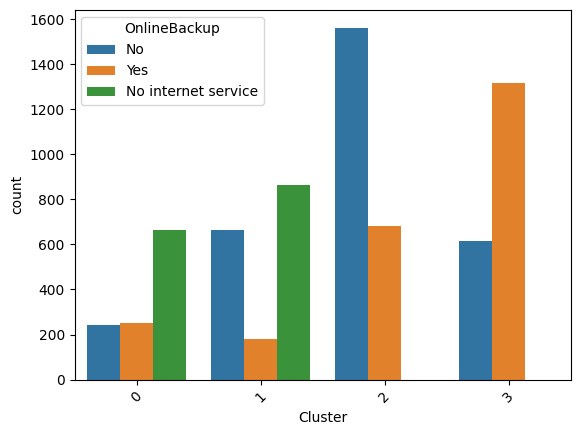

DeviceProtection :

Cluster  DeviceProtection   
0        No internet service     664
         No                      258
         Yes                     234
1        No internet service     862
         No                      698
         Yes                     150
2        No                     1534
         Yes                     711
3        Yes                    1327
         No                      605
Name: count, dtype: int64




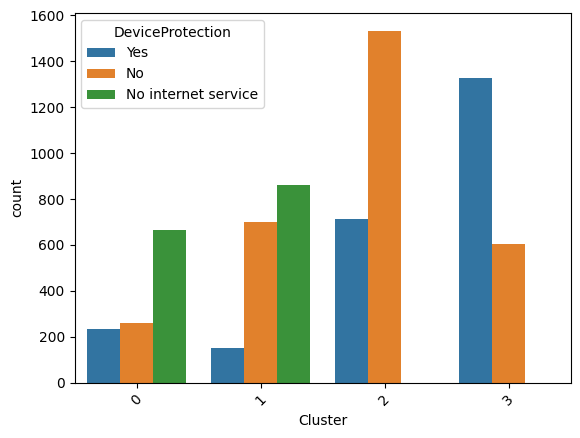

TechSupport :

Cluster  TechSupport        
0        No internet service     664
         No                      261
         Yes                     231
1        No internet service     862
         No                      662
         Yes                     186
2        No                     1696
         Yes                     549
3        Yes                    1078
         No                      854
Name: count, dtype: int64




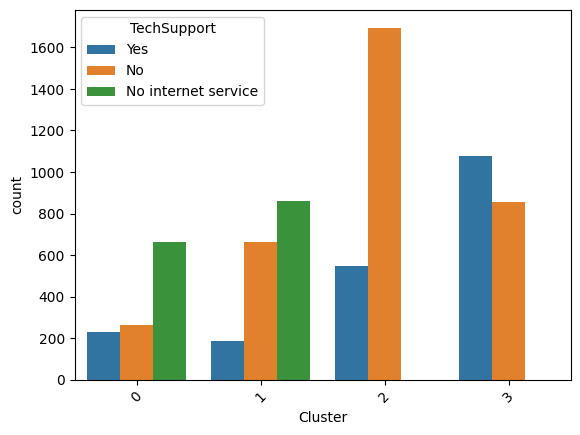

StreamingTV :

Cluster  StreamingTV        
0        No internet service     664
         No                      323
         Yes                     169
1        No internet service     862
         No                      737
         Yes                     111
2        No                     1228
         Yes                    1017
3        Yes                    1410
         No                      522
Name: count, dtype: int64




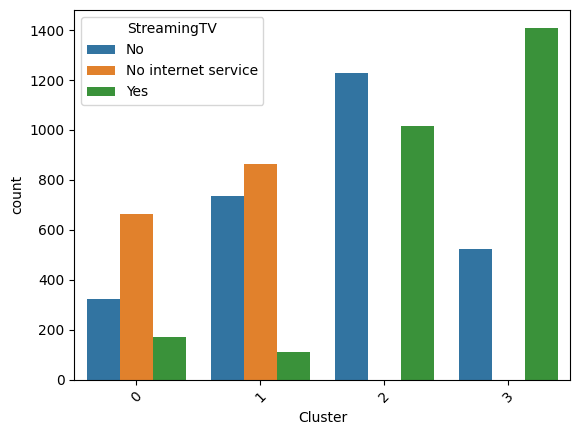

StreamingMovies :

Cluster  StreamingMovies    
0        No internet service     664
         No                      320
         Yes                     172
1        No internet service     862
         No                      727
         Yes                     121
2        No                     1223
         Yes                    1022
3        Yes                    1417
         No                      515
Name: count, dtype: int64




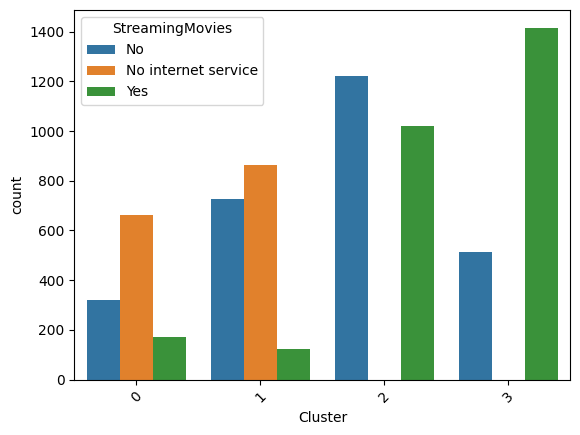

Contract :

Cluster  Contract      
0        Two year           649
         One year           331
         Month-to-month     176
1        Month-to-month    1247
         One year           288
         Two year           175
2        Month-to-month    1945
         One year           253
         Two year            47
3        Two year           824
         One year           601
         Month-to-month     507
Name: count, dtype: int64




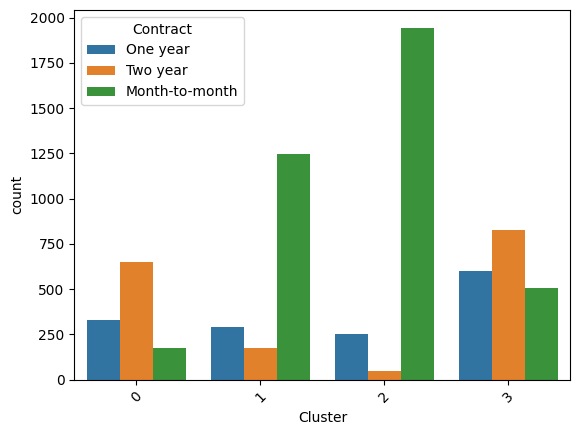

PaperlessBilling :

Cluster  PaperlessBilling
0        No                   694
         Yes                  462
1        No                   992
         Yes                  718
2        Yes                 1631
         No                   614
3        Yes                 1360
         No                   572
Name: count, dtype: int64




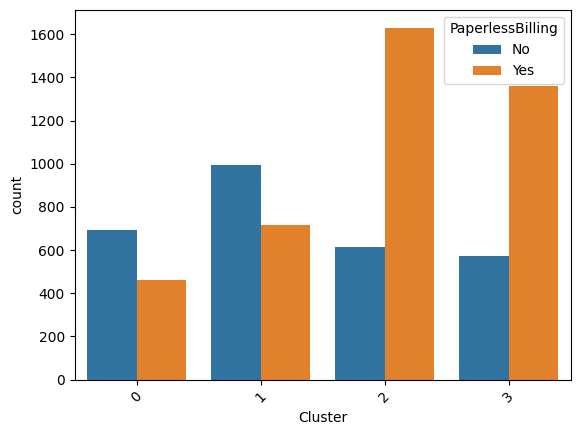

PaymentMethod :

Cluster  PaymentMethod            
0        Bank transfer (automatic)     372
         Credit card (automatic)       338
         Mailed check                  283
         Electronic check              163
1        Mailed check                  853
         Electronic check              398
         Credit card (automatic)       255
         Bank transfer (automatic)     204
2        Electronic check             1230
         Bank transfer (automatic)     361
         Mailed check                  334
         Credit card (automatic)       320
3        Credit card (automatic)       609
         Bank transfer (automatic)     607
         Electronic check              574
         Mailed check                  142
Name: count, dtype: int64




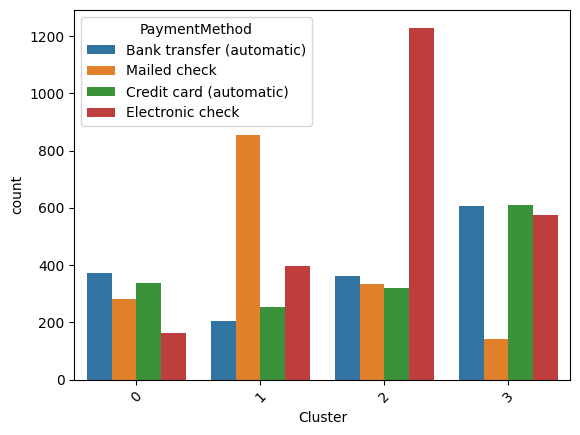

In [119]:
cats=['Churn','gender_Male','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
##Write code to explore relationships
for i in cats:
   print(i, ':\n')
   print(records.groupby('Cluster')[i].value_counts())
   print('\n')
   sns.countplot(hue=records[i], x=records['Cluster'], palette='tab10')
   # Rotate labels on the x-axis
   plt.xticks(rotation=45)
   plt.show()



---



---



# **2. Case Two: Insurance Cost Estimation**

**KNN regression**

https://www.kaggle.com/datasets/mirichoi0218/insurance

**Context**
Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

Content - Columns

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

**Inspiration**
Can you identify similar groups of policy holders?

## **2.1 Load and inspect data, perform EDA and data preparation**

In [120]:
url='https://raw.githubusercontent.com/VanLan0/MIS710/main/insurance.csv'


In [121]:
#loading data
records = pd.read_csv(url)

records.head()

age     sex     bmi  dependants smoker     region      charges
0   19  female  27.900           0    yes  southwest  16884.92400
1   18    male  33.770           1     no  southeast   1725.55230
2   28    male  33.000           3     no  southeast   4449.46200
3   33    male  22.705           0     no  northwest  21984.47061
4   32    male  28.880           0     no  northwest   3866.85520

### **Inspecting and cleansing data**
* Inspect columns
* Drop irrelevant columns
* Correct data types as needed
* Detecting and handling missing data


In [122]:
##Write code to inspect data size and types
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   sex         1338 non-null   object 
 2   bmi         1338 non-null   float64
 3   dependants  1338 non-null   int64  
 4   smoker      1338 non-null   object 
 5   region      1338 non-null   object 
 6   charges     1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [123]:
##Write code to inspect missing data, e.g. isnull().sum()
print(records.isnull().sum())

age           0
sex           0
bmi           0
dependants    0
smoker        0
region        0
charges       0
dtype: int64


### **EDA**


1. Univariate analysis
2. Bivariate analysis
3. Multivariate analysis

Note:
> Numeric variables
*   Summarise data through mean, median (Q2), Q1, Q3, range, Interquartile Range (IQR), outliers, standard deviation, and variance.
*   Explore distributions using histograms, boxplots, kernel density estimates, and QQ plots of continuous variables.

> Categorical variables
*   Summarise data through mode(s), counts and percentages of unique categories.
*   Explore bar charts, pie charts, or frequency tables of categorical variables.

> Explore relationships between two or more variables  
*   Compare two continuous variables using their descriptive statistics (such as means, medians, and Inter Quartile Range (IQR), range) and explore the relationship between them using scatterplots and correlation coefficients.
*   Explore the relationship between two categorical variables using a two-way contingency table (crosstab), clustered bar charts, stacked bar charts or a mosaic plot.
*   Explore the relationship between one numeric and one categorical variable, through using and grouped boxplots, violin plots, and histograms.
*   Explore correlations among multiple (selected) numeric variables using heatmaps of the correlation matrix.



**We do not treat charges as target**

**Univariate analysis**

In [124]:
records.describe()

age          bmi   dependants       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [125]:
nums=['age', 'bmi','dependants','charges']

age :

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64




<ipython-input-126-c1c6507b5efd>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=records, x=i, bins=50, kde=True, palette='tab10')


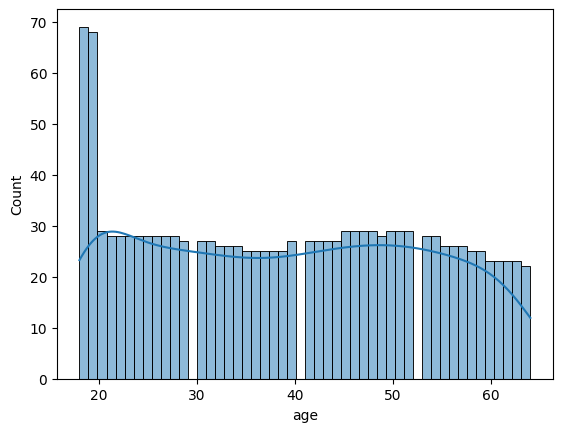

bmi :

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64




<ipython-input-126-c1c6507b5efd>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=records, x=i, bins=50, kde=True, palette='tab10')


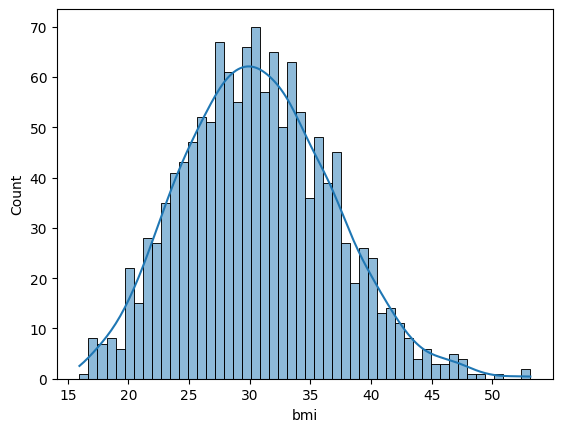

dependants :

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: dependants, dtype: float64




<ipython-input-126-c1c6507b5efd>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=records, x=i, bins=50, kde=True, palette='tab10')


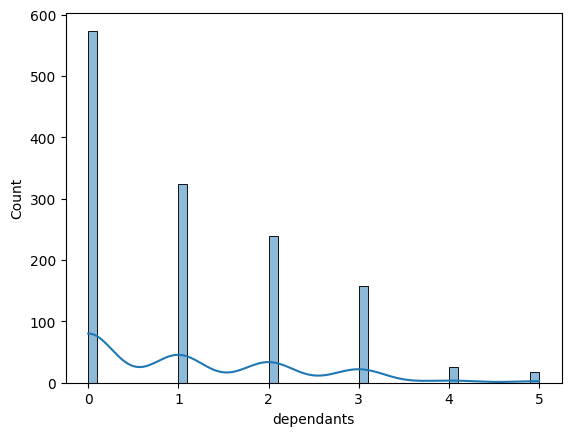

charges :

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64




<ipython-input-126-c1c6507b5efd>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=records, x=i, bins=50, kde=True, palette='tab10')


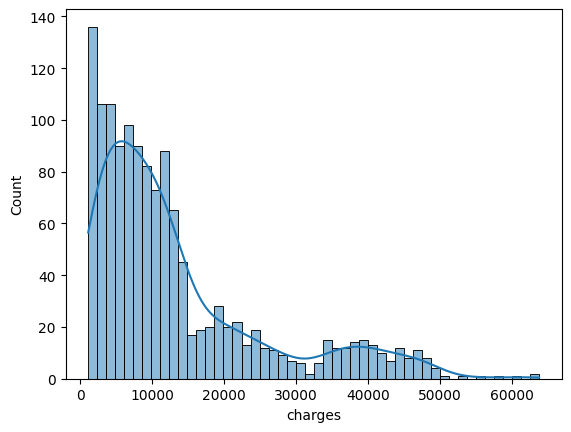

In [126]:
##Write code to display histplot. Hint: reuse the for loop above for sns.kdeplot(data=records, x=i)
for i in nums:
   print(i, ':\n')
   print(records[i].describe())
   print('\n')
   sns.histplot(data=records, x=i, bins=50, kde=True, palette='tab10')
   plt.show()

sex :

sex
male      676
female    662
Name: count, dtype: int64 



<ipython-input-127-117a0e7b8286>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=records, x=i, palette='tab10')


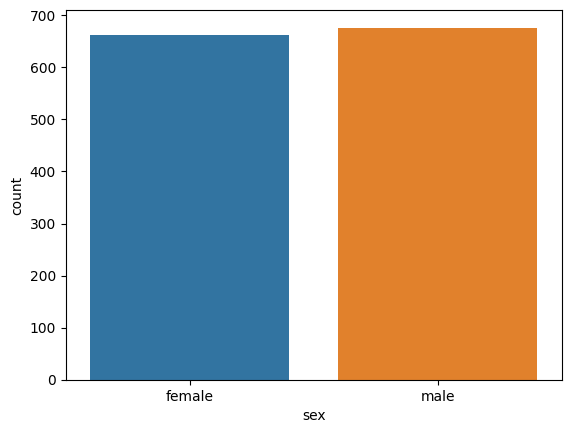

smoker :

smoker
no     1064
yes     274
Name: count, dtype: int64 



<ipython-input-127-117a0e7b8286>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=records, x=i, palette='tab10')


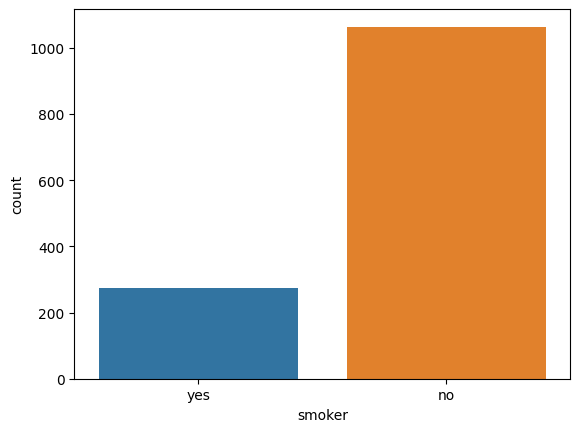

region :

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64 



<ipython-input-127-117a0e7b8286>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=records, x=i, palette='tab10')


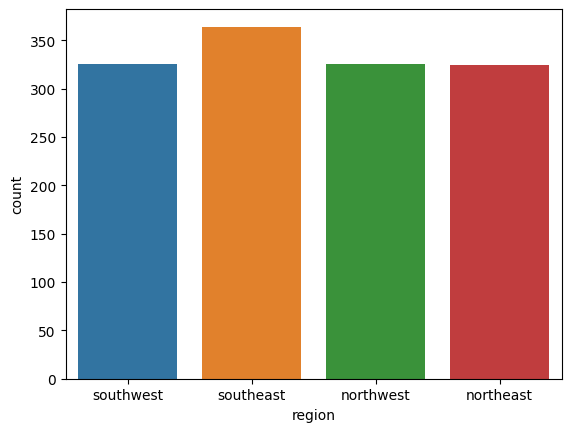

dependants :

dependants
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64 



<ipython-input-127-117a0e7b8286>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=records, x=i, palette='tab10')


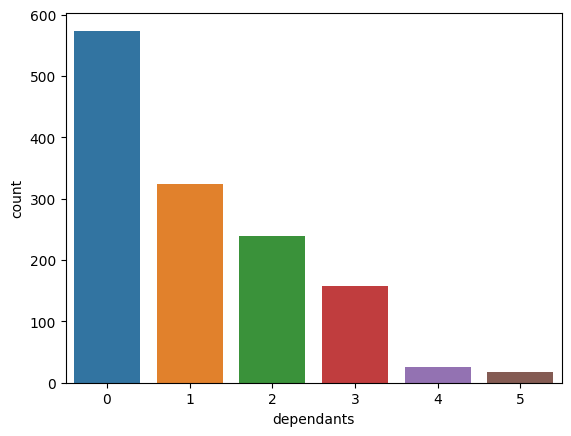

In [127]:
cats=['sex','smoker', 'region', 'dependants']
for i in cats:
   print(i, ':\n')
   print(records[i].value_counts(),'\n')
   sns.countplot(data=records, x=i, palette='tab10')
   plt.show()

**Bivariabe analysis**

Between numeric variables

<ipython-input-128-830235f97ca2>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=records, x='age', y='charges', palette='tab10')


<Axes: xlabel='age', ylabel='charges'>

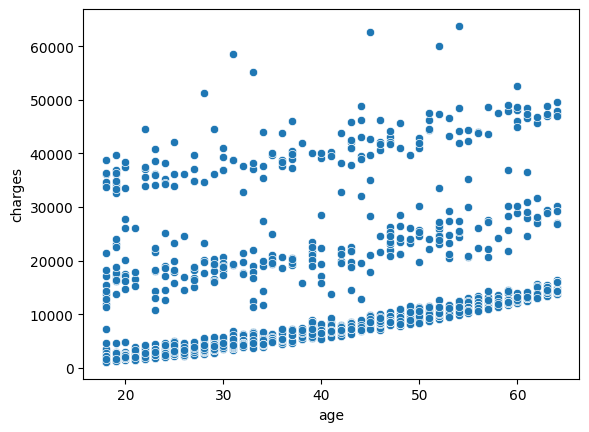

In [128]:
sns.scatterplot(data=records, x='age', y='charges', palette='tab10')

<Axes: xlabel='bmi', ylabel='charges'>

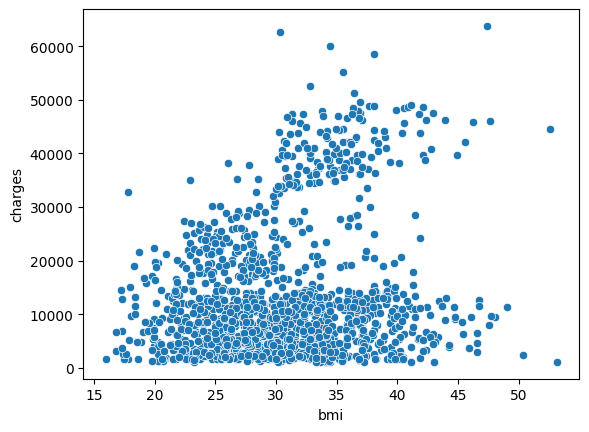

In [129]:
sns.scatterplot(data=records, x='bmi', y='charges')

Between one numeric and one categorical variables

<Axes: xlabel='charges', ylabel='Density'>

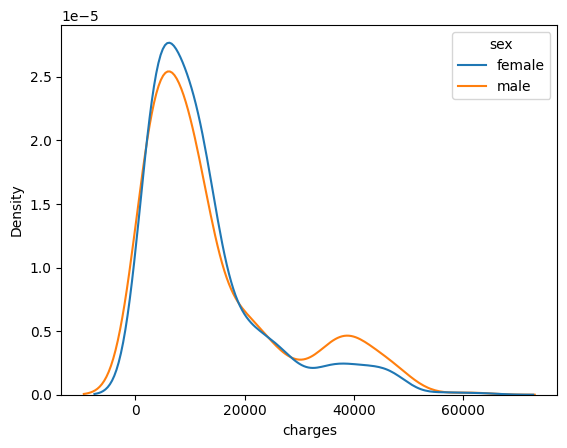

In [130]:
sns.kdeplot(data=records, x='charges', hue='sex', palette='tab10')

Note the relationship between smoker and charges

sex :

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object




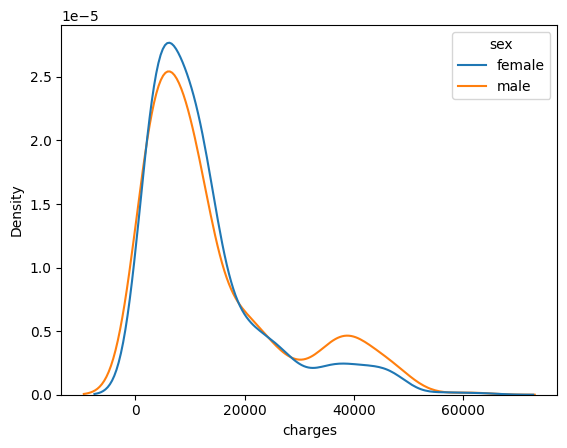

smoker :

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object




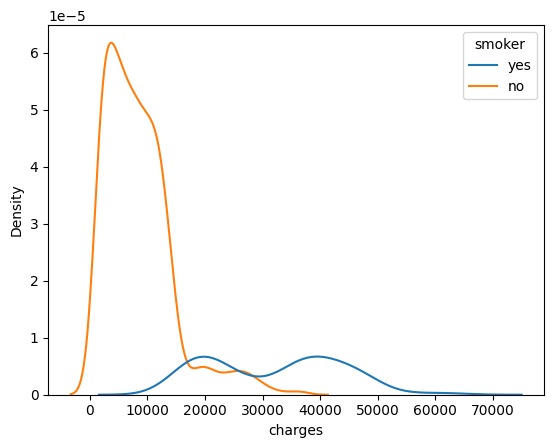

region :

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object




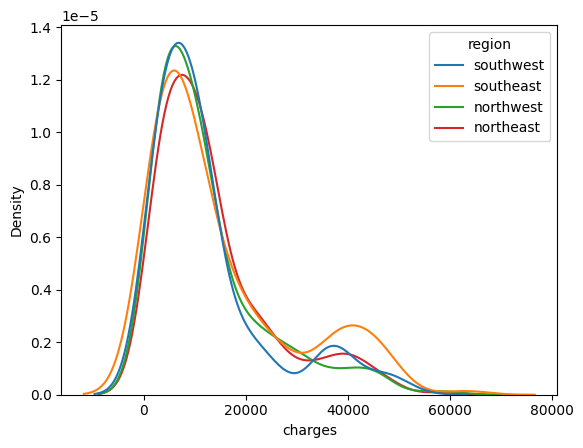

dependants :

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: dependants, dtype: float64




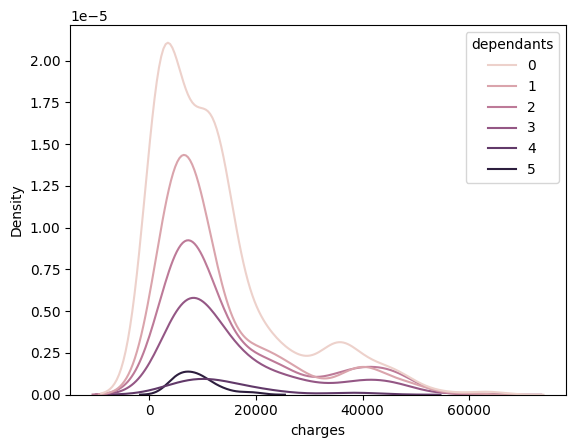

In [131]:
##Write code to display kdeplot in a loop. Hint: reuse the for loop above for sns.kdeplot(data=records, x=i)
for i in cats:
   print(i, ':\n')
   print(records[i].describe())
   print('\n')
   sns.kdeplot(data=records, x='charges', hue=i)
   plt.show()

<Axes: xlabel='charges', ylabel='sex'>

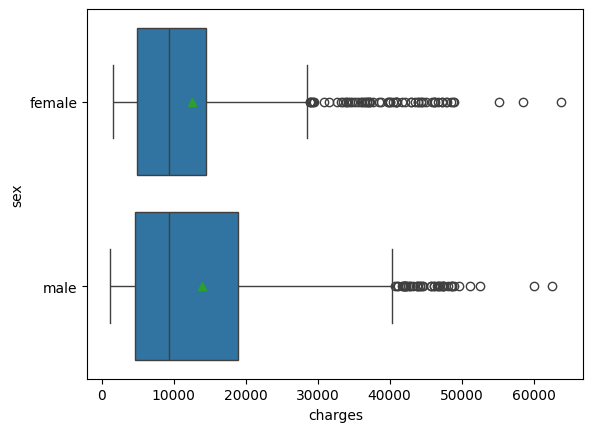

In [132]:
#boxplots of charges by sex
sns.boxplot(data=records, x='charges', y='sex', showmeans=True)

<Axes: xlabel='charges', ylabel='smoker'>

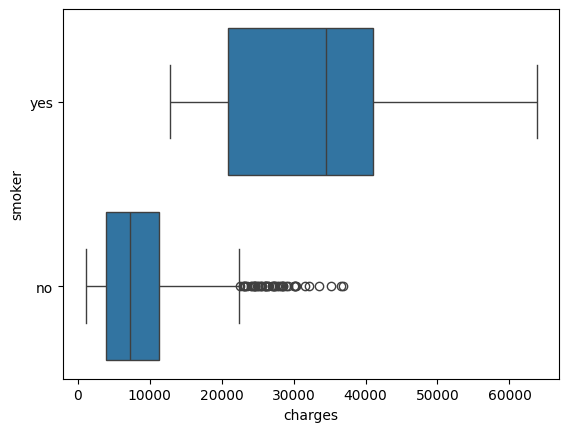

In [133]:
##Write code to display boxplots of charges by smoker
sns.boxplot(data=records, x='charges', y='smoker')

<Axes: xlabel='charges', ylabel='region'>

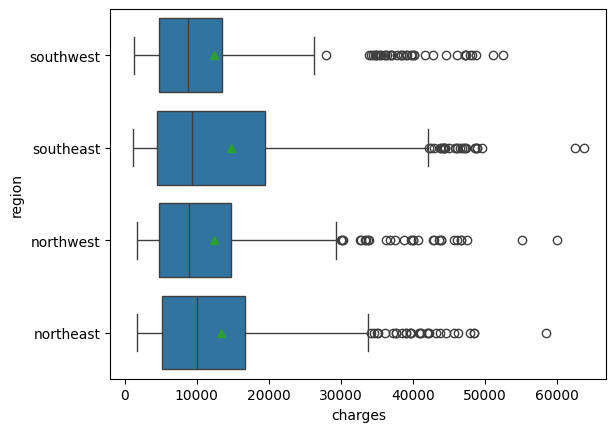

In [134]:
##Write code to display boxplots of charges by region
sns.boxplot(data=records, x='charges', y='region', showmeans=True)

<Axes: xlabel='dependants', ylabel='charges'>

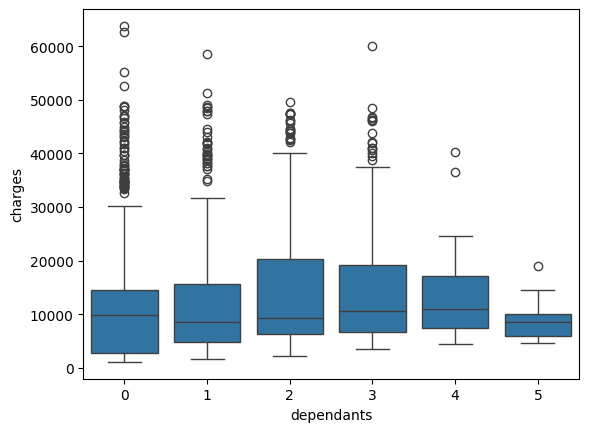

In [135]:
##Write code to display boxplots of charges by dependants
sns.boxplot(data=records, y='charges', x='dependants')

<Axes: xlabel='age', ylabel='smoker'>

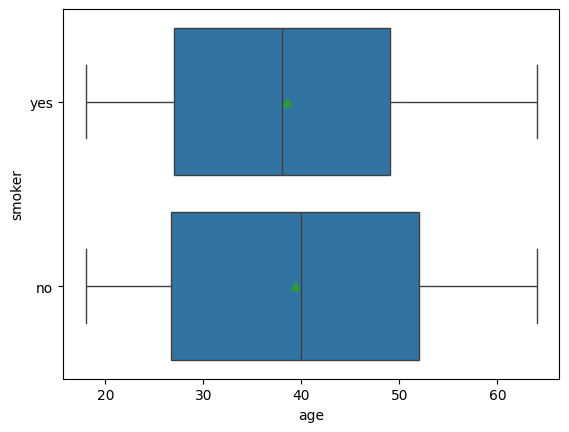

In [136]:
sns.boxplot(data=records, x='age', y='smoker', showmeans=True)

<Axes: xlabel='sex', ylabel='bmi'>

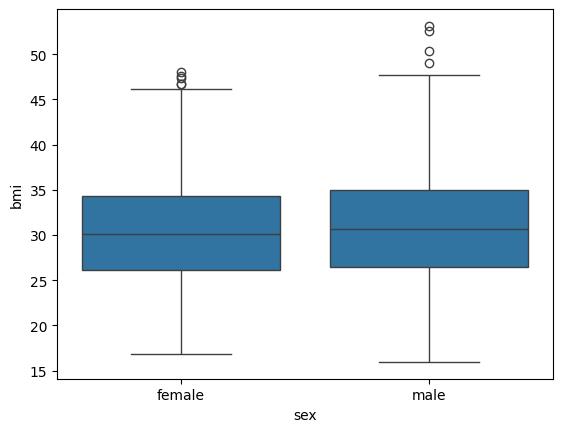

In [137]:
sns.boxplot(data=records, y='bmi', x='sex')

**Multi-variate analysis**

**You can visualise more than 2 dimensions**

<Axes: xlabel='age', ylabel='charges'>

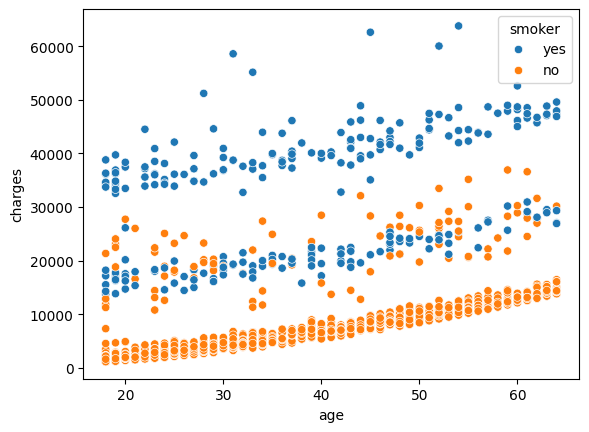

In [138]:
sns.scatterplot(data=records, x='age', y='charges', hue='smoker')

<Axes: xlabel='age', ylabel='charges'>

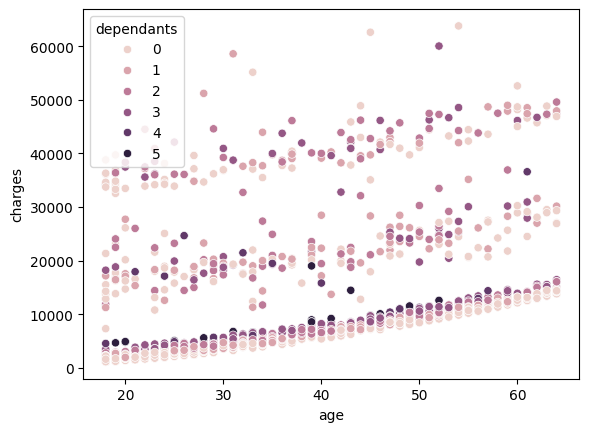

In [139]:
sns.scatterplot(data=records, x='age', y='charges', hue='dependants')

<Axes: xlabel='charges', ylabel='smoker'>

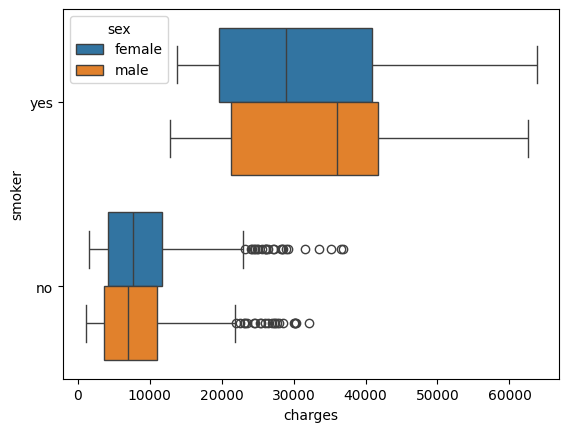

In [140]:
sns.boxplot(data=records, x='charges', y='smoker', hue='sex')

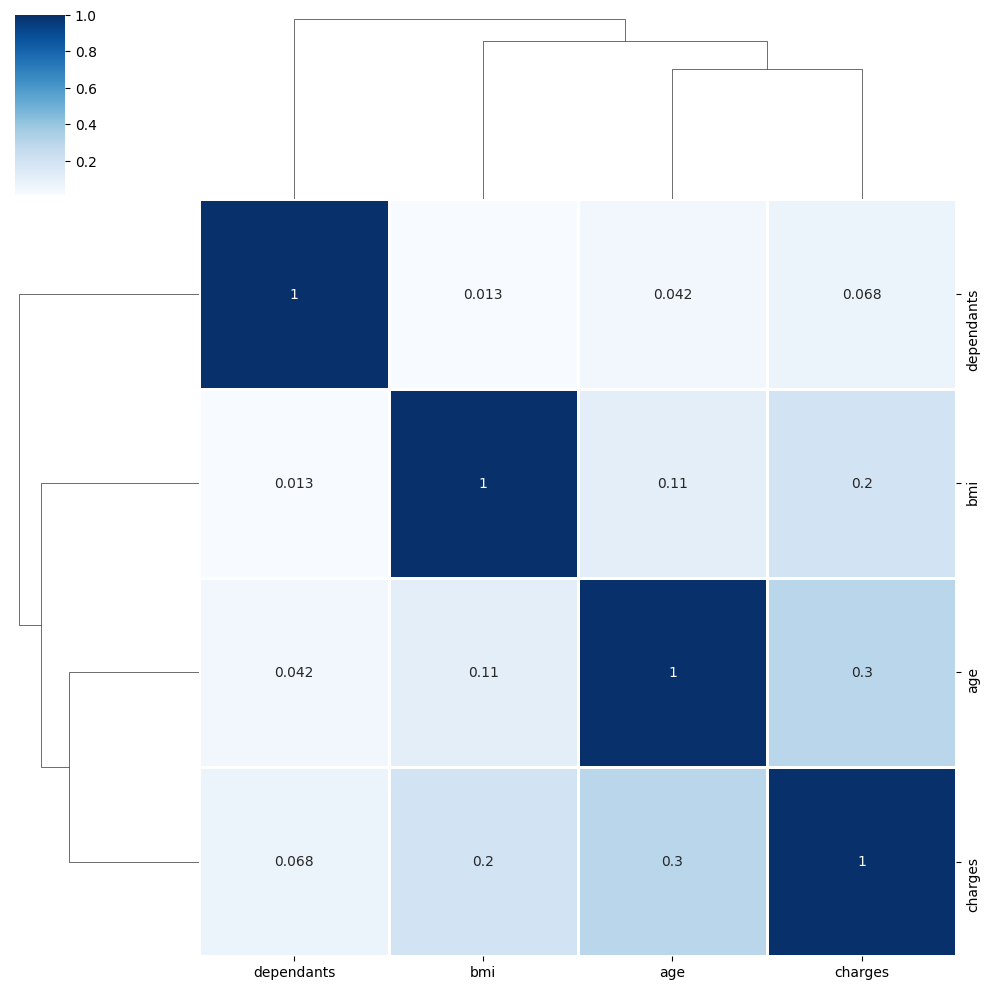

In [141]:
#visualise clustermap
sns.clustermap(data=records[nums].corr(), cmap="Blues", linewidths=.9, annot=True)

Notable contributing factors: smoker, age and bmi

### **Data preparation**

* Data conversion
* Feature selection: X
* Scale data

In [142]:
records.head()

age     sex     bmi  dependants smoker     region      charges
0   19  female  27.900           0    yes  southwest  16884.92400
1   18    male  33.770           1     no  southeast   1725.55230
2   28    male  33.000           3     no  southeast   4449.46200
3   33    male  22.705           0     no  northwest  21984.47061
4   32    male  28.880           0     no  northwest   3866.85520

In [143]:
print(records.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   sex         1338 non-null   object 
 2   bmi         1338 non-null   float64
 3   dependants  1338 non-null   int64  
 4   smoker      1338 non-null   object 
 5   region      1338 non-null   object 
 6   charges     1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [144]:
#convert ordinal target data to numerical
def coding_smoking(x):
    if x=='yes': return 1
    if x=='no': return 0

records['smoker'] = records['smoker'].apply(coding_smoking)

In [145]:
#convert ordinal target data to numerical
def coding_sex(x):
    if x=='female': return 0
    if x=='male': return 1

records['sex_N'] = records['sex'].apply(coding_sex)

In [146]:
records.describe()

age          bmi   dependants       smoker       charges  \
count  1338.000000  1338.000000  1338.000000  1338.000000   1338.000000   
mean     39.207025    30.663397     1.094918     0.204783  13270.422265   
std      14.049960     6.098187     1.205493     0.403694  12110.011237   
min      18.000000    15.960000     0.000000     0.000000   1121.873900   
25%      27.000000    26.296250     0.000000     0.000000   4740.287150   
50%      39.000000    30.400000     1.000000     0.000000   9382.033000   
75%      51.000000    34.693750     2.000000     0.000000  16639.912515   
max      64.000000    53.130000     5.000000     1.000000  63770.428010   

             sex_N  
count  1338.000000  
mean      0.505232  
std       0.500160  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

In [147]:
records

age     sex     bmi  dependants  smoker     region      charges  sex_N
0      19  female  27.900           0       1  southwest  16884.92400      0
1      18    male  33.770           1       0  southeast   1725.55230      1
2      28    male  33.000           3       0  southeast   4449.46200      1
3      33    male  22.705           0       0  northwest  21984.47061      1
4      32    male  28.880           0       0  northwest   3866.85520      1
...   ...     ...     ...         ...     ...        ...          ...    ...
1333   50    male  30.970           3       0  northwest  10600.54830      1
1334   18  female  31.920           0       0  northeast   2205.98080      0
1335   18  female  36.850           0       0  southeast   1629.83350      0
1336   21  female  25.800           0       0  southwest   2007.94500      0
1337   61  female  29.070           0       1  northwest  29141.36030      0

[1338 rows x 8 columns]

**Feature selection and target specification**

In [148]:
features=['smoker','age', 'sex_N','bmi','charges'] #Explore with your own feature selection
X=records[features]

**Spliting and scaling data**

In [149]:
from sklearn.preprocessing import MinMaxScaler

In [150]:
# Features to scale
features_to_scale = ['age', 'bmi','charges' ]

# Features to keep
features_to_keep = ['smoker', 'sex_N']

In [151]:
# Scale the features using Min-Max Scaling
scaler = MinMaxScaler()


In [152]:
# Fit and transform the features to scale
X_scaled_values = scaler.fit_transform(X[features_to_scale])

# Create DataFrames from the scaled values
X_scaled = pd.DataFrame(X_scaled_values, columns=features_to_scale)

# Concatenate the unscaled features back into the scaled DataFrames
X_scaled = pd.concat([X_scaled, X[features_to_keep].reset_index(drop=True)], axis=1)


In [153]:
X_scaled.describe()

age          bmi      charges       smoker        sex_N
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000
mean      0.461022     0.395572     0.193916     0.204783     0.505232
std       0.305434     0.164062     0.193301     0.403694     0.500160
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.195652     0.278080     0.057757     0.000000     0.000000
50%       0.456522     0.388485     0.131849     0.000000     1.000000
75%       0.717391     0.504002     0.247700     0.000000     1.000000
max       1.000000     1.000000     1.000000     1.000000     1.000000

Note in the above code we use the same scaler learned from X_train to transform the X_test. To ensure the range we can use scaler = MinMaxScaler(clip=True). Be aware of potential information loss if the X_test has values outside the Min and Max of X_train.

If we don't use clip-True, we may have scaled values outside [0,1] but we avoid information loss.

## **2.2. K-Means clustering**

### **Model building**

In [154]:
# Fit K-means clustering model with an initially selected number of clusters
k=2
kmeans = KMeans(n_clusters=k, n_init='auto', max_iter=300, random_state=2024)

##Write code to fit kmeans with X_scaled
kmeans.fit(X_scaled)



KMeans(n_clusters=2, n_init='auto', random_state=2024)

In [155]:
# Evaluate the model using within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", '%.3f' % wcss)

# Compute the Davies-Bouldin index
dbs = davies_bouldin_score(X_scaled, kmeans.labels_)
print("Davies Bouldin index:", '%.3f' % dbs)

# Compute the Silhouette score for the clustering model
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)

print('Silhouette score:', '%.3f' % silhouette_avg)

Within-Cluster Sum of Squares (WCSS): 512.155
Davies Bouldin index: 1.148
Silhouette score: 0.424


## **2.3. Performance Evaluation and Optimisation**
* Within-Cluster Sum of Squares
* Silhouette score
* k optimisation


**Let's create a graph to observe both metrics**

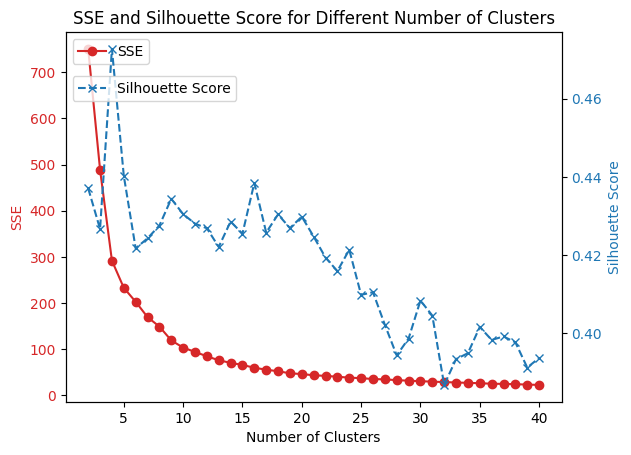

In [156]:
# Create a figure and a set of subplots (two y-axes)
fig, ax1 = plt.subplots()

cluster_range = range(2, 41)

# Plot SSE
color = 'tab:red'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('SSE', color=color)
ax1.plot(cluster_range, sse_scores, marker='o', label='SSE', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create the second y-axis to plot Silhouette Score
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(cluster_range, sil_scores, marker='x', linestyle='--', label='Silhouette Score', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show legend
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0.0, 0.9))

# Show plot
plt.title("SSE and Silhouette Score for Different Number of Clusters")
plt.show()

## **2.4 Model Selection**

In [157]:
# Set the number of clusters
n_clusters = 5

# Fit K-means clustering model
kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=2024)
cluster_labels = kmeans.fit_predict(X_scaled)

##Write code to add cluster labels to original dataset
records['Cluster'] = kmeans.labels_

In [158]:
# Evaluate the model using within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", '%.3f' % wcss)

##Write code to compute the Davies-Bouldin index
dbs = davies_bouldin_score(X_scaled, kmeans.labels_)
print("Davies Bouldin index:", '%.3f' % dbs)

##Write code to compute the Silhouette score for the clustering model
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)

print('Silhouette score:', '%.3f' % silhouette_avg)

Within-Cluster Sum of Squares (WCSS): 138.597
Davies Bouldin index: 0.734
Silhouette score: 0.529


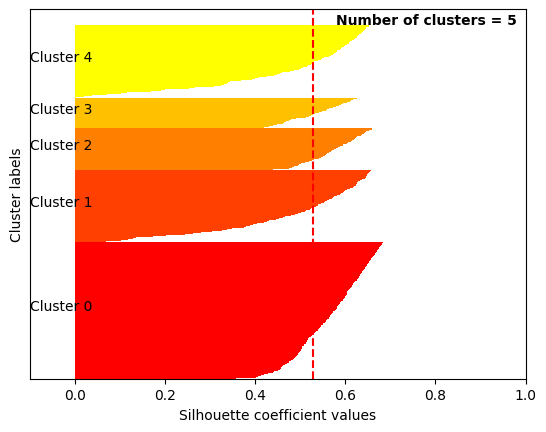

In [159]:
# Compute silhouette scores
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

# Define the colormap, options include: autumn, Spectral, viridis, plasma, cool, jet
cmap = cm.autumn

# Create a list of evenly spaced values in the range [0, 1]
values = np.linspace(0, 1, n_clusters)

# Plot silhouette diagram
fig, ax = plt.subplots()
y_lower, y_upper = 0, 0
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper += size_cluster_i
    color = cmap(values[i])
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1.0,
            edgecolor='none', color=color)
    ax.text(-0.1, (y_lower + y_upper) / 2, 'Cluster ' + str(i), color='black', fontsize=10)
    y_lower += size_cluster_i

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster labels")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

ax.text(silhouette_avg + 0.05, len(X_scaled) + 5, "Number of clusters = %d" % n_clusters, fontsize=10, fontweight='bold')

plt.show()

## **2.5 Post-analysis for Cluster Profiling**

Now that we have Clustered assigned to each data point, we can examine the cluster desriptive stats and visualisation

*Examine the Cluster size*

In [160]:
records

age     sex     bmi  dependants  smoker     region      charges  sex_N  \
0      19  female  27.900           0       1  southwest  16884.92400      0   
1      18    male  33.770           1       0  southeast   1725.55230      1   
2      28    male  33.000           3       0  southeast   4449.46200      1   
3      33    male  22.705           0       0  northwest  21984.47061      1   
4      32    male  28.880           0       0  northwest   3866.85520      1   
...   ...     ...     ...         ...     ...        ...          ...    ...   
1333   50    male  30.970           3       0  northwest  10600.54830      1   
1334   18  female  31.920           0       0  northeast   2205.98080      0   
1335   18  female  36.850           0       0  southeast   1629.83350      0   
1336   21  female  25.800           0       0  southwest   2007.94500      0   
1337   61  female  29.070           0       1  northwest  29141.36030      0   

      Cluster  
0           3  
1           0  
2           0  
3           0  
4           0  
...       ...  
1333        0  
1334        4  
1335        4  
1336        4  
1337        3  

[1338 rows x 9 columns]

In [161]:
cluster_count=records.Cluster.value_counts()
cluster_count

Cluster
0    517
4    275
1    272
2    159
3    115
Name: count, dtype: int64

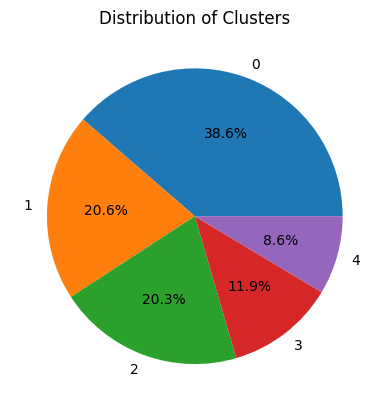

In [162]:
#Let's generate a pie chart with the distribution of churned cases, along with percentage labels.

# Sort the index to ensure the clusters are in order
sorted_cluster_count = cluster_count.sort_index()
colours = sns.color_palette("tab10", n_colors=len(cluster_count))

plt.pie(cluster_count, labels=sorted_cluster_count.index, autopct='%1.1f%%', colors=colours)
plt.title('Distribution of Clusters')
plt.show()

*Examine Cluster vs each of other variables*

In [163]:
from sklearn.metrics import mutual_info_score

In [164]:
mi_scores = {}

# Loop through each categorical feature and calculate MI score
for cat in cats:
    mi_scores[cat] = mutual_info_score(records[cat], records['Cluster'])

# Sort features by their MI scores
sorted_scores = sorted(mi_scores.items(), key=lambda x: x[1], reverse=True)

# Display the scores
for feature, score in sorted_scores:
    print(f"{feature}: {score:.3f}")


sex: 0.693
smoker: 0.507
dependants: 0.007
region: 0.004


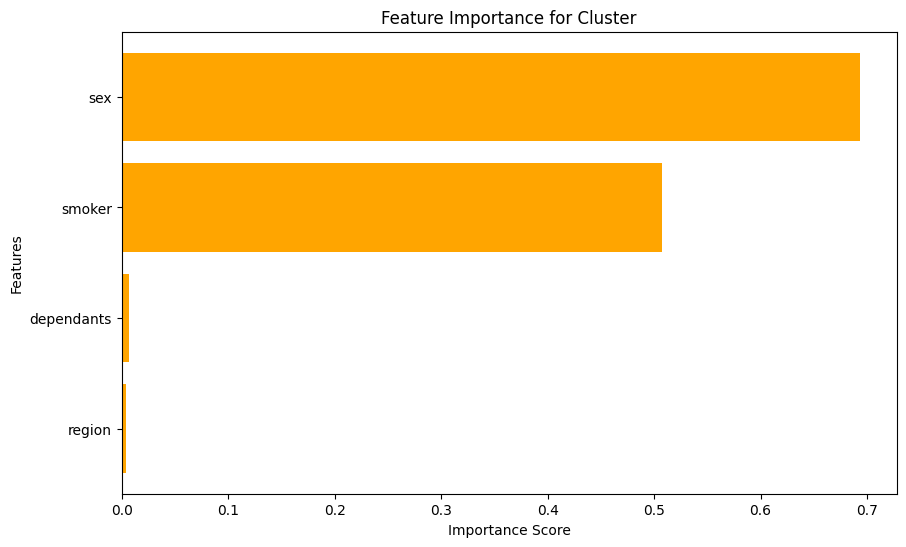

In [165]:
features, scores = zip(*sorted_scores)
plt.figure(figsize=(10, 6))
plt.barh(features, scores, color='orange')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Cluster')
plt.gca().invert_yaxis()
plt.show()

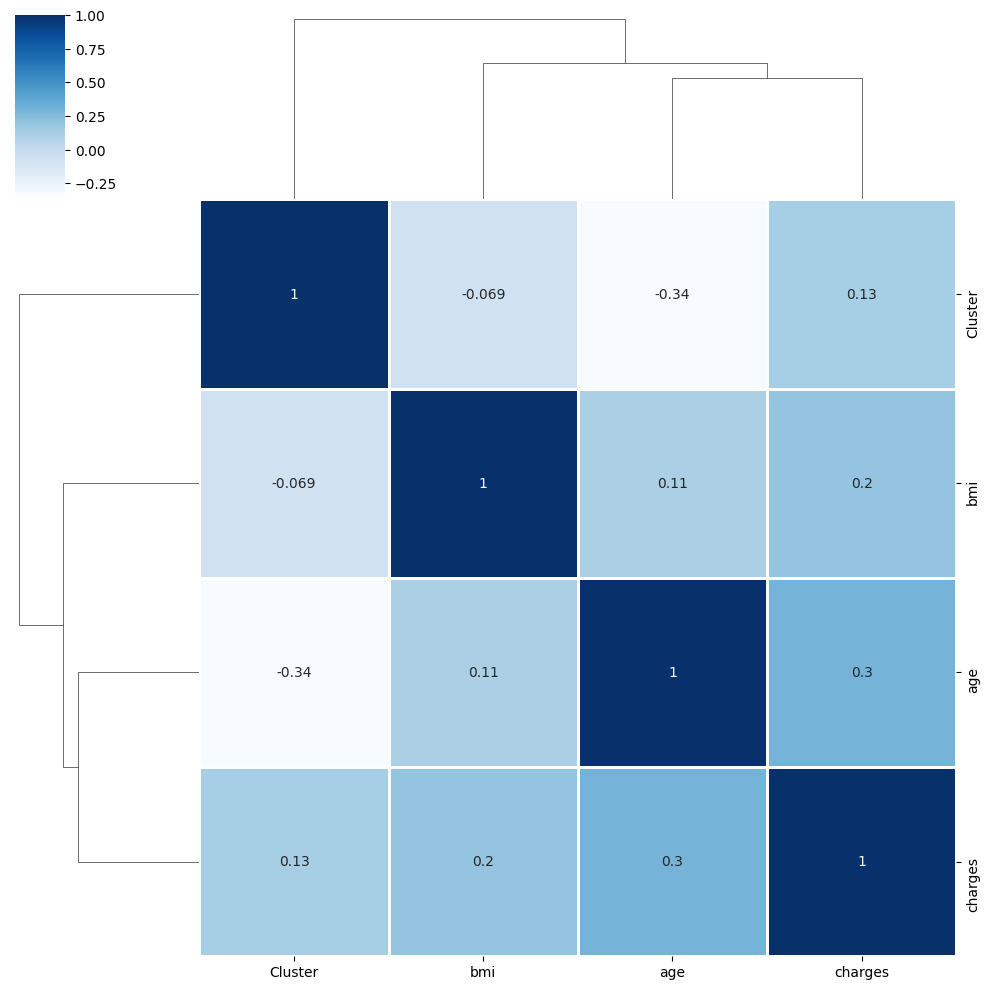

In [166]:
##Write code to create a clustermap for 'age','bmi','charges','Cluster'
sns.clustermap(data=records[['age','bmi','charges','Cluster']].corr(), cmap="Blues", linewidths=.9, annot=True)

Cluster  smoker
0        0         517
1        0         272
2        1         159
3        1         115
4        0         275
Name: count, dtype: int64




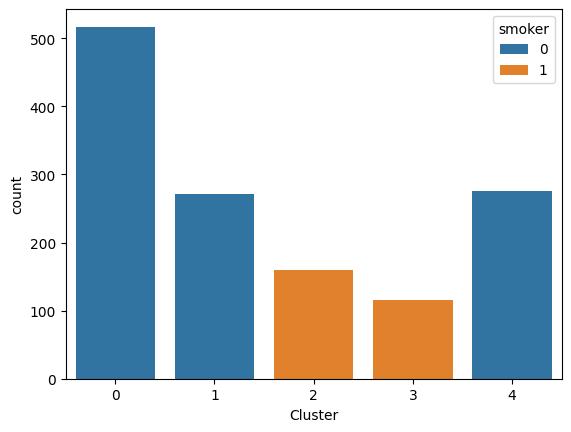

In [167]:
print(records.groupby('Cluster')['smoker'].value_counts())
print('\n')
sns.countplot(hue=records['smoker'], x=records['Cluster'], palette='tab10')
plt.show()

Cluster  smoker
0        0         517
1        0         272
2        1         159
3        1         115
4        0         275
Name: count, dtype: int64




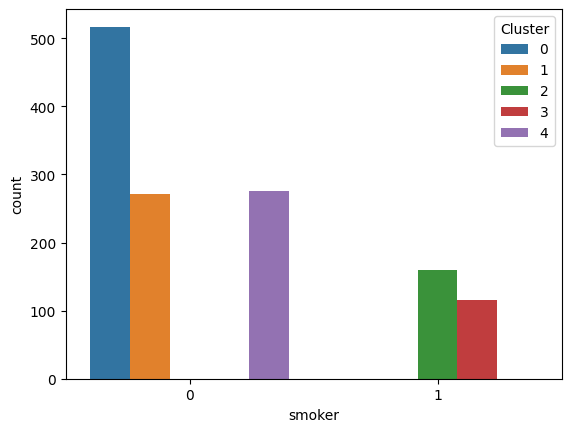

In [168]:
print(records.groupby('Cluster')['smoker'].value_counts())
print('\n')
sns.countplot(hue=records['Cluster'], x=records['smoker'], palette='tab10')
plt.show()

Cluster  sex_N
0        1        517
1        0        272
2        1        159
3        0        115
4        0        275
Name: count, dtype: int64




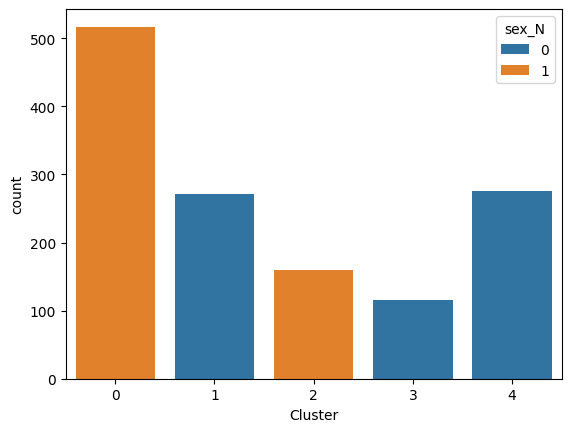

In [169]:
print(records.groupby('Cluster')['sex_N'].value_counts())
print('\n')
sns.countplot(hue=records['sex_N'], x=records['Cluster'], palette='tab10')
plt.show()

Cluster  sex_N
0        1        517
1        0        272
2        1        159
3        0        115
4        0        275
Name: count, dtype: int64




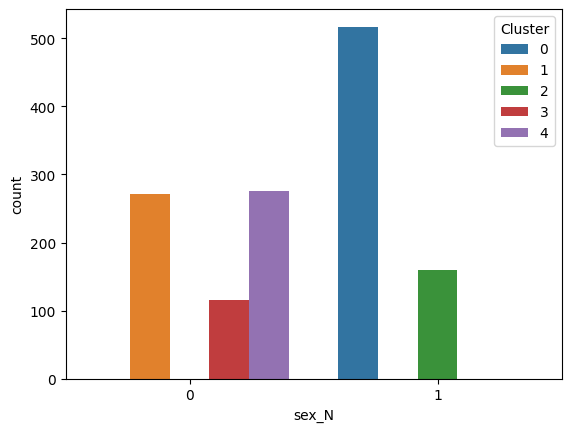

In [170]:
print(records.groupby('Cluster')['sex_N'].value_counts())
print('\n')
sns.countplot(hue=records['Cluster'], x=records['sex_N'],palette='tab10')
plt.show()

age :

         count       mean        std   min    25%   50%   75%   max
Cluster                                                            
0        517.0  39.061896  14.150768  18.0  26.00  39.0  51.0  64.0
1        272.0  52.011029   6.698286  40.0  46.75  52.0  58.0  64.0
2        159.0  38.446541  13.751247  18.0  27.00  38.0  49.5  64.0
3        115.0  38.608696  14.217419  18.0  26.50  39.0  48.5  64.0
4        275.0  27.505455   6.922075  18.0  21.00  27.0  33.0  40.0




<ipython-input-171-e5d9f5e24d87>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=i, data=records, showmeans=True, ax=axes[1], palette='tab10')


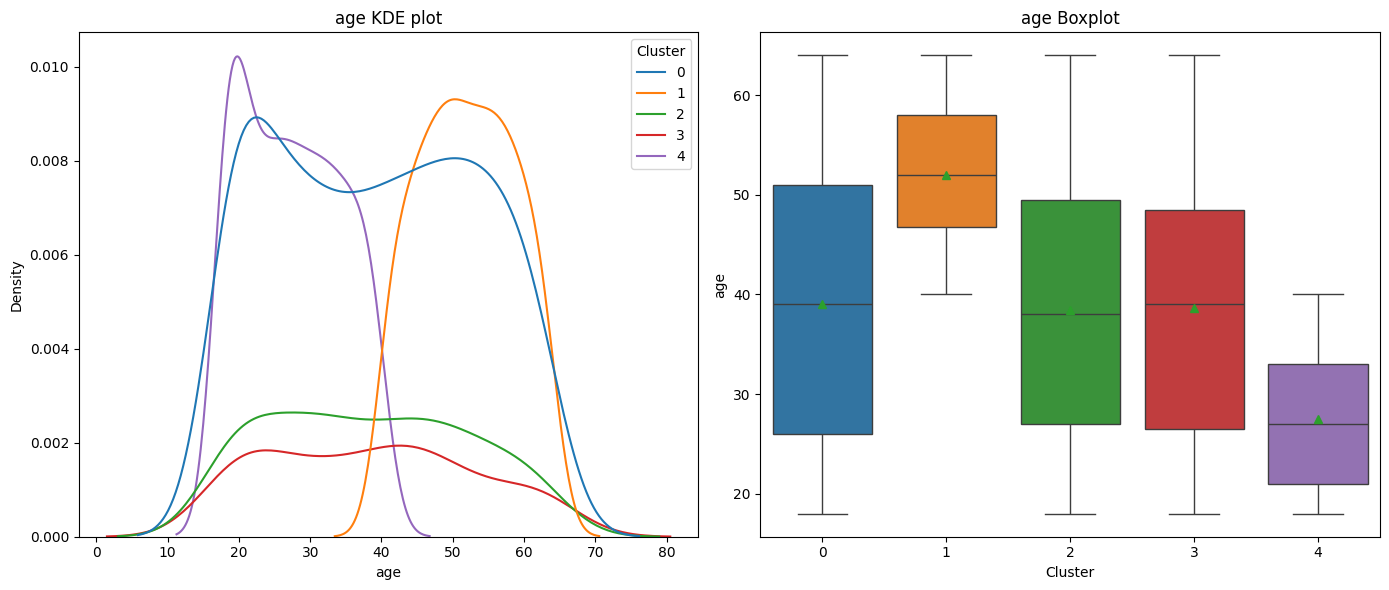

bmi :

         count       mean       std     min      25%     50%      75%    max
Cluster                                                                     
0        517.0  30.770580  6.192641  15.960  26.2200  30.495  34.4300  53.13
1        272.0  31.292923  5.775961  18.050  27.1925  31.295  35.3850  48.07
2        159.0  31.504182  5.952028  17.290  27.3600  31.130  35.5650  52.58
3        115.0  29.608261  6.663802  17.195  24.6500  28.380  34.3525  47.60
4        275.0  29.794345  5.940586  16.815  25.7725  29.600  33.6650  44.22




<ipython-input-171-e5d9f5e24d87>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=i, data=records, showmeans=True, ax=axes[1], palette='tab10')


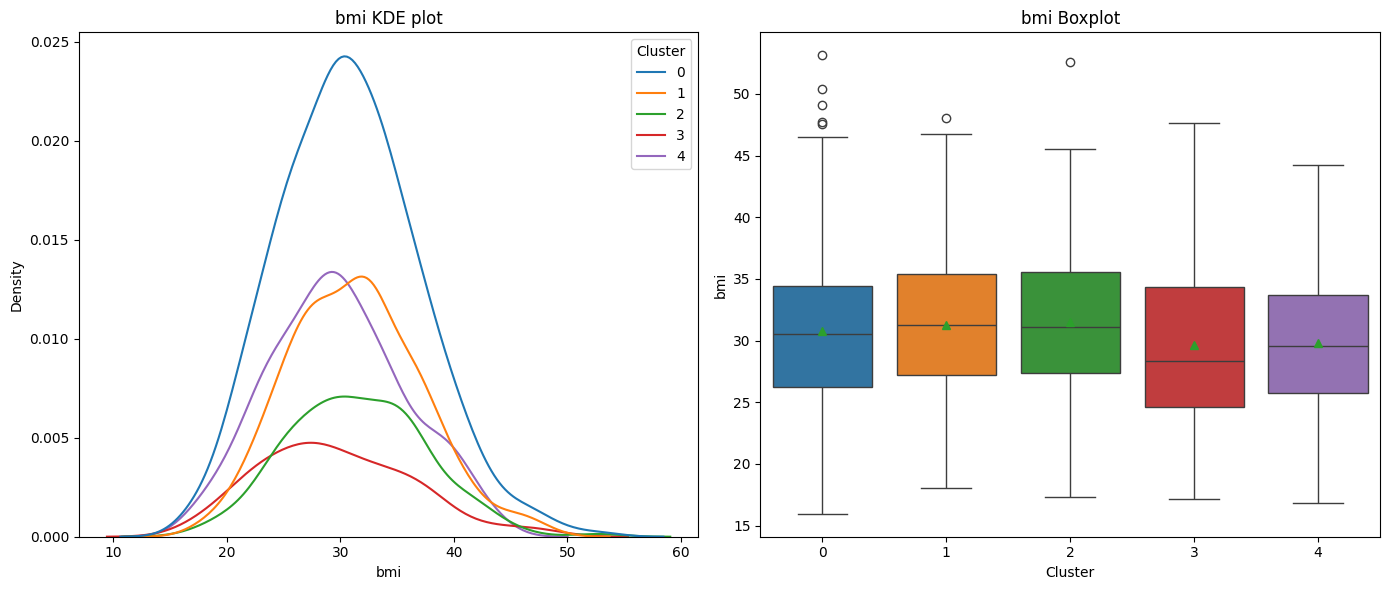

charges :

         count          mean           std         min           25%  \
Cluster                                                                
0        517.0   8087.204731   5908.108989   1121.8739   3659.346000   
1        272.0  12216.308991   5374.192322   5920.1041   8931.796637   
2        159.0  33042.005975  11202.670862  12829.4551  21241.526875   
3        115.0  30678.996276  11907.536381  13844.5060  19696.432100   
4        275.0   5345.965736   4590.766460   1607.5101   2724.693800   

                 50%           75%          max  
Cluster                                          
0         6985.50695  10959.330000  32108.66282  
1        11157.17400  13218.835137  36910.60803  
2        36085.21900  41797.589050  62592.87309  
3        28950.46920  40918.314500  63770.42801  
4         4296.27120   5841.719000  26018.95052  




<ipython-input-171-e5d9f5e24d87>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=i, data=records, showmeans=True, ax=axes[1], palette='tab10')


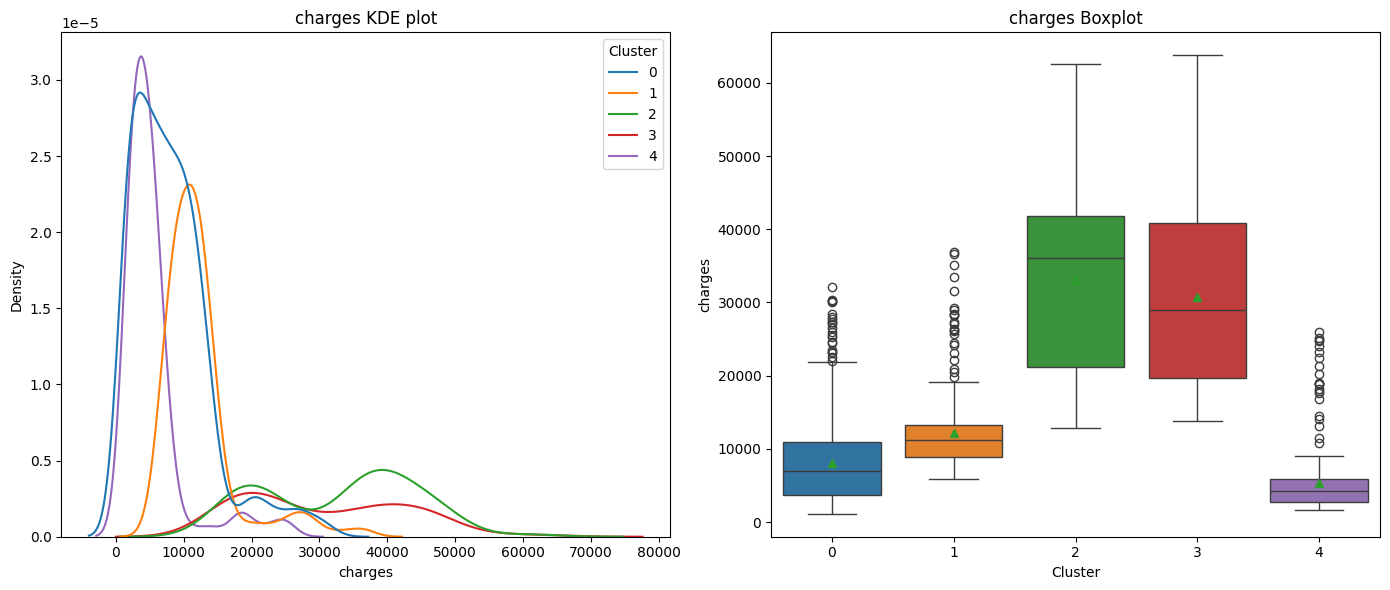

In [171]:
nums=['age','bmi', 'charges']
for i in nums:
  print(i, ':\n')
  print(records.groupby('Cluster')[i].describe())
  print('\n')

  # Create subplots
  fig, axes = plt.subplots(1, 2, figsize=(14, 6))

  # Plot KDE on the first subplot
  sns.kdeplot(data=records, x=i, hue='Cluster', ax=axes[0], palette='tab10')
  axes[0].set_title(f'{i} KDE plot')

  # Plot Boxplot on the second subplot
  sns.boxplot(x='Cluster', y=i, data=records, showmeans=True, ax=axes[1], palette='tab10')
  axes[1].set_title(f'{i} Boxplot')

  plt.tight_layout()  # Adjust layout so plots do not overlap
  plt.show()

<Axes: xlabel='Cluster', ylabel='charges'>

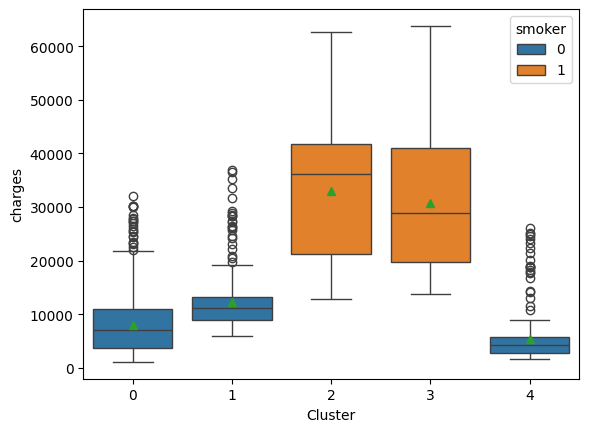

In [172]:
  sns.boxplot(x='Cluster', y='charges', data=records, showmeans=True,  hue='smoker', palette='tab10')

<Axes: xlabel='Cluster', ylabel='charges'>

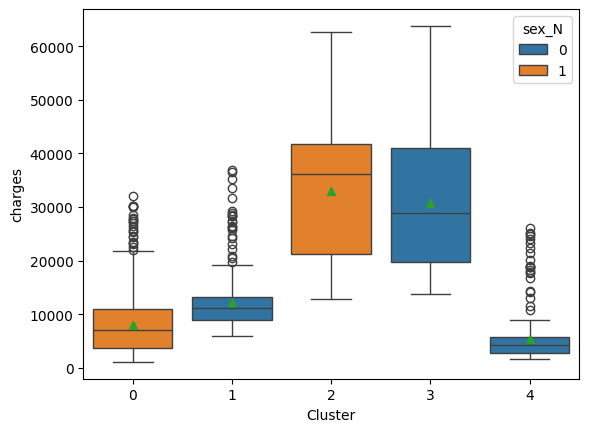

In [173]:
##write code to generate boxplots for Clusters by gender
sns.boxplot(x='Cluster', y='charges', data=records, showmeans=True,  hue='sex_N')

In [174]:
X_scaled

age       bmi   charges  smoker  sex_N
0     0.021739  0.321227  0.251611       1      0
1     0.000000  0.479150  0.009636       0      1
2     0.217391  0.458434  0.053115       0      1
3     0.326087  0.181464  0.333010       0      1
4     0.304348  0.347592  0.043816       0      1
...        ...       ...       ...     ...    ...
1333  0.695652  0.403820  0.151299       0      1
1334  0.000000  0.429379  0.017305       0      0
1335  0.000000  0.562012  0.008108       0      0
1336  0.065217  0.264730  0.014144       0      0
1337  0.934783  0.352704  0.447249       1      0

[1338 rows x 5 columns]

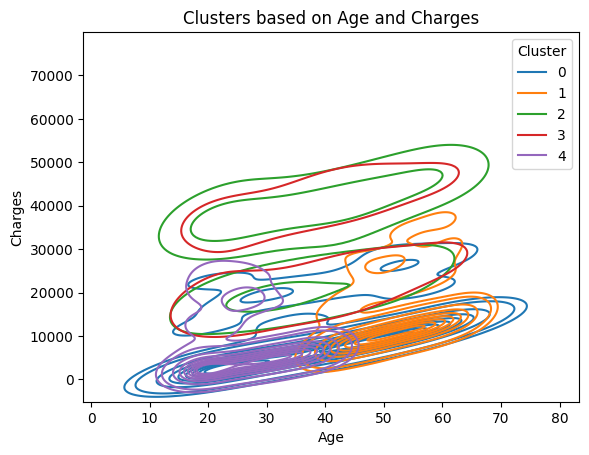

In [175]:
# Create the KDE plot for the records
sns.kdeplot(data=records, x='age', y='charges', hue='Cluster', palette='tab10', legend='full')

# Setting the title and labels
plt.title('Clusters based on Age and Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
#plt.legend(loc='upper right')

plt.show()

### **Labelling clusters**

In [176]:
records.groupby('Cluster').charges.describe()

count          mean           std         min           25%  \
Cluster                                                                
0        517.0   8087.204731   5908.108989   1121.8739   3659.346000   
1        272.0  12216.308991   5374.192322   5920.1041   8931.796637   
2        159.0  33042.005975  11202.670862  12829.4551  21241.526875   
3        115.0  30678.996276  11907.536381  13844.5060  19696.432100   
4        275.0   5345.965736   4590.766460   1607.5101   2724.693800   

                 50%           75%          max  
Cluster                                          
0         6985.50695  10959.330000  32108.66282  
1        11157.17400  13218.835137  36910.60803  
2        36085.21900  41797.589050  62592.87309  
3        28950.46920  40918.314500  63770.42801  
4         4296.27120   5841.719000  26018.95052

In [177]:
# Calculate mean for each cluster
cluster_summary = records.groupby('Cluster')[['age', 'bmi', 'charges', 'smoker', 'sex_N']].mean()


# Print out the summary statistics
print(cluster_summary)

# Manually assign labels based on inspection
cluster_labels = {
    0: "None-smoker, Yound adults, Low cost average, Female",
    1: "None-smoker, Low cost average, Male",
    2: "Smoker, Mid-High cost average, Male",
    3: "None-smoker, Mid-age, Low-Mid cost average, Female",
    4: "Smoker, Mid-High cost average, Female"
}

# Add a new column to the DataFrame with label names
records['Cluster_Label'] = records['Cluster'].map(cluster_labels)

               age        bmi       charges  smoker  sex_N
Cluster                                                   
0        39.061896  30.770580   8087.204731     0.0    1.0
1        52.011029  31.292923  12216.308991     0.0    0.0
2        38.446541  31.504182  33042.005975     1.0    1.0
3        38.608696  29.608261  30678.996276     1.0    0.0
4        27.505455  29.794345   5345.965736     0.0    0.0


In [178]:
records.sample(20)

age     sex     bmi  dependants  smoker     region      charges  sex_N  \
613    34  female  19.000           3       0  northeast   6753.03800      0   
508    24  female  25.270           0       0  northeast   3044.21330      0   
688    47  female  24.100           1       0  southwest  26236.57997      0   
286    46  female  48.070           2       0  northeast   9432.92530      0   
1224   41    male  23.940           1       0  northeast   6858.47960      1   
1160   43  female  34.580           1       0  northwest   7727.25320      0   
283    55  female  32.395           1       0  northeast  11879.10405      0   
9      60  female  25.840           0       0  northwest  28923.13692      0   
655    52  female  25.300           2       1  southeast  24667.41900      0   
351    50  female  25.600           0       0  southwest   8932.08400      0   
1293   46    male  25.745           3       0  northwest   9301.89355      1   
56     58  female  31.825           2       0  northeast  13607.36875      0   
1180   42  female  41.325           1       0  northeast   7650.77375      0   
517    45    male  30.495           2       0  northwest   8413.46305      1   
1262   41  female  28.050           1       0  southeast   6770.19250      0   
1306   29  female  21.850           0       1  northeast  16115.30450      0   
778    35    male  34.320           3       0  southeast   5934.37980      1   
217    27    male  23.100           0       0  southeast   2483.73600      1   
580    59    male  25.460           1       0  northeast  12913.99240      1   
1131   27    male  45.900           2       0  southwest   3693.42800      1   

      Cluster                                      Cluster_Label  
613         4              Smoker, Mid-High cost average, Female  
508         4              Smoker, Mid-High cost average, Female  
688         1                None-smoker, Low cost average, Male  
286         1                None-smoker, Low cost average, Male  
1224        0  None-smoker, Yound adults, Low cost average, F...  
1160        1                None-smoker, Low cost average, Male  
283         1                None-smoker, Low cost average, Male  
9           1                None-smoker, Low cost average, Male  
655         3  None-smoker, Mid-age, Low-Mid cost average, Fe...  
351         1                None-smoker, Low cost average, Male  
1293        0  None-smoker, Yound adults, Low cost average, F...  
56          1                None-smoker, Low cost average, Male  
1180        1                None-smoker, Low cost average, Male  
517         0  None-smoker, Yound adults, Low cost average, F...  
1262        1                None-smoker, Low cost average, Male  
1306        3  None-smoker, Mid-age, Low-Mid cost average, Fe...  
778         0  None-smoker, Yound adults, Low cost average, F...  
217         0  None-smoker, Yound adults, Low cost average, F...  
580         0  None-smoker, Yound adults, Low cost average, F...  
1131        0  None-smoker, Yound adults, Low cost average, F...

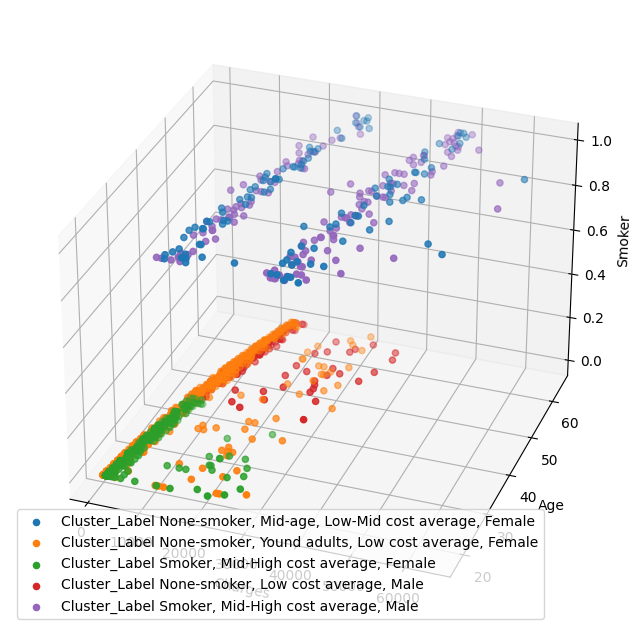

In [179]:
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure
fig = plt.figure(figsize=(12, 8))

# Add 3D subplot
# The '111' means 1x1 grid, first subplot, similar to MATLAB-style
ax = fig.add_subplot(111, projection='3d')

# Unique cluster labels
unique_clusters = records['Cluster_Label'].unique()

# Use Seaborn's tab10 palette
colors = sns.color_palette('tab10', len(unique_clusters))

# Adjusting the viewing angle for better visibility
ax.view_init(elev=30, azim=-70)  # Modify these values as needed

# Scatter plot for each cluster
for i, cluster in enumerate(unique_clusters):
    cluster_data = records[records['Cluster_Label'] == cluster]
    ax.scatter(cluster_data['charges'], cluster_data['age'], cluster_data['smoker'],
               label=f'Cluster_Label {cluster}', c=[colors[i]])

# Legend and labels
ax.set_xlabel('Charges')
ax.set_ylabel('Age')
ax.set_zlabel('Smoker')
ax.legend()

# Show the plot
plt.show()

>Scatter plot for each cluster, without marking smokers
for i, cluster in enumerate(unique_clusters):
    cluster_data = records[records['Cluster_Label'] == cluster]
    ax.scatter(cluster_data['charges'], cluster_data['age'], cluster_data['sex_N'],
               label=f'Cluster_Label {cluster}', c=[colors[i]])

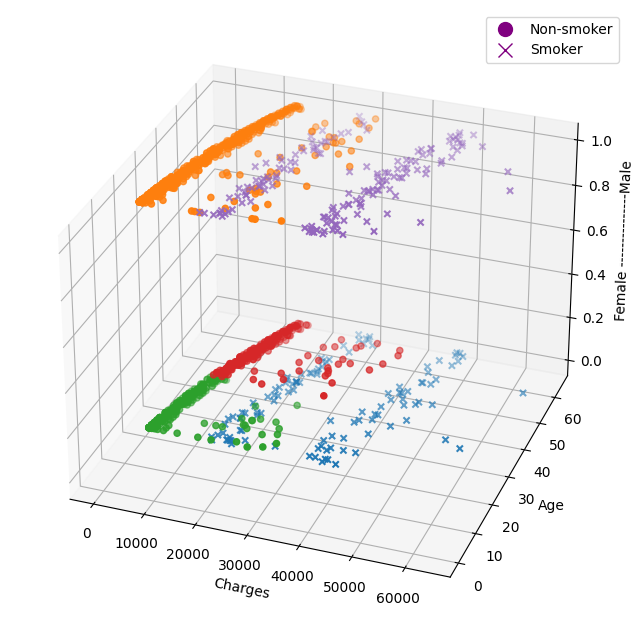

In [180]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D  # Required for creating custom legends

# Create a new figure
fig = plt.figure(figsize=(12, 8))

# Add 3D subplot
# The '111' means 1x1 grid, first subplot, similar to MATLAB-style
ax = fig.add_subplot(111, projection='3d')

# Unique cluster labels
unique_clusters = records['Cluster_Label'].unique()

# Use Seaborn's tab10 palette
colors = sns.color_palette('tab10', len(unique_clusters))

# Adjusting the viewing angle for better visibility
ax.view_init(elev=30, azim=-70)  # Modify these values as needed

# Define markers for smokers and non-smokers
markers = {0: 'o',  # Non-smoker
           1: 'x'}  # Smoker

# Scatter plot for each cluster and smoker status
for i, cluster in enumerate(unique_clusters):
    cluster_data = records[records['Cluster_Label'] == cluster]

    for smoker_status, marker in markers.items():
        data = cluster_data[cluster_data['smoker'] == smoker_status]
        ax.scatter(data['charges'], data['age'], data['sex_N'],
                   c=[colors[i]], marker=marker, label=f'Cluster_Label {cluster}')

# Create custom legend
legend_elements = [Line2D([0], [0], color='purple', marker='o', linestyle='', markersize=10, label='Non-smoker'),
                   Line2D([0], [0], color='purple', marker='x', linestyle='', markersize=10, label='Smoker')]
ax.legend(handles=legend_elements)

# Legend and labels
ax.set_xlabel('Charges')
ax.set_ylabel('Age')
ax.set_zlabel('Female ---------------Male')
#ax.legend()

# Show the plot
plt.show()

In [181]:
#You can get each cluster out and examine them separately
cluster_0 = records[records['Cluster'] == 0]

##Write code to get other clusters
cluster_1 = records[records['Cluster'] == 1]
cluster_2 = records[records['Cluster'] == 2]
cluster_3 = records[records['Cluster'] == 3]
cluster_4 = records[records['Cluster'] == 4]

In [182]:
cluster_1.describe()

##Write code to describe other clusters

age         bmi  dependants  smoker       charges  sex_N  \
count  272.000000  272.000000  272.000000   272.0    272.000000  272.0   
mean    52.011029   31.292923    1.139706     0.0  12216.308991    0.0   
std      6.698286    5.775961    1.188337     0.0   5374.192322    0.0   
min     40.000000   18.050000    0.000000     0.0   5920.104100    0.0   
25%     46.750000   27.192500    0.000000     0.0   8931.796637    0.0   
50%     52.000000   31.295000    1.000000     0.0  11157.174000    0.0   
75%     58.000000   35.385000    2.000000     0.0  13218.835137    0.0   
max     64.000000   48.070000    5.000000     0.0  36910.608030    0.0   

       Cluster  
count    272.0  
mean       1.0  
std        0.0  
min        1.0  
25%        1.0  
50%        1.0  
75%        1.0  
max        1.0

Option: Try it again, drop sex; or use another combination of features.
All the best



---



---



## **2.6 OPTIONAL - DBSCAN**

In [183]:
from sklearn.cluster import DBSCAN

In [184]:
# Apply DBSCAN
dbscaner = DBSCAN(eps=0.5, min_samples=80)
records['Cluster_DBSCAN'] = dbscaner.fit_predict(X_scaled)

In [185]:
dbcluster_count=records.Cluster_DBSCAN.value_counts()
dbcluster_count

Cluster_DBSCAN
 1    547
 0    517
 2    159
 3    112
-1      3
Name: count, dtype: int64

In [186]:
# Compute the noise ratio
noise_ratio = (dbscaner.labels_ == -1).sum() / len(dbscaner.labels_)
print(f"Noise Ratio: {noise_ratio}")


Noise Ratio: 0.002242152466367713


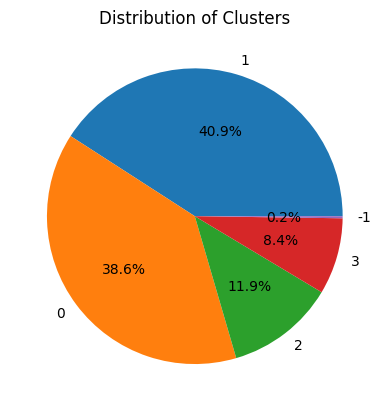

In [187]:
#Let's generate a pie chart with the distribution of churned cases, along with percentage labels.

# Sort the index to ensure the clusters are in order
dbsorted_cluster_count = dbcluster_count.sort_index()
colours = sns.color_palette("tab10", n_colors=len(dbsorted_cluster_count))

plt.pie(dbcluster_count, labels=dbcluster_count.index, autopct='%1.1f%%', colors=colours)
plt.title('Distribution of Clusters')
plt.show()

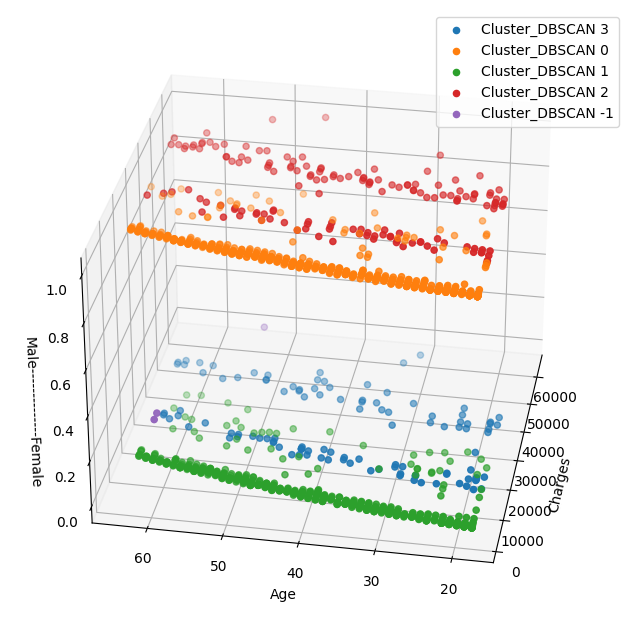

In [188]:
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure
fig = plt.figure(figsize=(12, 8))

# Add 3D subplot
# The '111' means 1x1 grid, first subplot, similar to MATLAB-style
ax = fig.add_subplot(111, projection='3d')

# Unique cluster labels
unique_clusters = records['Cluster_DBSCAN'].unique()

# Use Seaborn's tab10 palette
colors = sns.color_palette('tab10', len(unique_clusters))

# Adjusting the viewing angle for better visibility
ax.view_init(elev=30, azim=-170)  # Modify these values as needed

# Scatter plot for each cluster
for i, cluster in enumerate(unique_clusters):
    cluster_data = records[records['Cluster_DBSCAN'] == cluster]
    ax.scatter(cluster_data['charges'], cluster_data['age'], cluster_data['sex_N'],
               label=f'Cluster_DBSCAN {cluster}', c=[colors[i]])

# Legend and labels
ax.set_xlabel('Charges')
ax.set_ylabel('Age')
ax.set_zlabel('Male--------------Female')
ax.legend()

# Show the plot
plt.show()

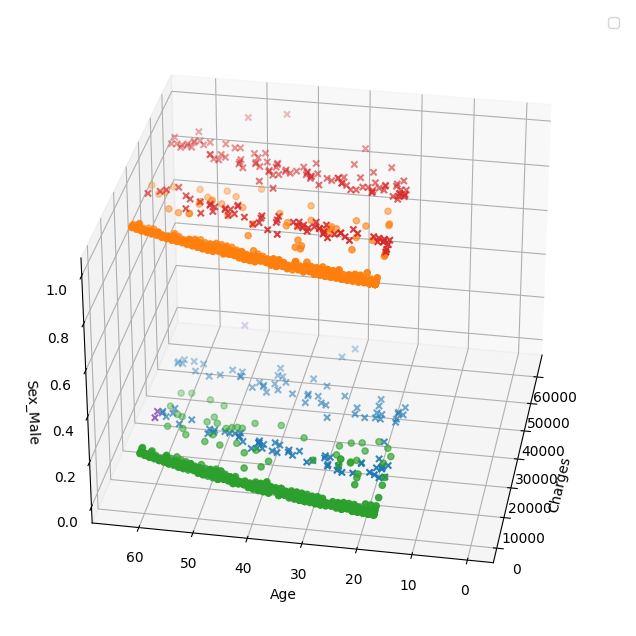

In [189]:
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure
fig = plt.figure(figsize=(12, 8))

# Add 3D subplot
# The '111' means 1x1 grid, first subplot, similar to MATLAB-style
ax = fig.add_subplot(111, projection='3d')

# Unique cluster labels
unique_clusters = records['Cluster_DBSCAN'].unique()

# Use Seaborn's tab10 palette
colors = sns.color_palette('tab10', len(unique_clusters))

# Adjusting the viewing angle for better visibility
ax.view_init(elev=30, azim=-170)  # Modify these values as needed

# Define markers for smokers and non-smokers
markers = {0: 'o',  # Non-smoker
           1: 'x'}  # Smoker

# Scatter plot for each cluster and smoker status
for i, cluster in enumerate(unique_clusters):
    cluster_data = records[records['Cluster_DBSCAN'] == cluster]

    for smoker_status, marker in markers.items():
        data = cluster_data[cluster_data['smoker'] == smoker_status]
        ax.scatter(data['charges'], data['age'], data['sex_N'],
                   c=[colors[i]], marker=marker)
# Legend and labels
ax.set_xlabel('Charges')
ax.set_ylabel('Age')
ax.set_zlabel('Sex_Male')
ax.legend('')

# Show the plot
plt.show()

## **2.7 OPTIONAL - HDBSCAN**

https://towardsdatascience.com/understanding-hdbscan-and-density-based-clustering-121dbee1320e

In [190]:
pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 48.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039288 sha256=fb43c92eb4a45a26c6d4607349afcd623f5f7e172d7342c8150bcb08f431db42
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


In [191]:
import hdbscan

# Compute the clustering using HDBSCAN
hdbscaner = hdbscan.HDBSCAN(min_cluster_size=80)
hdbscaner.fit(X_scaled)

records['Cluster_HDB'] = hdbscaner.labels_


In [192]:
# Compute the noise ratio
noise_ratio = (hdbscaner.labels_ == -1).sum() / len(hdbscaner.labels_)
print(f"Noise Ratio: {noise_ratio}")

Noise Ratio: 0.0


In [193]:
hdbcluster_count=records.Cluster_HDB.value_counts()
hdbcluster_count

Cluster_HDB
3    547
2    517
1    159
0    115
Name: count, dtype: int64

<Axes: ylabel='$\\lambda$ value'>

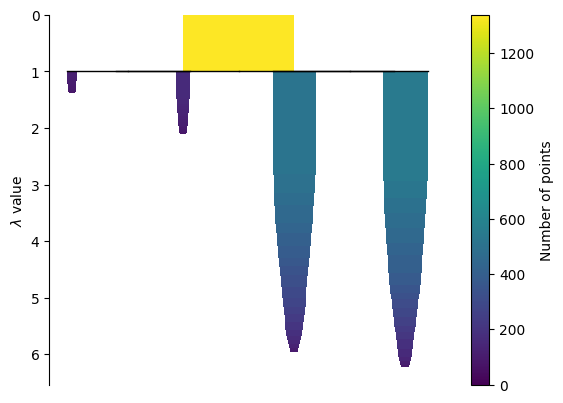

In [194]:
hdbscaner.condensed_tree_.plot()

<Axes: ylabel='$\\lambda$ value'>

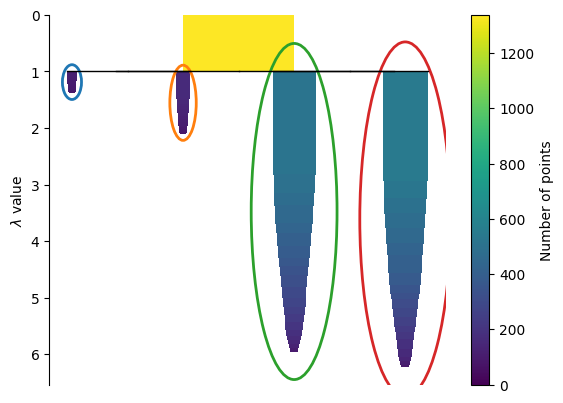

In [195]:
hdbscaner.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

<Axes: ylabel='$\\lambda$ value'>

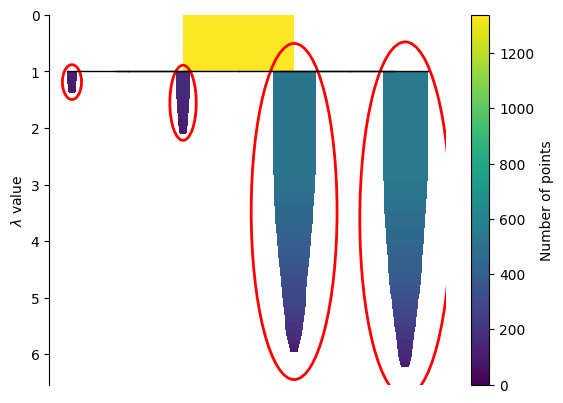

In [196]:
hdbscaner.condensed_tree_.plot(select_clusters=True)

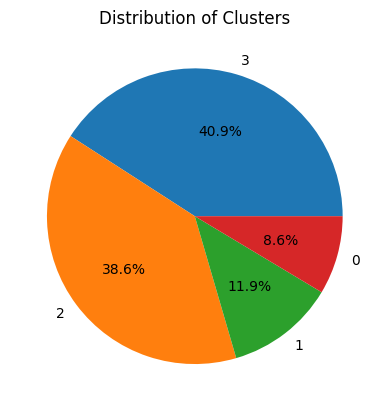

In [197]:
#Let's generate a pie chart with the distribution of churned cases, along with percentage labels.

# Sort the index to ensure the clusters are in order
hdbsorted_cluster_count = hdbcluster_count.sort_index()
colours = sns.color_palette("tab10", n_colors=len(hdbsorted_cluster_count))

plt.pie(hdbcluster_count, labels=hdbcluster_count.index, autopct='%1.1f%%', colors=colours)
plt.title('Distribution of Clusters')
plt.show()

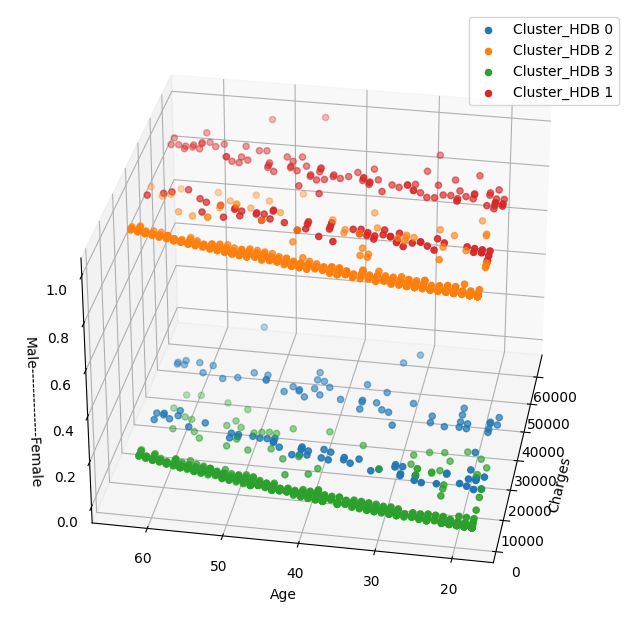

In [198]:
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure
fig = plt.figure(figsize=(12, 8))

# Add 3D subplot
# The '111' means 1x1 grid, first subplot, similar to MATLAB-style
ax = fig.add_subplot(111, projection='3d')

# Unique cluster labels
unique_clusters = records['Cluster_HDB'].unique()

# Use Seaborn's tab10 palette
colors = sns.color_palette('tab10', len(unique_clusters))

# Adjusting the viewing angle for better visibility
ax.view_init(elev=30, azim=-170)  # Modify these values as needed

# Scatter plot for each cluster
for i, cluster in enumerate(unique_clusters):
    cluster_data = records[records['Cluster_HDB'] == cluster]
    ax.scatter(cluster_data['charges'], cluster_data['age'], cluster_data['sex_N'],
               label=f'Cluster_HDB {cluster}', c=[colors[i]])

# Legend and labels
ax.set_xlabel('Charges')
ax.set_ylabel('Age')
ax.set_zlabel('Male--------------Female')
ax.legend()

# Show the plot
plt.show()

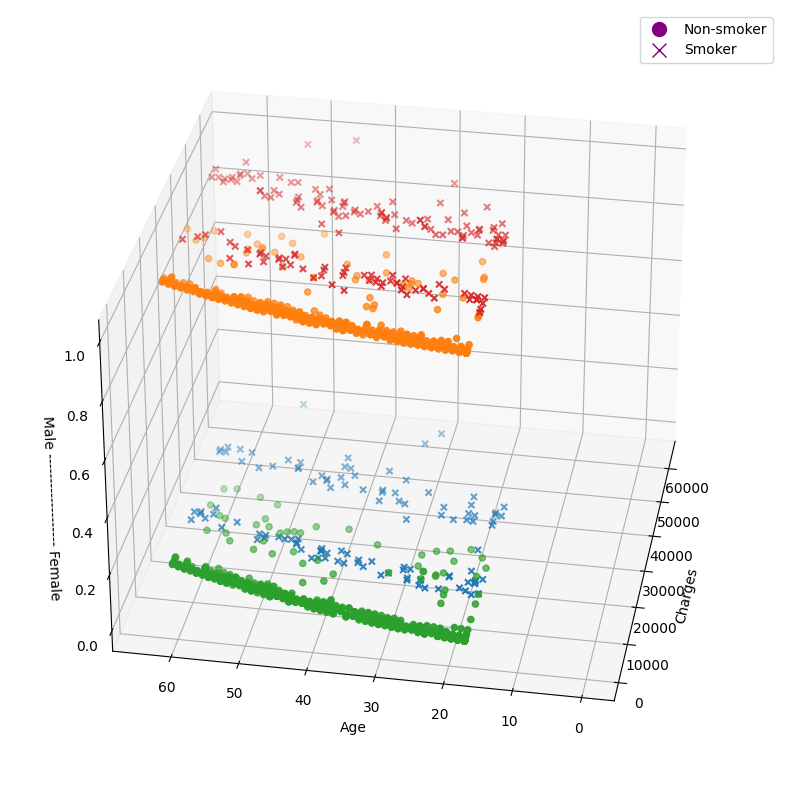

In [199]:
from matplotlib.lines import Line2D  # Required for creating custom legends

# Create a new figure
fig = plt.figure(figsize=(12, 8))

# Add 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Unique cluster labels
unique_clusters = records['Cluster_HDB'].unique()

# Use Seaborn's tab10 palette
colors = sns.color_palette('tab10', len(unique_clusters))

# Adjusting the viewing angle for better visibility
ax.view_init(elev=30, azim=-170)  # Modify these values as needed

# Define markers for smokers and non-smokers
markers = {0: 'o',  # Non-smoker
           1: 'x'}  # Smoker

# Scatter plot for each cluster and smoker status
for i, cluster in enumerate(unique_clusters):
    cluster_data = records[records['Cluster_HDB'] == cluster]

    for smoker_status, marker in markers.items():
        data = cluster_data[cluster_data['smoker'] == smoker_status]
        ax.scatter(data['charges'], data['age'], data['sex_N'],
                   c=[colors[i]], marker=marker, label=f'Cluster_Label {cluster}')

# Create custom legend
legend_elements = [Line2D([0], [0], color='purple', marker='o', linestyle='', markersize=10, label='Non-smoker'),
                   Line2D([0], [0], color='purple', marker='x', linestyle='', markersize=10, label='Smoker')]
ax.legend(handles=legend_elements)

# Labels for axes
ax.set_xlabel('Charges')
ax.set_ylabel('Age')
ax.set_zlabel('Male ------------------- Female')

# Show the plot
plt.tight_layout()
plt.show()





# **OPTIONAL TASK:**

Try to perform clustering analysis with another dataset, for example:
https://www.kaggle.com/datasets/datascientistanna/customers-dataset?resource=download